Step 1.1: Setup and Load Data

In [2]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Set some display options for better viewing
pd.set_option('display.float_format', lambda x: '%.2f' % x)
pd.set_option('display.width', 1000)

# Load your dataset into a pandas DataFrame
# Replace 'pmfby_dataset.csv' with the actual name of your file

df = pd.read_csv('pmfby-district-level.csv')

# Display the first 5 rows to confirm it loaded correctly
print("First 5 rows of the dataset:")
print(df.head())

# Display the last 5 rows
print("\nLast 5 rows of the dataset:")
print(df.tail())

First 5 rows of the dataset:
   id  year  season scheme      state_name  state_code  district_name  district_code  farmer_count    loanee  ...  transgender   sc   st   obc   gen  marginal  small  other  iu_count  gross_premium
0   0  2018  Kharif  PMFBY  Andhra Pradesh          28      Anantapur         502.00      11455.00  11494.00  ...         0.00 6.66 0.44 60.19 32.71      6.32  84.97   8.71     85.00        1024.79
1   1  2018  Kharif  PMFBY  Andhra Pradesh          28       Chittoor         503.00      22511.00  23368.00  ...         0.06 6.41 0.81 39.90 52.88     16.82  75.32   7.86    614.00         894.25
2   2  2018  Kharif  PMFBY  Andhra Pradesh          28  East Godavari         505.00     152813.00 162278.00  ...         0.06 4.81 1.34 37.67 56.18     12.82  81.93   5.25   1198.00        7451.91
3   3  2018  Kharif  PMFBY  Andhra Pradesh          28         Guntur         506.00      18045.00  18446.00  ...         0.08 5.92 0.68 47.91 45.49     23.66  69.20   7.14    402

Step 1.2: High-Level Inspection


In [3]:
# Get a concise summary of the dataframe
# This shows column names, non-null counts, and data types (Dtype)
print("\nDataset Information (df.info()):")
df.info()

# Get a statistical summary of the numerical columns
# This is great for spotting anomalies or outliers early on
print("\nStatistical Summary (df.describe()):")
print(df.describe())

print("\nMissing Values (column-wise):")
print(df.isnull().sum())

# 5. Check unique values of important categorical columns
print("\nUnique Seasons:", df['season'].unique())
print("Unique Schemes:", df['scheme'].unique())
print("Unique Years:", df['year'].unique())
print("Unique States:", df['state_name'].nunique(), "→", df['state_name'].unique()[:10])  # top 10
print("Unique Districts:", df['district_name'].nunique())


Dataset Information (df.info()):
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6161 entries, 0 to 6160
Data columns (total 28 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             6161 non-null   int64  
 1   year           6161 non-null   int64  
 2   season         6161 non-null   object 
 3   scheme         6161 non-null   object 
 4   state_name     6161 non-null   object 
 5   state_code     6161 non-null   int64  
 6   district_name  6161 non-null   object 
 7   district_code  5422 non-null   float64
 8   farmer_count   6161 non-null   float64
 9   loanee         6160 non-null   float64
 10  non_loanee     6161 non-null   float64
 11  area_insured   6161 non-null   float64
 12  sum_insured    6161 non-null   float64
 13  farmer_share   6161 non-null   float64
 14  goi_share      6161 non-null   float64
 15  state_share    6161 non-null   float64
 16  male           6091 non-null   float64
 17  female         609

### Descriptive Statistics

In [9]:
import pandas as pd
import numpy as np

# --- 0. SETUP: LOAD THE CLEANED DATASET ---
# Replace with the actual name of your cleaned file.
file_path = 'cleaned_crop_insurance1.csv'

df_cleaned = pd.read_csv(file_path)
print("--- Successfully loaded the cleaned dataset. Starting analysis... ---")



print("\n" + "="*60)
print("          PART 1: FULL DESCRIPTIVE STATISTICS")
print("="*60 + "\n")

# --- 1.1: Standard Descriptive Statistics ---
print("📊 Standard Descriptive Statistics (via .describe()):")
# Select only numerical columns for statistical analysis
numerical_df = df_cleaned.select_dtypes(include=np.number)
print(numerical_df.describe().round(2))

# --- 1.2: Additional Statistics (Mode, Variance, Skew, Kurtosis) ---
print("\n📈 Additional Statistics:")

# Create a dictionary to hold the results
additional_stats = {
    'Mode': {},
    'Variance': {},
    'Skewness': {},
    'Kurtosis': {}
}

# Loop through each numerical column to calculate stats
for col in numerical_df.columns:
    additional_stats['Mode'][col] = numerical_df[col].mode().iloc[0] # Get the first mode if multiple exist
    additional_stats['Variance'][col] = numerical_df[col].var()
    additional_stats['Skewness'][col] = numerical_df[col].skew()
    additional_stats['Kurtosis'][col] = numerical_df[col].kurt()

# Convert the dictionary to a DataFrame for nice printing
additional_stats_df = pd.DataFrame(additional_stats)
print(additional_stats_df.round(2))


print("\n" + "="*60)
print("         PART 2: DATA TYPE CLASSIFICATION")
print("="*60 + "\n")

# --- 2. CLASSIFYING EACH COLUMN ---
# Create a list to hold the classification results
data_type_report = []

# Define a threshold for considering a numeric variable as discrete vs continuous
# If a numeric column has fewer unique values than this, we'll call it discrete.
DISCRETE_THRESHOLD = 50 

for column in df_cleaned.columns:
    col_data = df_cleaned[column]
    dtype = col_data.dtype
    unique_values = col_data.nunique()
    
    classification = ''
    
    # Rule 1: Classify based on data type (object/category)
    if dtype in ['object', 'category']:
        classification = 'Categorical (Nominal)'
        
    # Rule 2: Classify based on numerical type
    elif pd.api.types.is_numeric_dtype(dtype):
        # Check if it's likely a discrete count/identifier or continuous measurement
        if unique_values <= DISCRETE_THRESHOLD:
            classification = 'Numerical (Discrete)'
        else:
            # Floats are almost always continuous
            if pd.api.types.is_float_dtype(dtype):
                classification = 'Numerical (Continuous)'
            # Integers with many unique values are discrete counts
            else:
                 classification = 'Numerical (Discrete)'
    
    data_type_report.append({
        'Column Name': column,
        'Data Type (Pandas)': str(dtype),
        'Unique Values': unique_values,
        'Classification': classification
    })

# Convert the list to a DataFrame and print
report_df = pd.DataFrame(data_type_report)
print(report_df.to_string())

print("\n" + "="*60)
print("         END OF STATISTICAL & TYPE ANALYSIS")
print("="*60)

--- Successfully loaded the cleaned dataset. Starting analysis... ---

          PART 1: FULL DESCRIPTIVE STATISTICS

📊 Standard Descriptive Statistics (via .describe()):
           id    year  state_code  district_code  area_insured  sum_insured  farmer_share  goi_share  state_share    male  ...      sc      st     obc     gen  marginal   small   other  iu_count  gross_premium  total_policies
count 5694.00 5694.00     5694.00        5020.00       5694.00      5694.00       5694.00    5694.00      5694.00 5624.00  ... 5624.00 5624.00 5624.00 5624.00   5624.00 5624.00 5624.00   5694.00        5694.00         5693.00
mean  3092.61 2019.82       18.87         349.59         44.80     17304.93        348.17    1000.67      1091.83   86.04  ...    5.86   10.22   38.65   45.28     21.51   60.68   17.81    240.60        2440.66        64848.49
std   1778.81    1.43        9.80         205.35        129.35     33982.05        727.13    2767.11      3066.46    9.45  ...    6.39   19.29   24.31 

In [4]:
import pandas as pd
import numpy as np

print("🔍 BASIC INFO")
print(df.info())
print("\n📏 Dataset Shape:", df.shape)

# --- 1. MISSING, INFINITE, ZERO, NEGATIVE CHECKS ---
print("\n--- 1. Missing & Value Checks ---")

# Missing values
print("\n📌 Missing Values (% of total):")
missing = df.isnull().mean().round(3) * 100
print(missing[missing > 0].sort_values(ascending=False))

# Infinite values
print("\n♾️ Infinite Value Counts:")
print(np.isinf(df.select_dtypes(include=[np.number])).sum())

# Zero-value checks for key numeric columns
print("\n❗ Zero Values in Key Columns:")
for col in ['sum_insured', 'gross_premium', 'area_insured', 'farmer_count']:
    if col in df.columns:
        print(f"{col}: {(df[col] == 0).sum()} rows")

# Negative values
print("\n🚫 Negative Values in Any Numeric Column:")
negatives = df.select_dtypes(include=[np.number]) < 0
print(negatives.sum()[negatives.sum() > 0])

# --- 2. DEMOGRAPHIC % VALIDATION (bounds) ---
print("\n--- 2. Demographic % Range Validation ---")
demo_cols = ['male', 'female', 'transgender', 'sc', 'st', 'obc', 'gen', 'marginal', 'small', 'other']
for col in demo_cols:
    if col in df.columns:
        out_of_bounds = df[(df[col] < 0) | (df[col] > 100)].shape[0]
        if out_of_bounds > 0:
            print(f"{col}: {out_of_bounds} values outside 0–100 range")

# --- 3. DUPLICATES & SUMMARY ---
print("\n--- 3. Duplicates & Summary Statistics ---")
print("🧬 Duplicate Rows:", df.duplicated().sum())

print("\n📊 Summary Statistics for Key Columns:")
print(df[['sum_insured', 'gross_premium', 'area_insured', 'farmer_count']].describe())

# --- 4. DATA INTEGRITY & RECONCILIATION ANALYSIS ---
print("\n--- 4. Data Integrity Analysis ---")

# 4.1 Farmer Count Reconciliation
print("\n[Analysis] Farmer Count Discrepancy:")
loanee = df.get('loanee', 0)
non_loanee = df.get('non_loanee', 0)
farmer_count_discrepancy = (loanee + non_loanee) - df.get('farmer_count', 0)
print("Summary of the difference (Loanee + Non-Loanee – Farmer Count):")
print(farmer_count_discrepancy.describe())

# 4.2 Premium Summation Check
print("\n[Analysis] Premium Discrepancy:")
farmer_share = df.get('farmer_share', 0)
goi_share = df.get('goi_share', 0)
state_share = df.get('state_share', 0)
premium_discrepancy = (farmer_share + goi_share + state_share) - df.get('gross_premium', 0)
print("Summary of the difference (Shares – Gross Premium):")
print(premium_discrepancy.describe())

# --- 5. DEMOGRAPHIC PERCENTAGE SUM VALIDATION ---
print("\n--- 5. Demographic Percentage Validation ---")

# Gender
print("\n[Analysis] Gender % Sum:")
gender_sum = df.get('male', 0) + df.get('female', 0) + df.get('transgender', 0)
print(gender_sum.describe())

# Caste
print("\n[Analysis] Caste % Sum:")
caste_sum = df.get('sc', 0) + df.get('st', 0) + df.get('obc', 0) + df.get('gen', 0)
print(caste_sum.describe())

# Farmer Type
print("\n[Analysis] Farmer Type % Sum:")
farmer_type_sum = df.get('marginal', 0) + df.get('small', 0) + df.get('other', 0)
print(farmer_type_sum.describe())

# --- 6. CATEGORICAL INSPECTION ---
print("\n--- 6. Unique Categorical Values ---")
print("Seasons:", df['season'].unique() if 'season' in df.columns else "Not Found")
print("Schemes:", df['scheme'].unique() if 'scheme' in df.columns else "Not Found")
print("Years:", sorted(df['year'].unique()) if 'year' in df.columns else "Not Found")

# --- END OF REPORT ---
print("\n" + "="*60)
print("        ✅ END OF DATA QUALITY DIAGNOSTIC REPORT")
print("="*60)


🔍 BASIC INFO
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6161 entries, 0 to 6160
Data columns (total 28 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             6161 non-null   int64  
 1   year           6161 non-null   int64  
 2   season         6161 non-null   object 
 3   scheme         6161 non-null   object 
 4   state_name     6161 non-null   object 
 5   state_code     6161 non-null   int64  
 6   district_name  6161 non-null   object 
 7   district_code  5422 non-null   float64
 8   farmer_count   6161 non-null   float64
 9   loanee         6160 non-null   float64
 10  non_loanee     6161 non-null   float64
 11  area_insured   6161 non-null   float64
 12  sum_insured    6161 non-null   float64
 13  farmer_share   6161 non-null   float64
 14  goi_share      6161 non-null   float64
 15  state_share    6161 non-null   float64
 16  male           6091 non-null   float64
 17  female         6091 non-null   float64


# 📊 Unified Data Quality Analysis

This document provides a comprehensive overview of data quality issues, diagnostic findings, and the final cleaning plan applied to the dataset.

---

## ✅ Financial Data Reliability

- **Observation:**  
  The discrepancy between `farmer_share + goi_share + state_share` and `gross_premium` has a standard deviation (σ) of approximately **0.00**.

- **Conclusion:**  
  Financial fields are **highly reliable**. No adjustments needed for:
  - `sum_insured`
  - `gross_premium`
  - `farmer_share`, `goi_share`, `state_share`

---

## ⚠️ Farmer Count Inconsistency

- **Observation:**  
  Average discrepancy between `farmer_count` and `loanee + non_loanee` is ~35,168, with some districts off by **millions**.

- **Conclusion:**  
  `farmer_count` is **unreliable**.  
  Use **`loanee + non_loanee`** as the accurate measure of total farmers.

---

## ⚠️ Demographic Data Minor Errors

- **Missing Data (~1.1%):**  
  ~70 rows lack **all** demographic percentage values.

- **Negative Values (<10 rows):**  
  A few entries in `transgender`, `gen`, or `other` have **negative percentages**.

- **Consistency:**  
  Where data exists, demographic percentages **correctly sum to 100%**.

- **Conclusion:**  
  Mostly valid data. Minor errors can be safely **imputed or clipped**.

---

## ℹ️ Zero‑Value “Findings,” Not Always Errors

- **Zero `sum_insured` or `area_insured`:**  
  Found in 165 and 522 rows respectively. Often co-occur with zero policies.

- **Interpretation:**  
  Many zeros indicate **zero uptake**, not data errors.

- **Conclusion:**  
  Keep **valid zero-uptake** rows. Drop only **logically invalid** cases (e.g., positive farmers but zero insurance).

---

## 📈 Outliers & Skewness

- **Stats:**  
  `sum_insured` and `gross_premium` are **heavily skewed** (σ ≫ mean; max ≫ 75th percentile).

- **Conclusion:**  
  Use **log-scaling** or **robust statistics** in analysis and visualization.

---

## 📌 Other Notes

- **Missing `district_code` (~12%):**  
  Retain rows and use (`state_name`, `district_name`) as geospatial join keys.

- **No Duplicates:**  
  Dataset contains **no exact row duplicates**. ✅

---

# 🧹 Consolidated Cleaning Plan & Justifications

| Step | Action | Justification |
|------|--------|---------------|
| 1 | **Drop Demographic Negatives** | Remove rows where `transgender`, `gen`, or `other` < 0. <br> ➤ <10 faulty rows. Percentages cannot be negative. Avoids questionable imputations. |
| 2 | **Handle Missing Demographics** | Drop rows missing all demographic fields **and** `loanee`. <br> ➤ ~70 rows (1.1%). Insufficient data for demographic analysis. Low impact. |
| 3 | **Reconcile Farmer Count** | Create `total_policies = loanee + non_loanee`. <br> Drop `farmer_count`, `loanee`, and `non_loanee`. <br> ➤ Derived field is consistent; originals are misleading. |
| 4 | **Drop Invalid Zero-Coverage Rows** | Remove rows where: <br> • `sum_insured == 0` and `total_policies > 0` <br> • `gross_premium == 0` and `sum_insured > 0` <br> • `area_insured == 0` and `sum_insured > 0` <br> ➤ Logically impossible cases. Drops 2–8% of rows. |
| 5 | **Clip Demographic Bounds** | Set all percentages `< 0` to **0**, and any `> 100` (if any) to **100**. <br> ➤ Fixes small entry errors without data loss. |
| 6 | **Type Casting** | Convert `district_code` to `Int64`. Ensure `year` and `state_code` are integers. <br> ➤ Prepares identifiers for joins and analysis. |
| 7 | **Retain Zero-Uptake Rows** | Keep rows where `total_policies == 0` and `sum_insured == 0` or `gross_premium == 0`. <br> ➤ These rows are valid non-participation cases. Important for uptake analysis. |

---


In [8]:
import pandas as pd
import numpy as np


# --- 1. CAPTURE "BEFORE" STATE ---
print("\n--- Capturing 'Before Cleaning' Snapshot ---")
before_metrics = {
    "Total Rows": len(df),
    "Duplicate Rows": df.duplicated().sum(),
    "Missing `district_code`": df['district_code'].isnull().sum(),
    "Missing `loanee`": df['loanee'].isnull().sum(),
    "Missing Demographics": df['male'].isnull().sum(),
    "Mean Sum Insured": df['sum_insured'].mean()
}

# --- 2. CREATE A COPY FOR CLEANING ---
df_cleaned = df.copy()
print(f"Created a new DataFrame 'df_cleaned' with {len(df_cleaned)} rows to begin cleaning.")

# --- 3. IMPLEMENT THE CLEANING PLAN ---

# Step 1: Drop Demographic Negatives
initial_rows = len(df_cleaned)
neg_condition = (df_cleaned['transgender'] < 0) | (df_cleaned['gen'] < 0) | (df_cleaned['other'] < 0)
df_cleaned = df_cleaned[~neg_condition]
print(f"Step 1: Dropped {initial_rows - len(df_cleaned)} rows with negative demographic percentages.")

# Step 2: Handle Missing Demographics
initial_rows = len(df_cleaned)
demo_cols = ['male', 'female', 'transgender', 'sc', 'st', 'obc', 'gen', 'marginal', 'small', 'other']
df_cleaned.dropna(subset=demo_cols + ['loanee'], how='all', inplace=True)
print(f"Step 2: Dropped {initial_rows - len(df_cleaned)} rows missing all demographic and loanee data.")

# Step 3: Reconcile Farmer Count
df_cleaned['total_policies'] = df_cleaned['loanee'] + df_cleaned['non_loanee']
df_cleaned.drop(columns=['farmer_count', 'loanee', 'non_loanee'], inplace=True)
print("Step 3: Created 'total_policies' column and dropped original count columns.")

# Step 4: Drop Invalid Zero-Coverage Rows
initial_rows = len(df_cleaned)
invalid_zeros_condition = (
    (df_cleaned['sum_insured'] == 0) & (df_cleaned['total_policies'] > 0) |
    (df_cleaned['gross_premium'] == 0) & (df_cleaned['sum_insured'] > 0) |
    (df_cleaned['area_insured'] == 0) & (df_cleaned['sum_insured'] > 0)
)
df_cleaned = df_cleaned[~invalid_zeros_condition]
print(f"Step 4: Dropped {initial_rows - len(df_cleaned)} rows with logically invalid zero coverage.")

# Step 5: Clip Demographic Bounds (for values > 100, as negatives were dropped)
for col in demo_cols:
    if col in df_cleaned.columns:
        df_cleaned[col] = df_cleaned[col].clip(lower=0, upper=100)
print("Step 5: Clipped any demographic percentages > 100 to 100.")

# Step 6: Type Casting
df_cleaned['district_code'] = df_cleaned['district_code'].astype('Int64')
df_cleaned['year'] = df_cleaned['year'].astype(int)
df_cleaned['state_code'] = df_cleaned['state_code'].astype(int)
print("Step 6: Corrected data types for identifier columns.")

# Step 7: Final Reset of Index
df_cleaned.reset_index(drop=True, inplace=True)
print("Step 7: Reset DataFrame index after cleaning.")


# --- 4. CAPTURE "AFTER" STATE & GENERATE COMPARISON REPORT ---
print("\n" + "="*50)
print("        DATA CLEANING SUMMARY REPORT")
print("="*50 + "\n")

after_metrics = {
    "Total Rows": len(df_cleaned),
    "Duplicate Rows": df_cleaned.duplicated().sum(),
    "Missing `district_code`": df_cleaned['district_code'].isnull().sum(),
    "Missing `loanee`": 0, # Dropped in Step 3
    "Missing Demographics": df_cleaned['male'].isnull().sum(),
    "Mean Sum Insured": df_cleaned['sum_insured'].mean()
}

summary_df = pd.DataFrame({
    'Metric': list(before_metrics.keys()),
    'Before Cleaning': list(before_metrics.values()),
    'After Cleaning': list(after_metrics.values())
})

# Format for better readability
summary_df['Before Cleaning'] = summary_df['Before Cleaning'].apply(lambda x: f"{x:,.2f}" if isinstance(x, (int, float)) else x)
summary_df['After Cleaning'] = summary_df['After Cleaning'].apply(lambda x: f"{x:,.2f}" if isinstance(x, (int, float)) else x)

print(summary_df.to_string(index=False))

print("\n--- Cleaning Process Complete. The `df_cleaned` DataFrame is ready for analysis. ---")
# 3. Export cleaned dataset
df_cleaned.to_csv("cleaned_crop_insurance1.csv", index=False)
print("\n💾 Saved cleaned data to 'cleaned_crop_insurance1.csv'")


--- Capturing 'Before Cleaning' Snapshot ---
Created a new DataFrame 'df_cleaned' with 6161 rows to begin cleaning.
Step 1: Dropped 10 rows with negative demographic percentages.
Step 2: Dropped 0 rows missing all demographic and loanee data.
Step 3: Created 'total_policies' column and dropped original count columns.
Step 4: Dropped 457 rows with logically invalid zero coverage.
Step 5: Clipped any demographic percentages > 100 to 100.
Step 6: Corrected data types for identifier columns.
Step 7: Reset DataFrame index after cleaning.

        DATA CLEANING SUMMARY REPORT

                 Metric Before Cleaning After Cleaning
             Total Rows        6,161.00       5,694.00
         Duplicate Rows            0.00           0.00
Missing `district_code`          739.00         674.00
       Missing `loanee`            1.00           0.00
   Missing Demographics           70.00          70.00
       Mean Sum Insured       15,993.39      17,304.93

--- Cleaning Process Complete. The 

### Lets Visualize now!

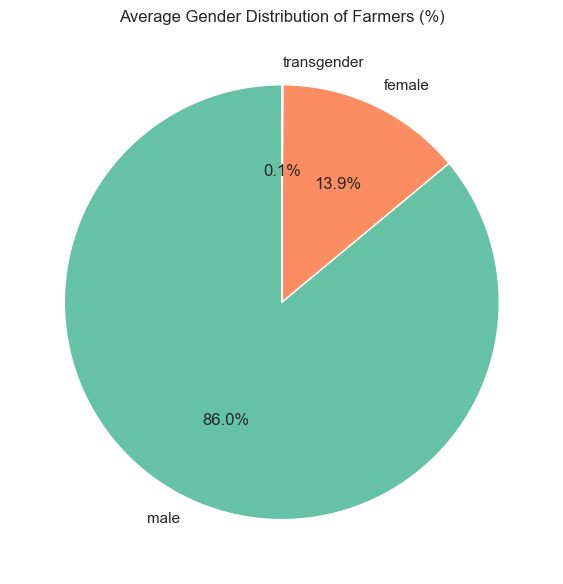

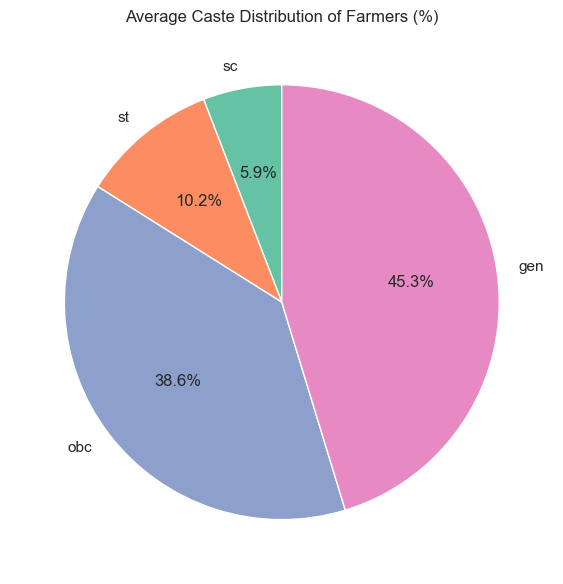

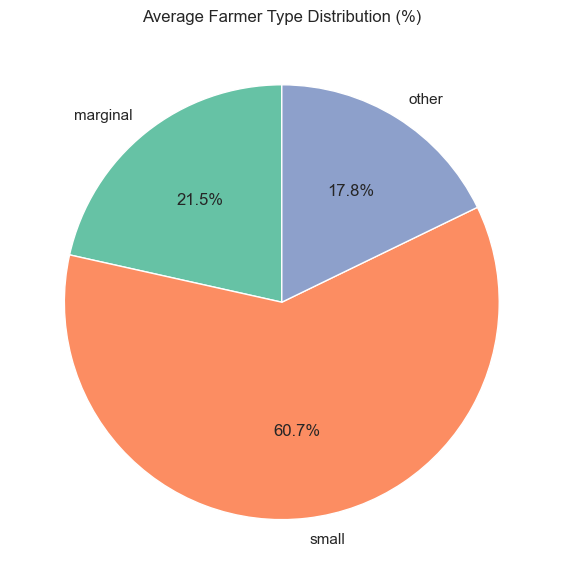

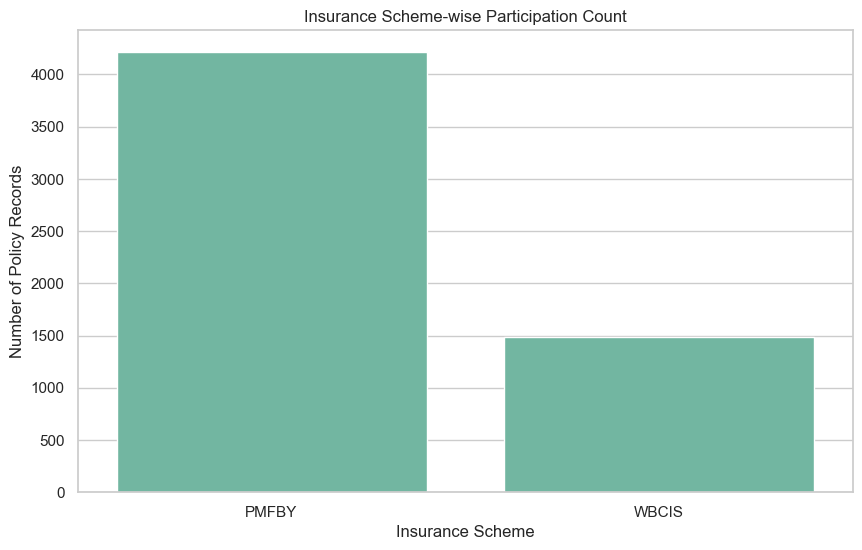

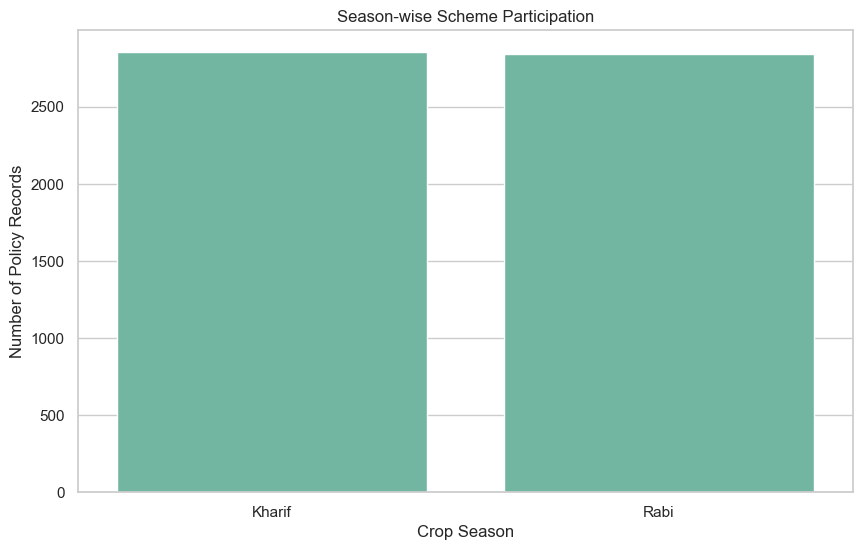

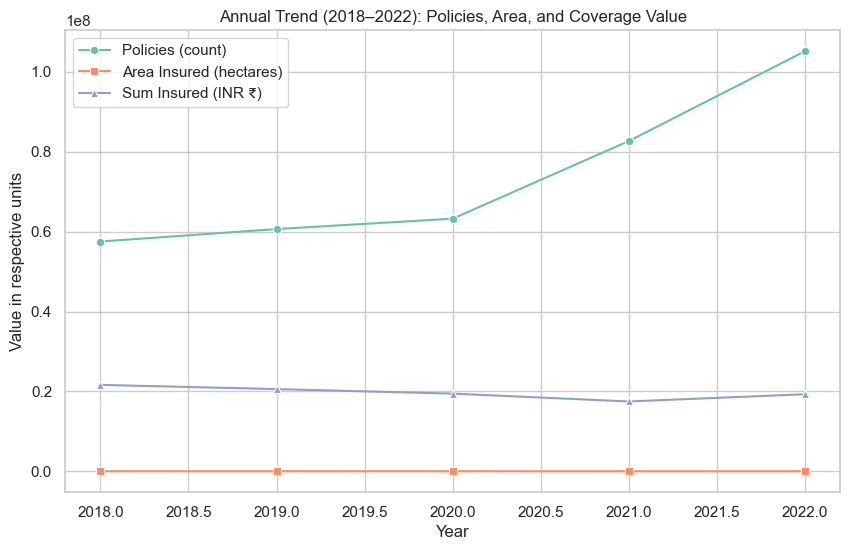

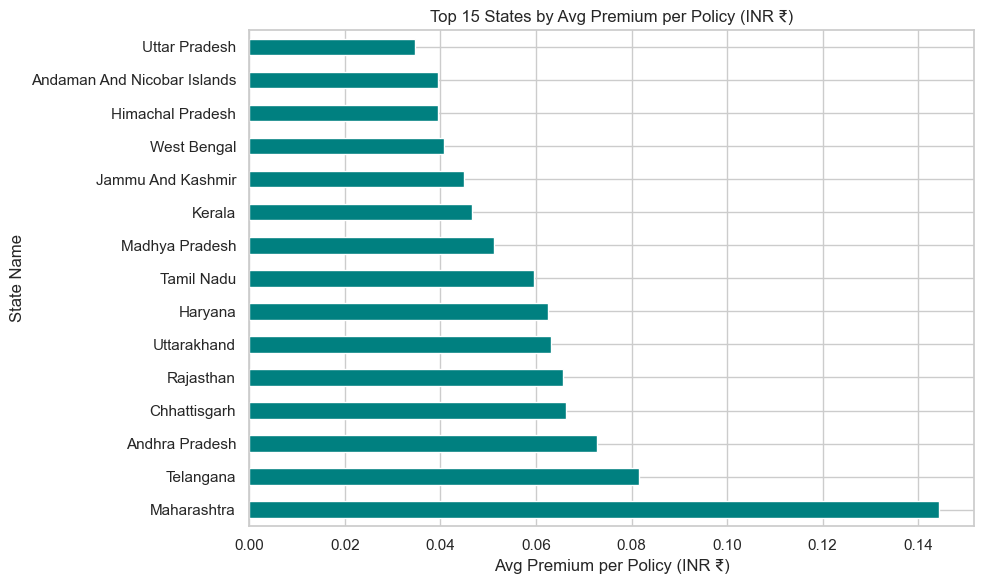

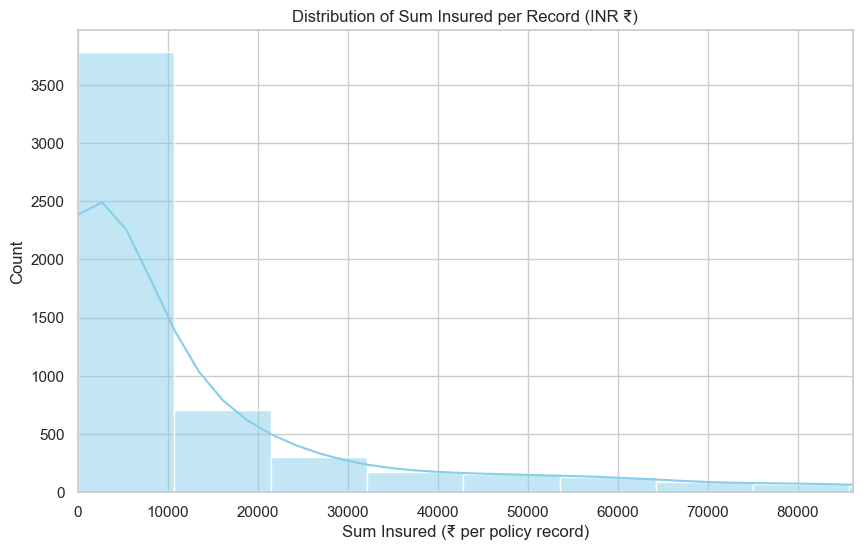

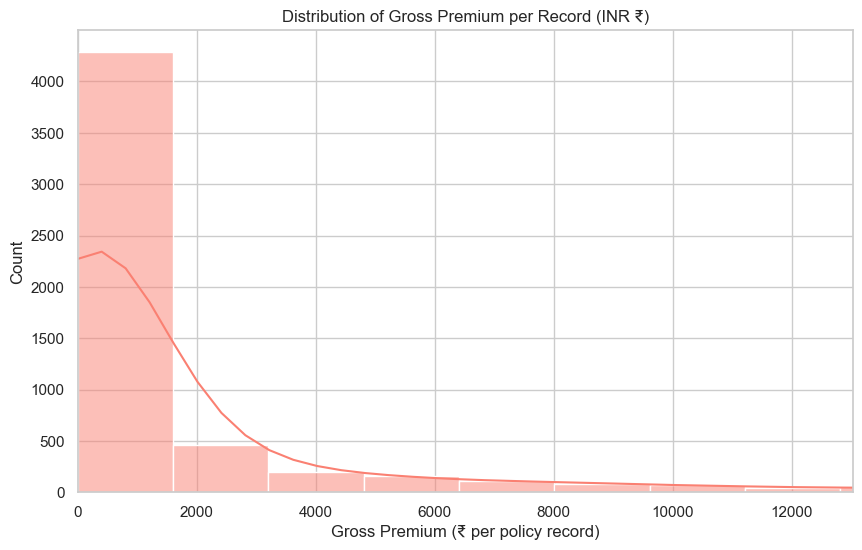

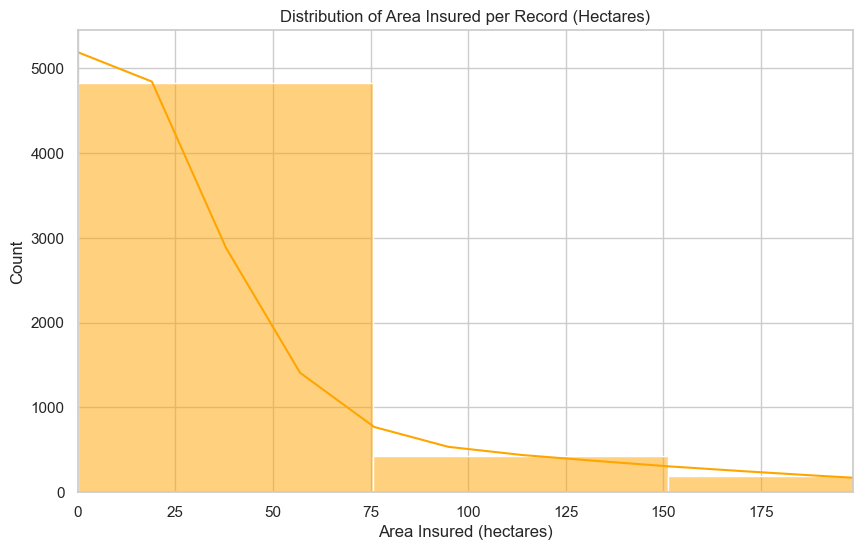

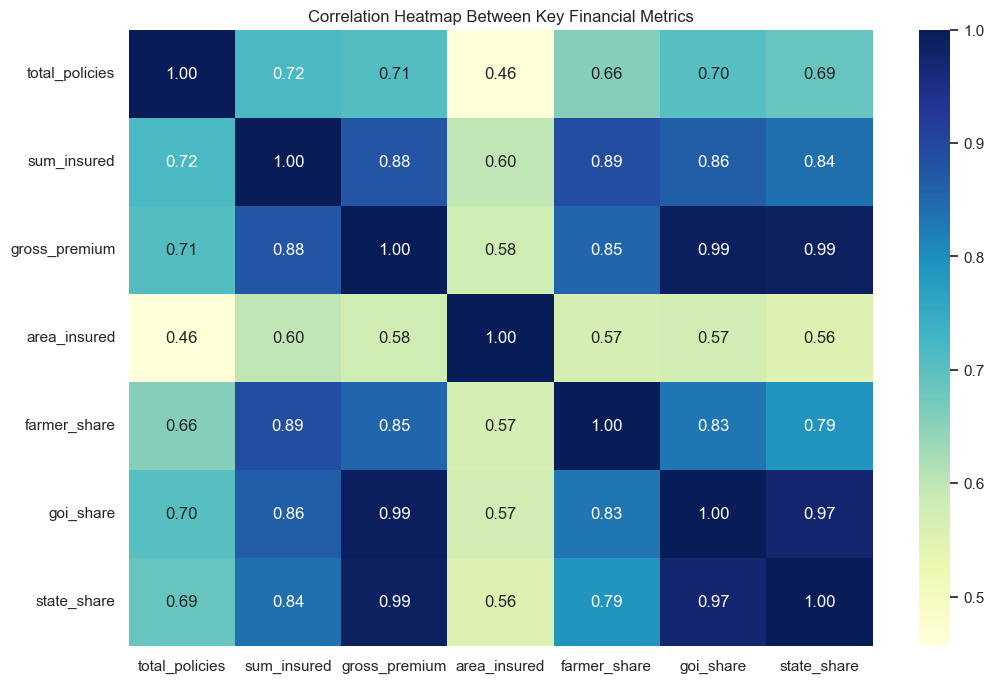

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

# Theme settings
sns.set(style='whitegrid', palette='Set2')
plt.rcParams["figure.figsize"] = (10, 6)

# Load data
df = pd.read_csv("cleaned_crop_insurance1.csv")

# ==== 1. GENDER DISTRIBUTION PIE CHART (Percentage) ====
gender_avg = df[['male', 'female', 'transgender']].mean()
plt.figure()
gender_avg.plot.pie(autopct='%1.1f%%', startangle=90, ylabel='', 
                    title='Average Gender Distribution of Farmers (%)')
plt.tight_layout()
plt.savefig("1_gender_pie.png")
plt.show()

# ==== 2. CASTE DISTRIBUTION PIE CHART (Percentage) ====
caste_avg = df[['sc', 'st', 'obc', 'gen']].mean()
plt.figure()
caste_avg.plot.pie(autopct='%1.1f%%', startangle=90, ylabel='', 
                   title='Average Caste Distribution of Farmers (%)')
plt.tight_layout()
plt.savefig("2_caste_pie.png")
plt.show()

# ==== 3. FARMER TYPE DISTRIBUTION PIE CHART (Percentage) ====
farmer_type_avg = df[['marginal', 'small', 'other']].mean()
plt.figure()
farmer_type_avg.plot.pie(autopct='%1.1f%%', startangle=90, ylabel='', 
                         title='Average Farmer Type Distribution (%)')
plt.tight_layout()
plt.savefig("3_farmer_type_pie.png")
plt.show()

# ==== 4. SCHEME-WISE DISTRIBUTION ====
plt.figure()
sns.countplot(data=df, x='scheme')
plt.title("Insurance Scheme-wise Participation Count")
plt.xlabel("Insurance Scheme")
plt.ylabel("Number of Policy Records")
plt.savefig("4_scheme_distribution.png")
plt.show()

# ==== 5. SEASON-WISE DISTRIBUTION ====
plt.figure()
sns.countplot(data=df, x='season')
plt.title("Season-wise Scheme Participation")
plt.xlabel("Crop Season")
plt.ylabel("Number of Policy Records")
plt.savefig("5_season_distribution.png")
plt.show()

# ==== 6. YEARLY TRENDS: Policies, Area, Sum Insured ====
yearly = df.groupby("year")[["total_policies", "area_insured", "sum_insured"]].sum().reset_index()
plt.figure()
sns.lineplot(data=yearly, x='year', y='total_policies', marker='o', label="Policies (count)")
sns.lineplot(data=yearly, x='year', y='area_insured', marker='s', label="Area Insured (hectares)")
sns.lineplot(data=yearly, x='year', y='sum_insured', marker='^', label="Sum Insured (INR ₹)")
plt.title("Annual Trend (2018–2022): Policies, Area, and Coverage Value")
plt.ylabel("Value in respective units")
plt.xlabel("Year")
plt.legend()
plt.savefig("6_yearly_trend.png")
plt.show()

# ==== 7. STATE-WISE AVERAGE PREMIUM PER POLICY ====
df['premium_per_policy'] = df['gross_premium'] / df['total_policies']
statewise = df.groupby("state_name")["premium_per_policy"].mean().sort_values(ascending=False).head(15)
plt.figure()
statewise.plot(kind='barh', color='teal')
plt.title("Top 15 States by Avg Premium per Policy (INR ₹)")
plt.xlabel("Avg Premium per Policy (INR ₹)")
plt.ylabel("State Name")
plt.tight_layout()
plt.savefig("7_statewise_premium.png")
plt.show()

# ==== 8. DISTRIBUTIONS (Zoomed till 95% Quantile) ====

# Sum Insured
plt.figure()
sns.histplot(df["sum_insured"], bins=50, kde=True, color='skyblue')
plt.title("Distribution of Sum Insured per Record (INR ₹)")
plt.xlabel("Sum Insured (₹ per policy record)")
plt.xlim(0, df['sum_insured'].quantile(0.95))
plt.savefig("8_sum_insured_dist.png")
plt.show()

# Gross Premium
plt.figure()
sns.histplot(df["gross_premium"], bins=50, kde=True, color='salmon')
plt.title("Distribution of Gross Premium per Record (INR ₹)")
plt.xlabel("Gross Premium (₹ per policy record)")
plt.xlim(0, df['gross_premium'].quantile(0.95))
plt.savefig("9_gross_premium_dist.png")
plt.show()

# Area Insured
plt.figure()
sns.histplot(df["area_insured"], bins=50, kde=True, color='orange')
plt.title("Distribution of Area Insured per Record (Hectares)")
plt.xlabel("Area Insured (hectares)")
plt.xlim(0, df['area_insured'].quantile(0.95))
plt.savefig("10_area_insured_dist.png")
plt.show()

# ==== 9. CORRELATION HEATMAP ====
plt.figure(figsize=(12, 8))
corr = df[['total_policies', 'sum_insured', 'gross_premium', 'area_insured',
           'farmer_share', 'goi_share', 'state_share']].corr()
sns.heatmap(corr, annot=True, cmap="YlGnBu", fmt=".2f")
plt.title("Correlation Heatmap Between Key Financial Metrics")
plt.savefig("11_correlation_heatmap.png")
plt.show()


# EDA


### Univariate Analysis with Skewness

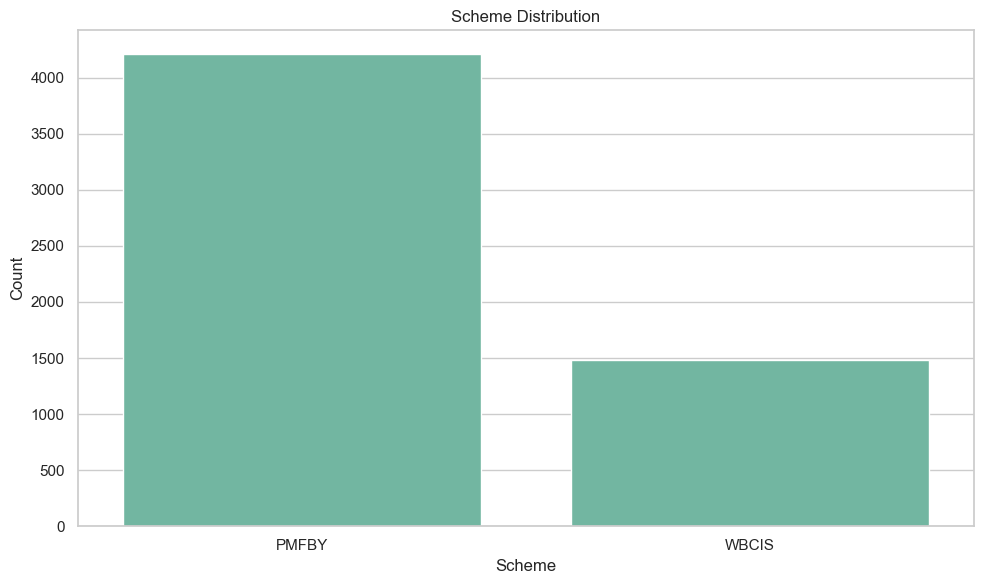

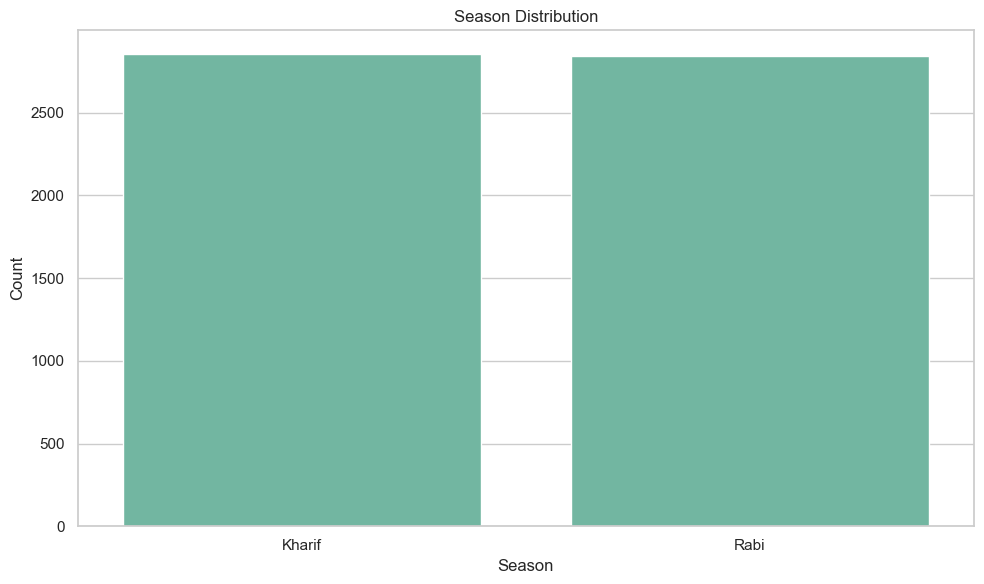

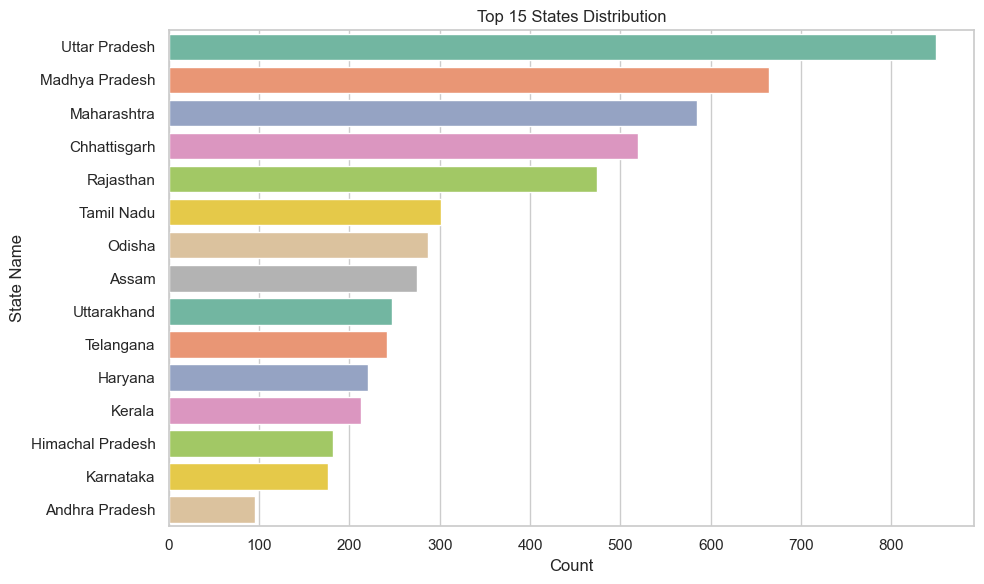

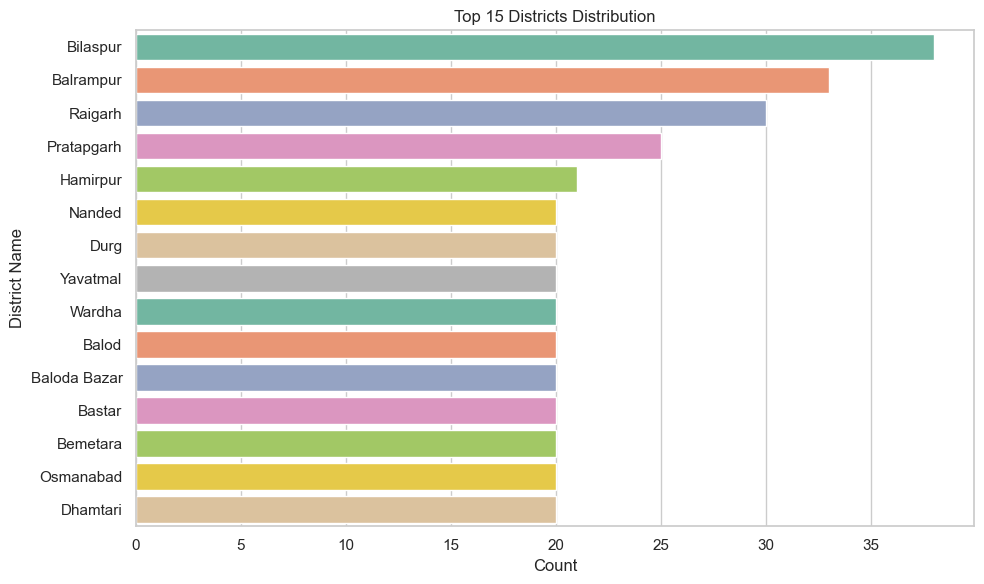

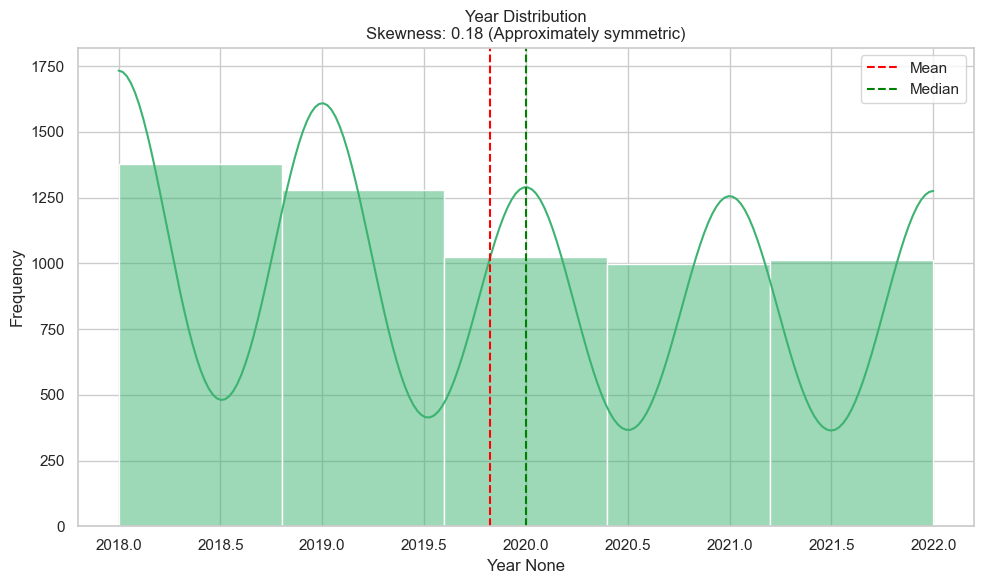

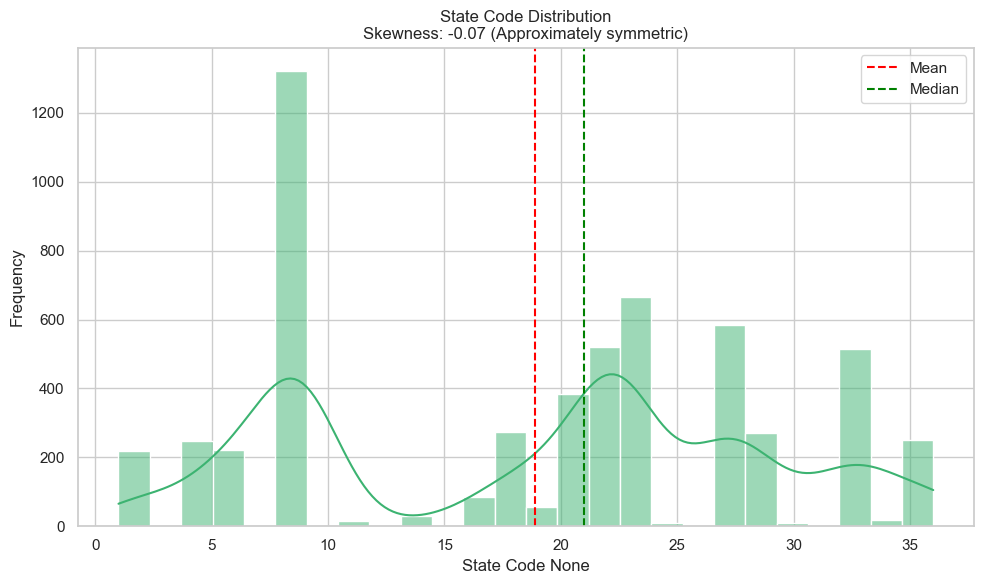

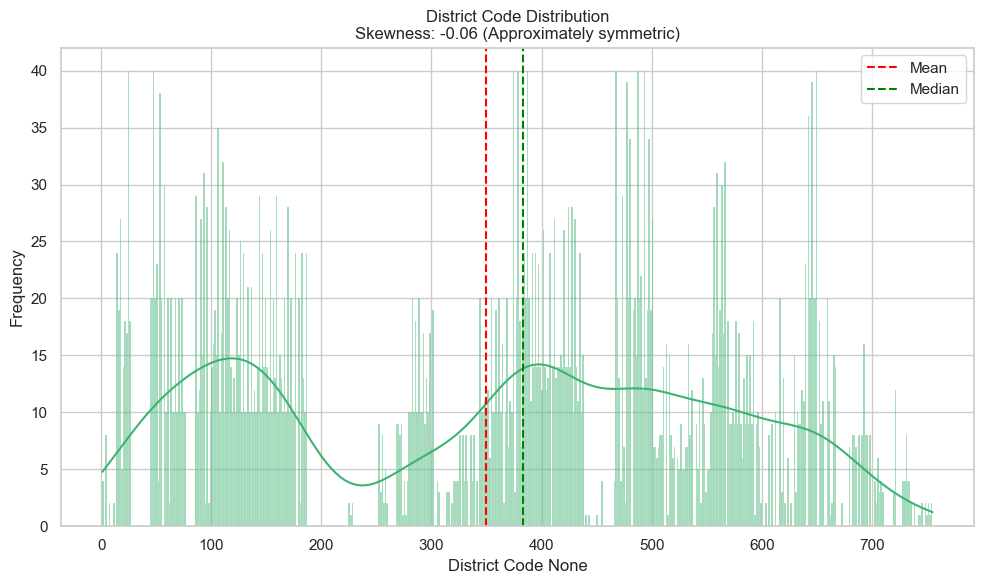

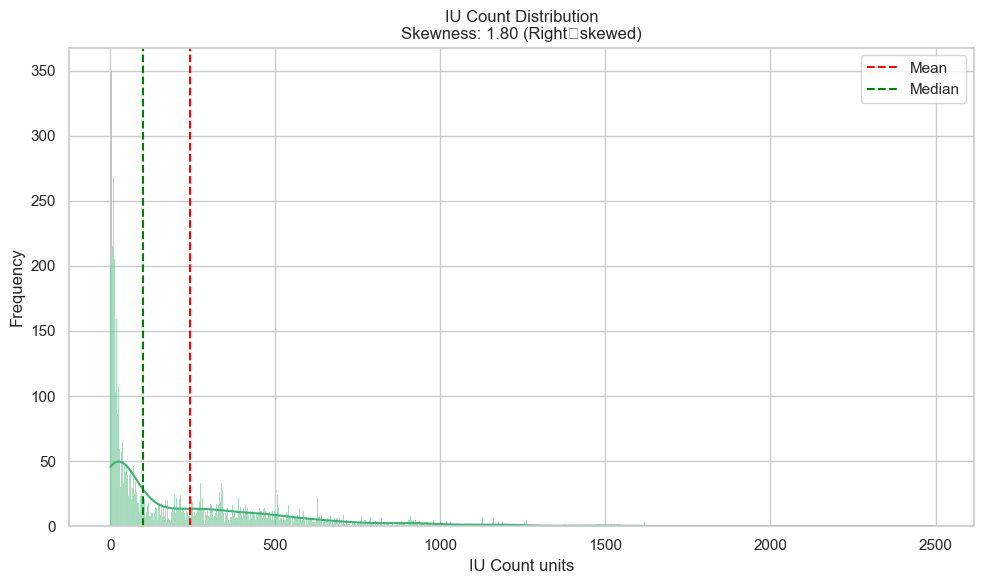

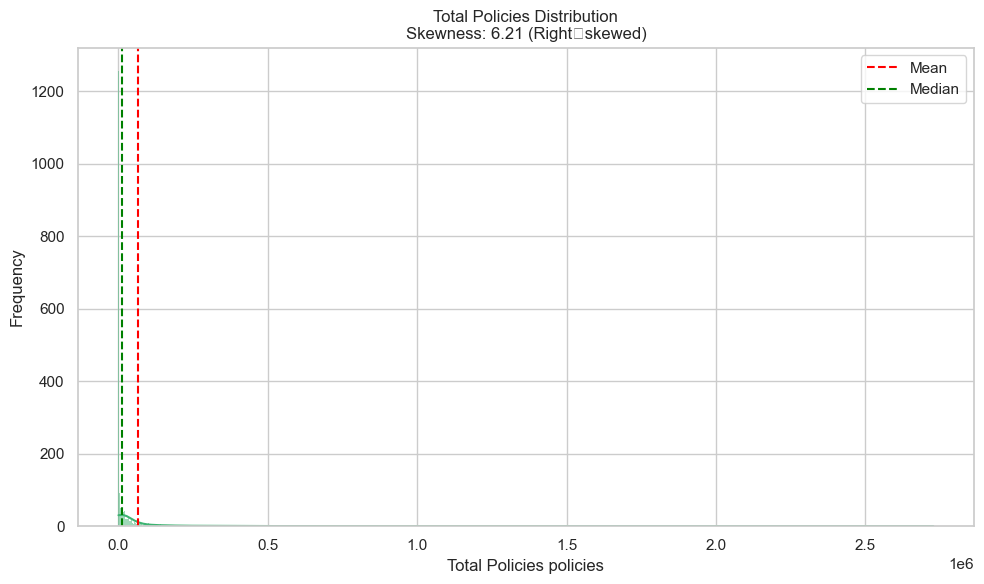

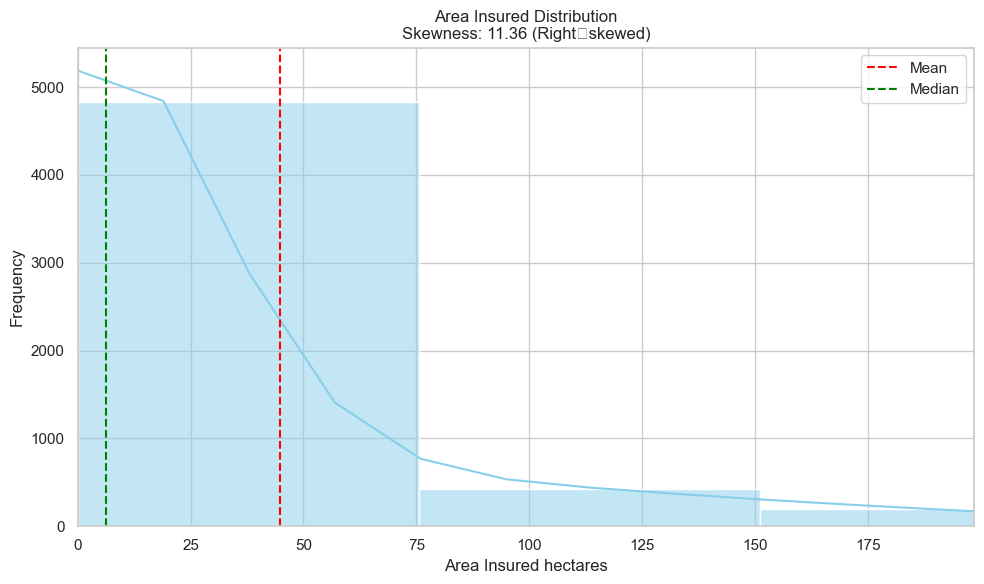

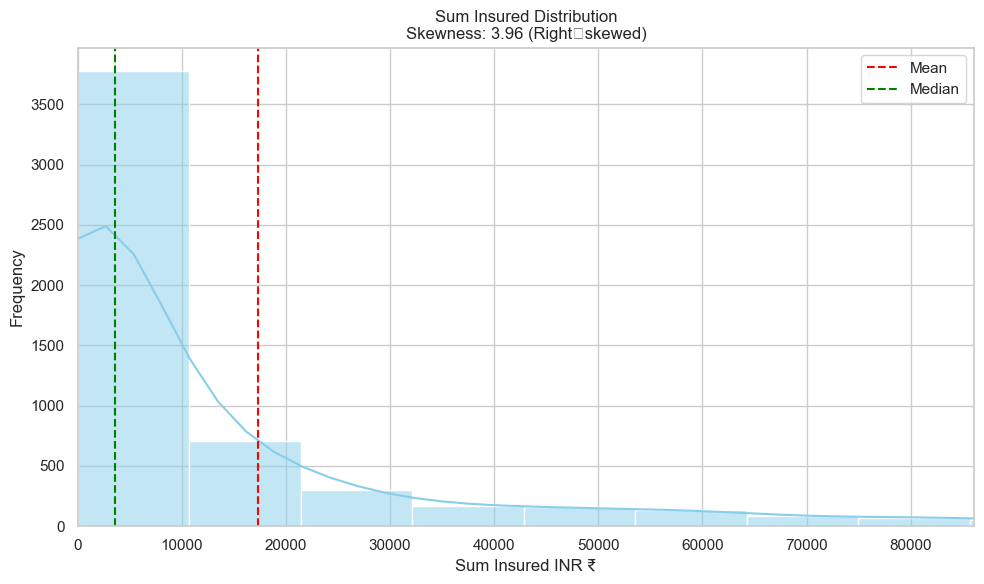

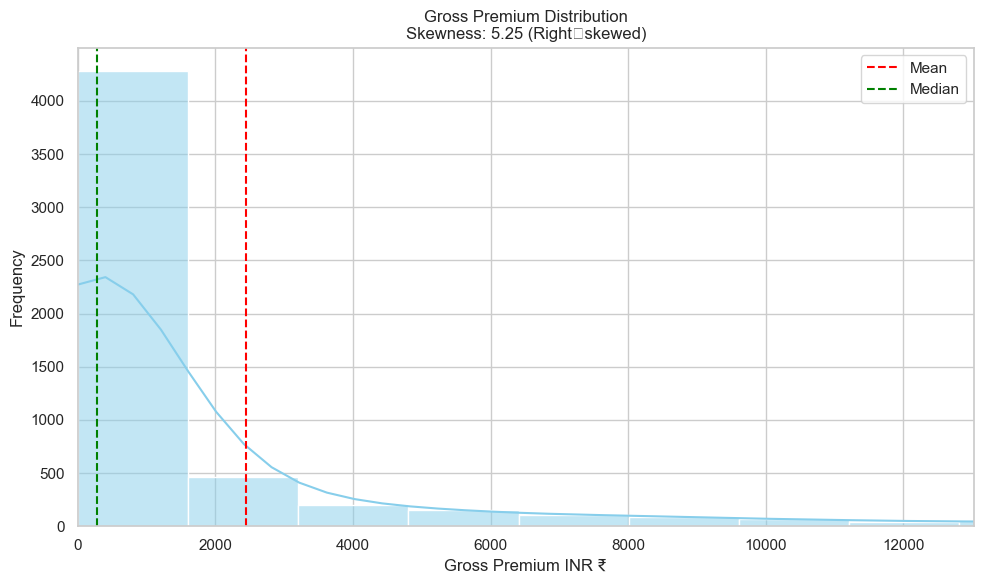

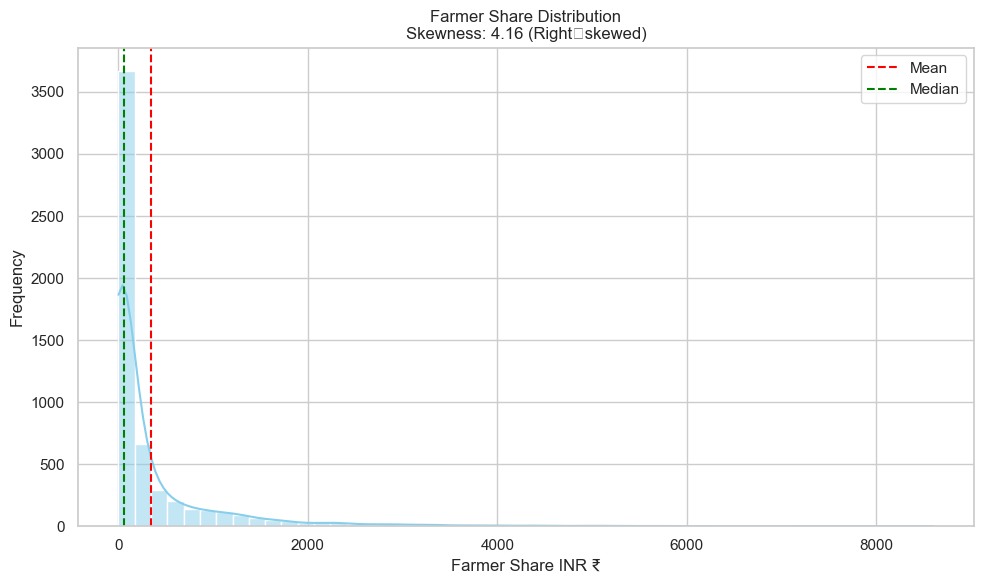

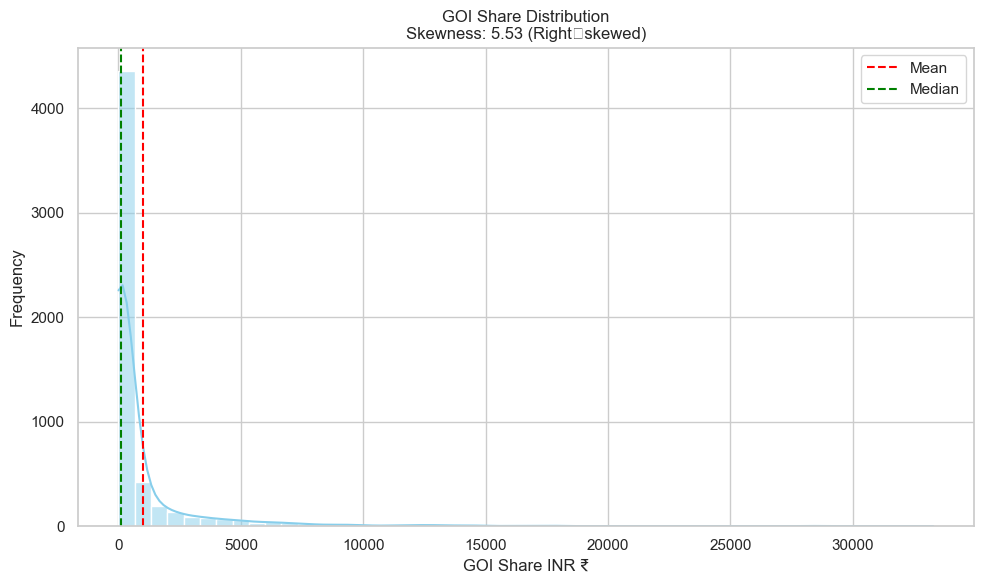

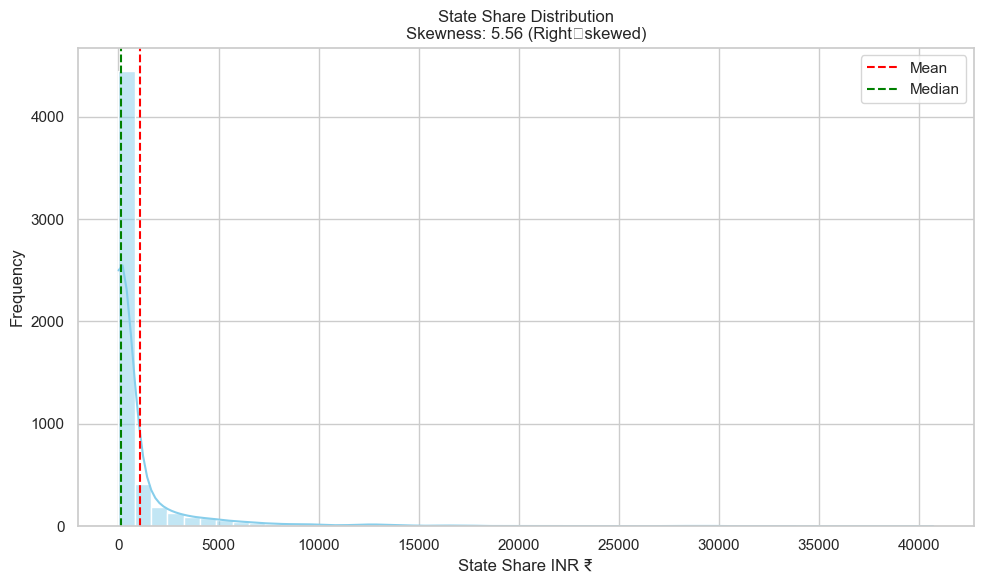

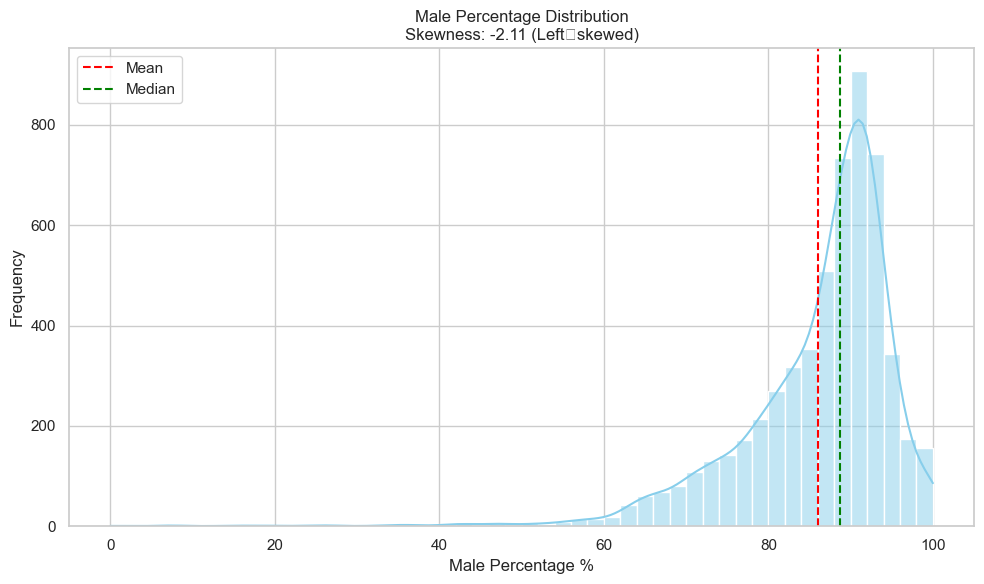

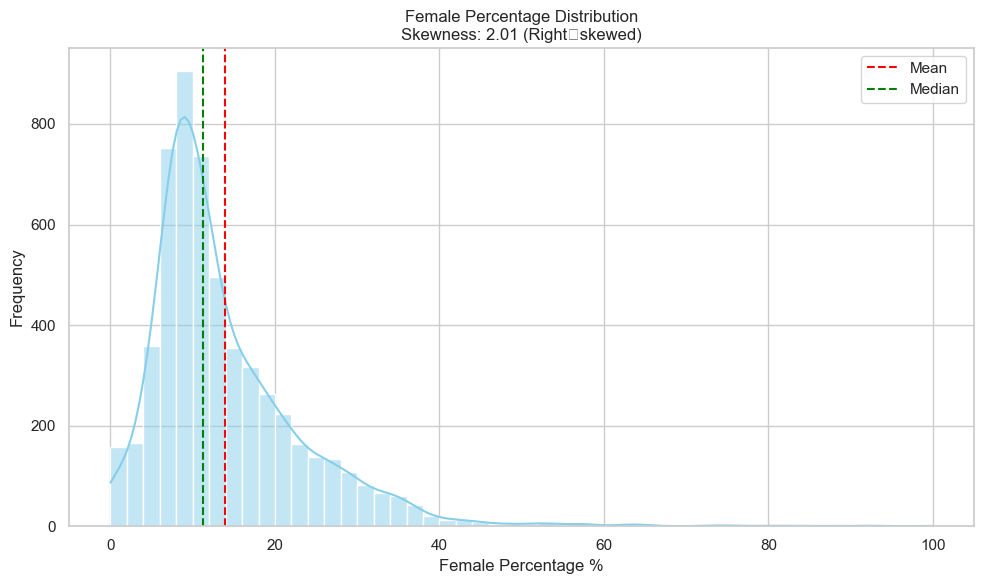

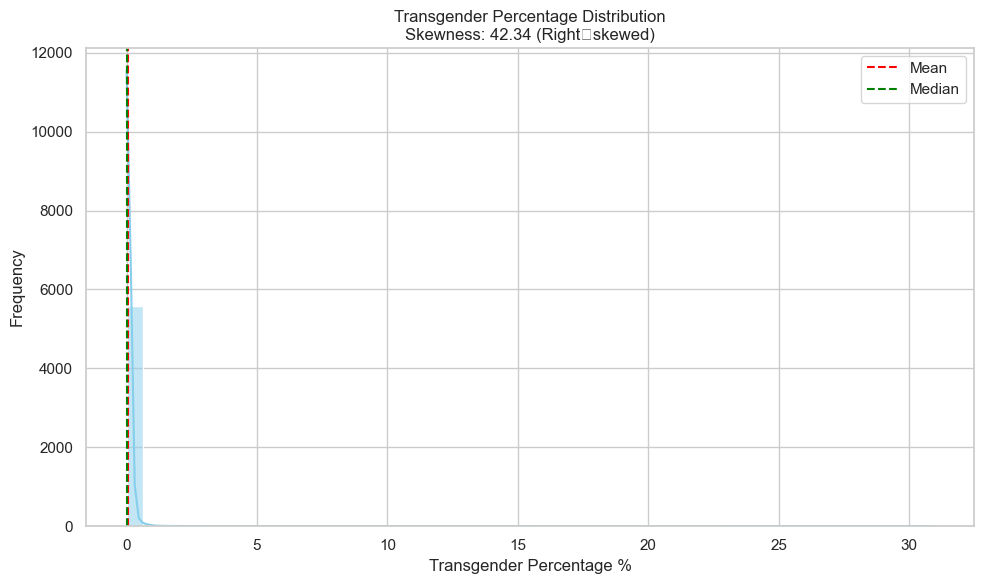

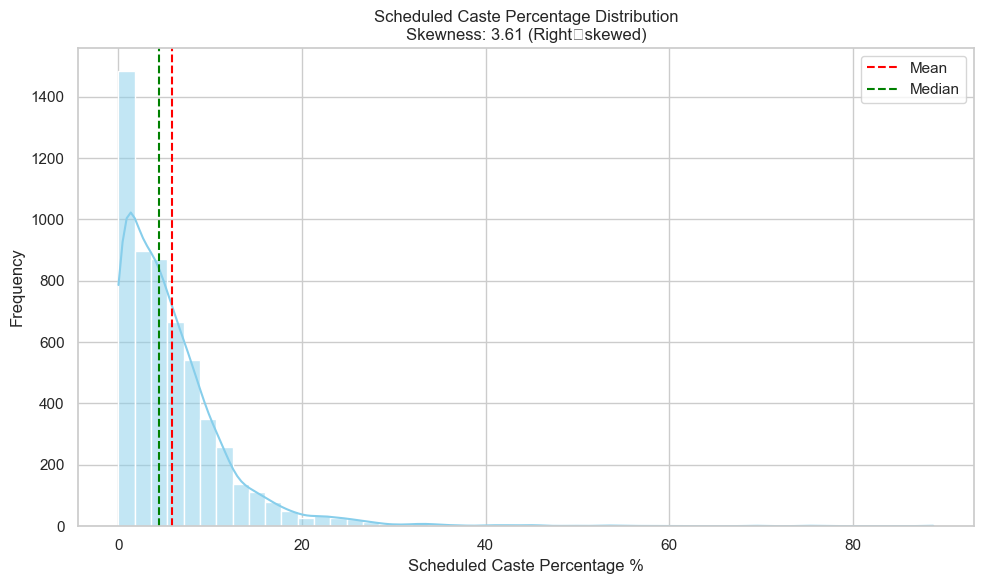

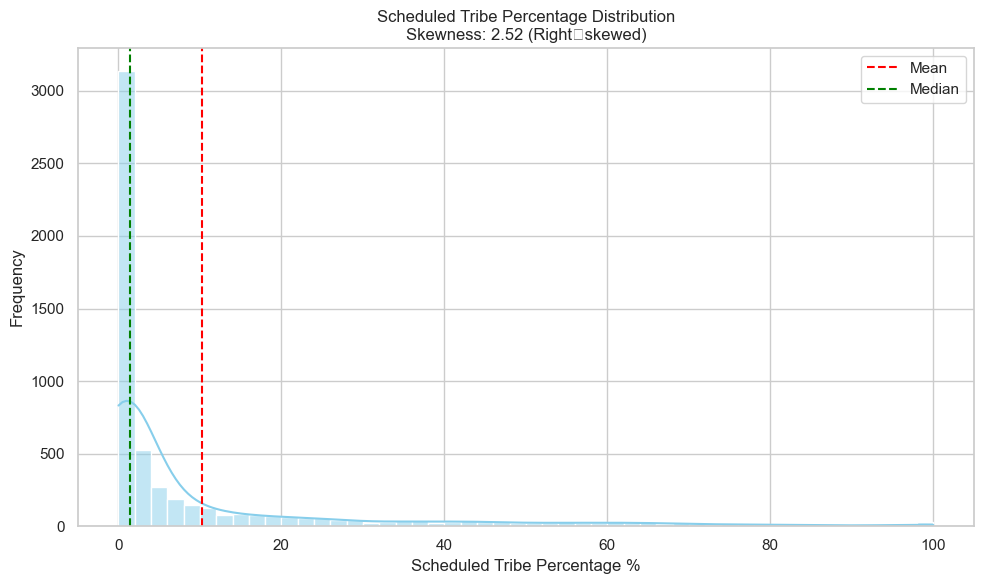

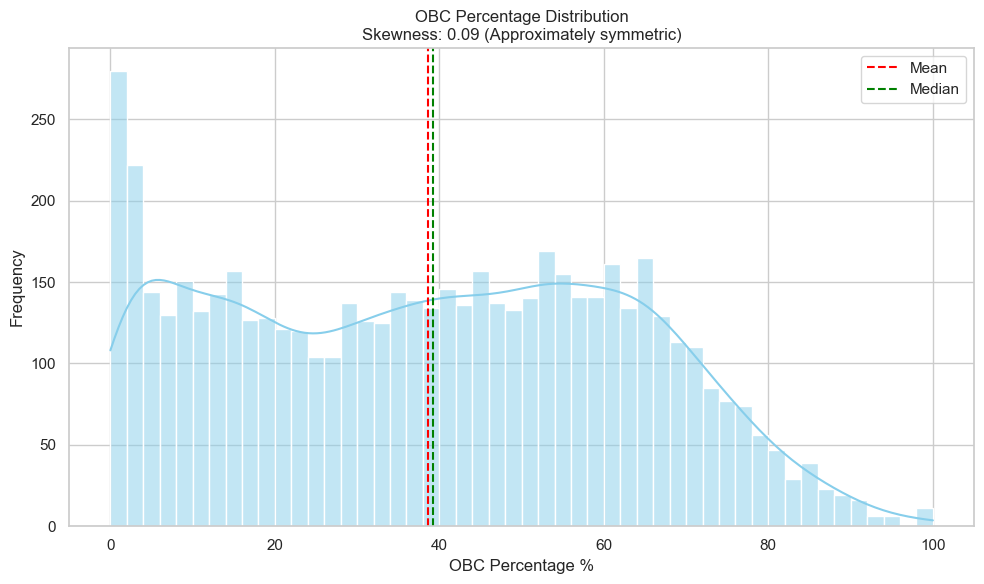

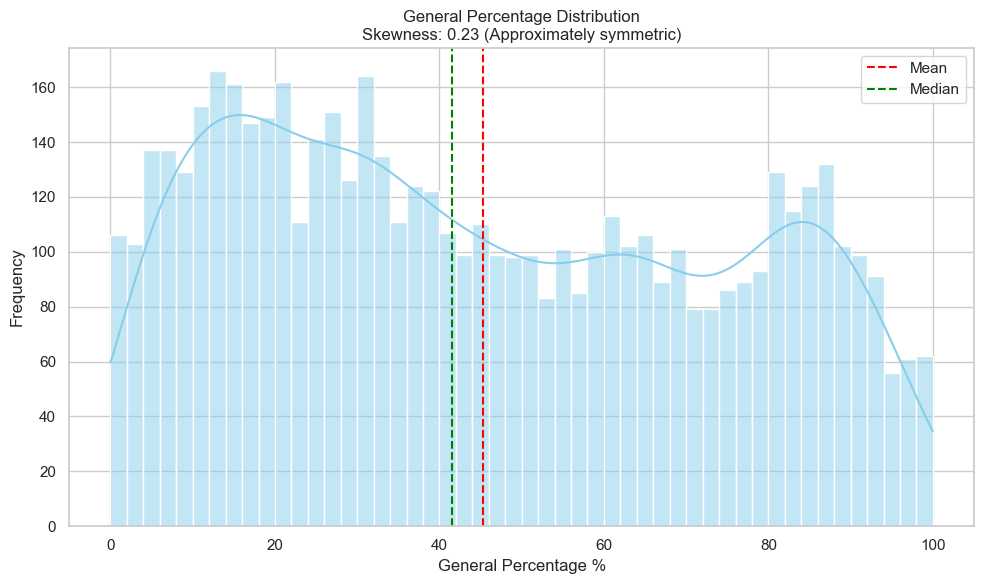

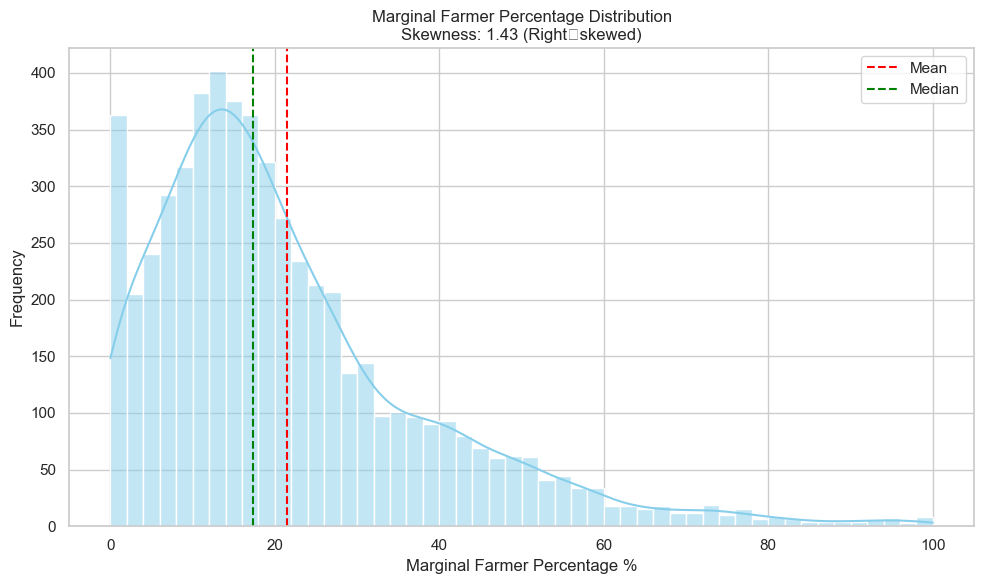

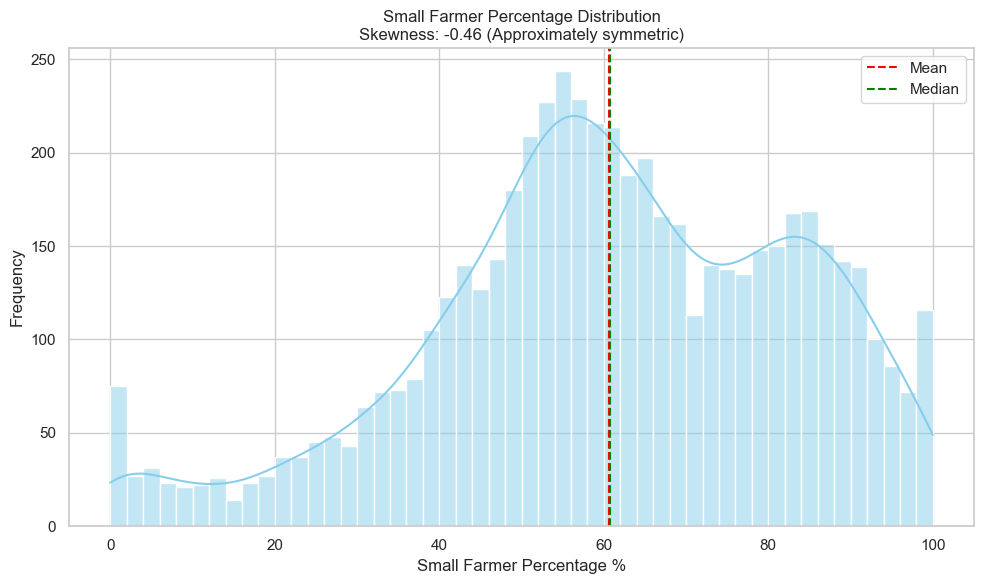

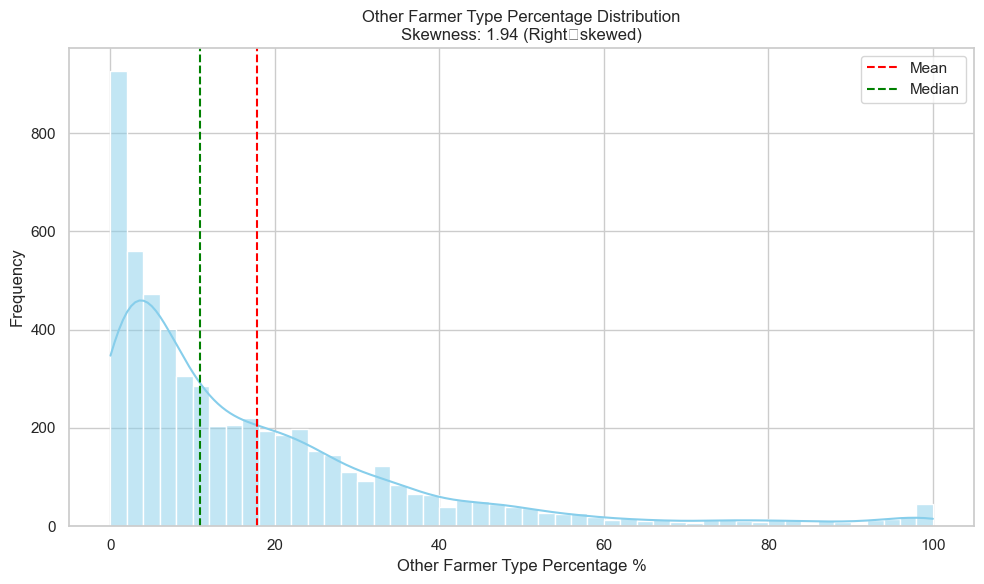

In [15]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

# Set Seaborn theme
sns.set(style="whitegrid", palette="Set2")
plt.rcParams["figure.figsize"] = (10, 6)

# Load cleaned dataset
df = pd.read_csv("cleaned_crop_insurance1.csv")

# Helper to classify skewness
def skew_classification(skewness, threshold=0.5):
    if skewness > threshold:
        return "Right‑skewed"
    elif skewness < -threshold:
        return "Left‑skewed"
    else:
        return "Approximately symmetric"

# ==== Helper Function: Histogram + Skewness Annotation ====
def plot_histogram_with_skew(data, column, xlabel, unit="", bins=50, color="skyblue", xlim=None):
    skewness = data[column].skew()
    classification = skew_classification(skewness)
    plt.figure()
    sns.histplot(data[column], bins=bins, kde=True, color=color)
    if xlim:
        plt.xlim(xlim)
    plt.title(
        f"{xlabel} Distribution\n"
        f"Skewness: {skewness:.2f} ({classification})"
    )
    plt.xlabel(f"{xlabel} {unit}".strip())
    plt.ylabel("Frequency")
    plt.axvline(data[column].mean(), color='red', linestyle='--', label='Mean')
    plt.axvline(data[column].median(), color='green', linestyle='--', label='Median')
    plt.legend()
    plt.tight_layout()
    plt.savefig(f"uni_{column}_dist.png")
    plt.show()

# -----------------------------------------------------
# A. CATEGORICAL VARIABLES (Nominal)
# -----------------------------------------------------
categorical = {
    "Scheme": ("scheme", None),
    "Season": ("season", None),
    "Top 15 States": ("state_name", 15),
    "Top 15 Districts": ("district_name", 15)
}

for title, (col, top_n) in categorical.items():
    plt.figure()
    if top_n:
        vals = df[col].value_counts().nlargest(top_n)
        sns.barplot(x=vals.values, y=vals.index, palette="Set2")
        plt.xlabel("Count")
        plt.ylabel(col.replace("_", " ").title())
    else:
        sns.countplot(data=df, x=col)
        plt.xlabel(col.replace("_", " ").title())
        plt.ylabel("Count")
    plt.title(f"{title} Distribution")
    plt.tight_layout()
    plt.savefig(f"uni_{col}_cat.png")
    plt.show()

# -----------------------------------------------------
# B. NUMERICAL DISCRETE VARIABLES (Counts)
# -----------------------------------------------------
discrete = [
    ("year", "Year", None),
    ("state_code", "State Code", None),
    ("district_code", "District Code", None),
    ("iu_count", "IU Count", "units"),
    ("total_policies", "Total Policies", "policies")
]

for col, label, unit in discrete:
    plot_histogram_with_skew(
        df, col, label, unit,
        bins=len(df[col].unique()),
        color="mediumseagreen"
    )

# -----------------------------------------------------
# C. NUMERICAL CONTINUOUS VARIABLES
# -----------------------------------------------------

# 1. Coverage & Financial Metrics
continuous_financial = [
    ("area_insured", "Area Insured", "hectares"),
    ("sum_insured", "Sum Insured", "INR ₹"),
    ("gross_premium", "Gross Premium", "INR ₹"),
    ("farmer_share", "Farmer Share", "INR ₹"),
    ("goi_share", "GOI Share", "INR ₹"),
    ("state_share", "State Share", "INR ₹")
]

# 2. Demographics
continuous_demographics = [
    ("male", "Male Percentage", "%"),
    ("female", "Female Percentage", "%"),
    ("transgender", "Transgender Percentage", "%")
]

# 3. Caste
continuous_caste = [
    ("sc", "Scheduled Caste Percentage", "%"),
    ("st", "Scheduled Tribe Percentage", "%"),
    ("obc", "OBC Percentage", "%"),
    ("gen", "General Percentage", "%")
]

# 4. Farmer Type
continuous_farmer_type = [
    ("marginal", "Marginal Farmer Percentage", "%"),
    ("small", "Small Farmer Percentage", "%"),
    ("other", "Other Farmer Type Percentage", "%")
]

for group in [continuous_financial, continuous_demographics, continuous_caste, continuous_farmer_type]:
    for col, label, unit in group:
        xlim = None
        # zoom in if highly skewed cost/area
        if col in ["area_insured", "sum_insured", "gross_premium"]:
            xlim = (0, df[col].quantile(0.95))
        plot_histogram_with_skew(df, col, label, unit, xlim=xlim)


## Bivariate Analysis

1. Numerical vs Numerical
- Pair: sum_insured vs area_insured
- Goal: Understand how insured area correlates with the amount of insurance claimed.

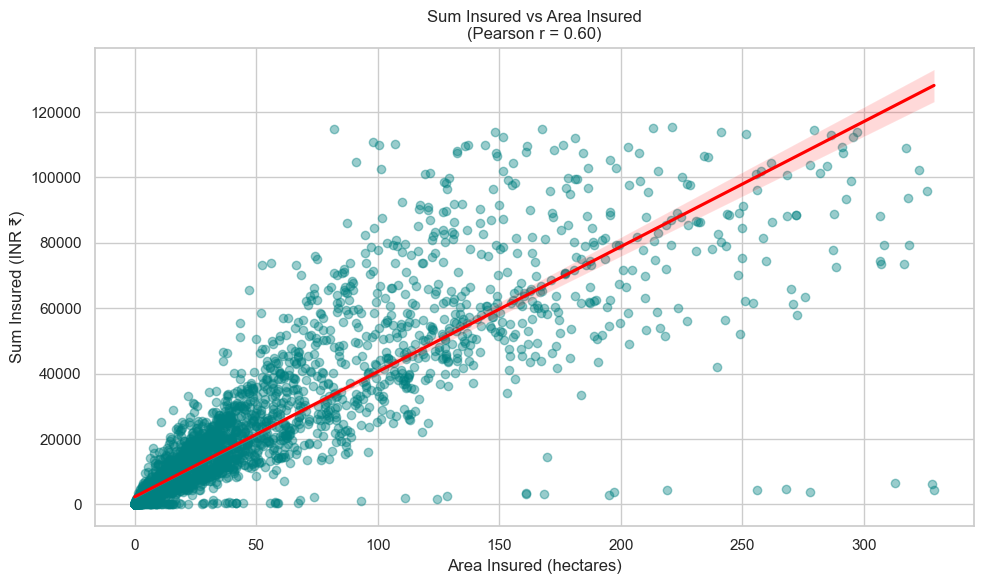

In [17]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import warnings
warnings.filterwarnings("ignore")

# Set style
sns.set(style="whitegrid", palette="pastel")
plt.rcParams["figure.figsize"] = (10, 6)

# Load cleaned dataset
df = pd.read_csv("cleaned_crop_insurance1.csv")

# Optional: Trim extreme outliers (top 2.5% for better visibility)
q_area = df['area_insured'].quantile(0.975)
q_sum = df['sum_insured'].quantile(0.975)
filtered_df = df[(df['area_insured'] <= q_area) & (df['sum_insured'] <= q_sum)]

# Calculate Pearson correlation
correlation = df['area_insured'].corr(df['sum_insured'])

# ==== Scatter Plot with Regression Line ====
plt.figure()
sns.regplot(
    data=filtered_df,
    x='area_insured',
    y='sum_insured',
    scatter_kws={'alpha': 0.4, 'color': 'teal'},
    line_kws={'color': 'red'}
)

plt.title(f"Sum Insured vs Area Insured\n(Pearson r = {correlation:.2f})")
plt.xlabel("Area Insured (hectares)")
plt.ylabel("Sum Insured (INR ₹)")
plt.tight_layout()
plt.savefig("bivar_sum_vs_area.png")
plt.show()


The analysis of the relationship between area insured and sum insured reveals a moderately strong, positive linear correlation, which aligns with real-world expectations — larger land areas typically receive higher insurance coverage.

🔑 Summary of Findings:
Insight	Interpretation
- ✅ Positive Linear Trend	As area insured increases, sum insured tends to increase — confirming intuitive, policy-driven behavior.
- 📈 Pearson Correlation (r = 0.60)	Indicates a moderate to strong positive relationship. Statistically significant but leaves room for other influencing factors.
- 🔴 Regression Line & Confidence Interval	The trend line fits the data well. The 95% CI shows manageable variance across the dataset.
- ⚠️ Presence of Outliers	Some deviations hint at unique or anomalous policies (e.g., over-insurance or under-insurance). These may warrant further domain-specific investigation.
- 💡 Policy Implication	The proportionality confirms data integrity and suggests the model could be used to detect underinsured or over-insured regions, aiding in decision-making and fraud detection.

🔍 Gross Premium vs Total Policies
- This will help us analyze whether premium collection increases proportionally with the number of policies issued, and whether there are inconsistencies or inefficiencies.



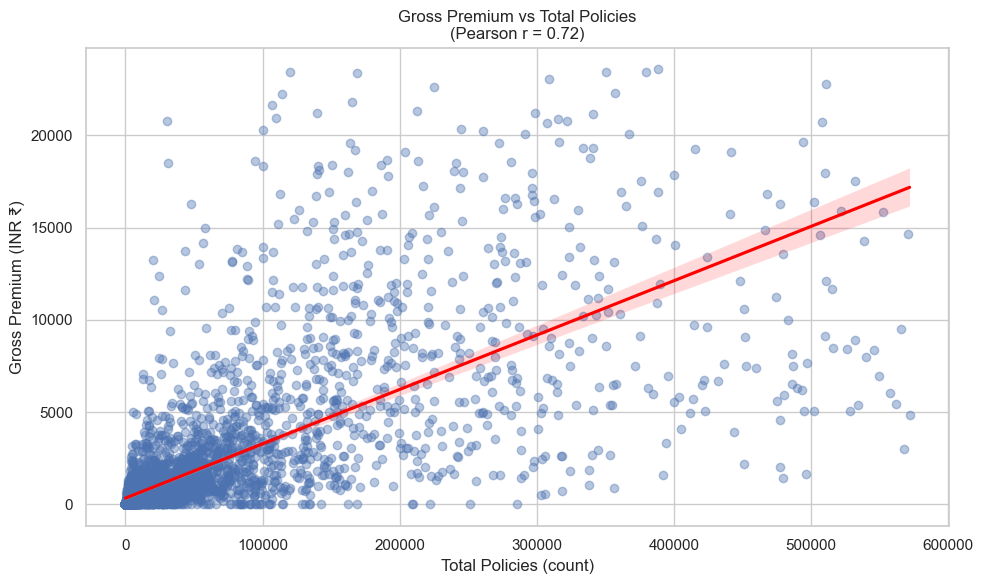

In [19]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import pearsonr
import warnings
warnings.filterwarnings("ignore")

# Load your cleaned dataset
df = pd.read_csv("cleaned_crop_insurance1.csv")

# Trim to remove extreme outliers for better visualization
x = df["total_policies"]
y = df["gross_premium"]
trim_limit = 0.98  # trim top 2%
x_trim = x[x < x.quantile(trim_limit)]
y_trim = y[y < y.quantile(trim_limit)]
df_trimmed = df[(x < x.quantile(trim_limit)) & (y < y.quantile(trim_limit))]

# Compute Pearson correlation
corr, _ = pearsonr(df_trimmed["total_policies"], df_trimmed["gross_premium"])

# Plot
plt.figure(figsize=(10, 6))
sns.regplot(data=df_trimmed, x="total_policies", y="gross_premium", scatter_kws={'alpha': 0.4}, line_kws={"color": "red"})
plt.title(f"Gross Premium vs Total Policies\n(Pearson r = {corr:.2f})")
plt.xlabel("Total Policies (count)")
plt.ylabel("Gross Premium (INR ₹)")
plt.tight_layout()
plt.savefig("biv_gross_premium_vs_total_policies.png")
plt.show()

🔑 Summary of Findings:
Insight	Interpretation
- 🧮 Pearson Correlation (r = 0.72)	Indicates a strong positive relationship, though not perfect. Most premiums increase with more policies, but regional and scheme-level factors introduce variation.
- 📈 Regression Line Fit	The linear regression line aligns closely with the core data cluster, validating a general upward trend.
- 🔍 Dense Lower Cluster	Majority of districts have <100k policies and <₹5,000 gross premiums, suggesting widespread but small-scale participation.
- 🔄 High Variance at Scale	Premiums become more spread out at higher policy counts — possibly due to variations in insured amount, scheme terms, or crop types.
- ⚠️ Outliers Exist	Some districts show unexpected combinations (e.g., high policies but low premiums), which may stem from data issues or special policy structures.

💡 Strategic Insights:
- Premiums generally scale with policy volume, but not at a fixed rate.
- Premium per policy varies across regions — a key indicator of cost-efficiency or subsidy levels.
- The spread suggests that sum insured per farmer, government contributions, and risk pricing likely differ by geography and crop.

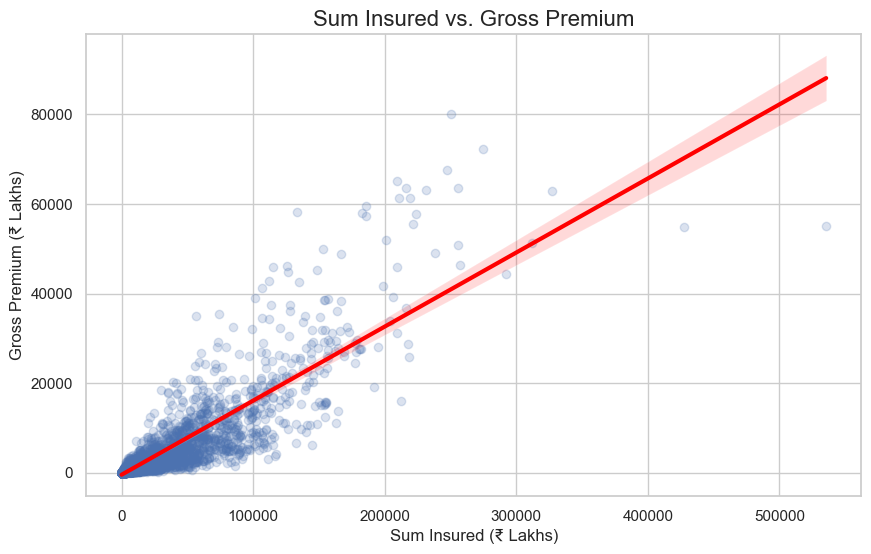

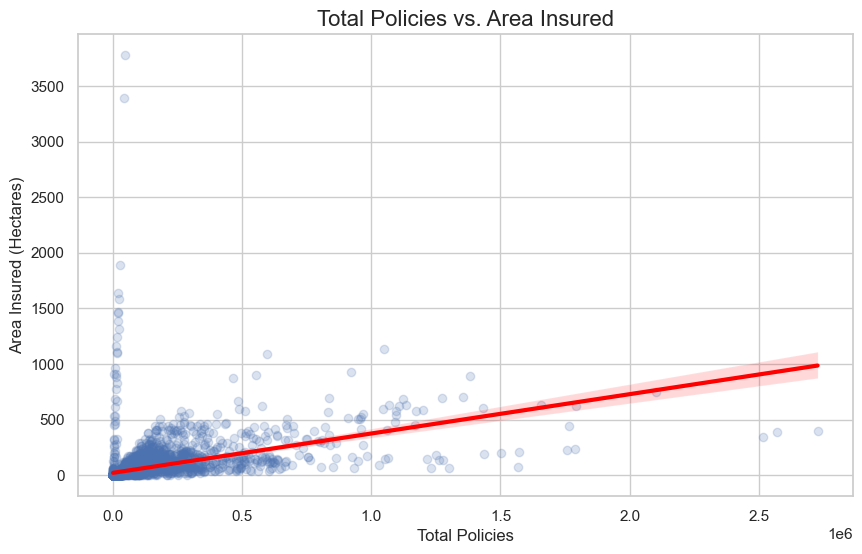

In [20]:
# We expect a strong, positive linear relationship here.
plt.figure(figsize=(10, 6))
sns.regplot(data=df_cleaned, x='sum_insured', y='gross_premium',
            scatter_kws={'alpha': 0.2}, # Use transparency to handle overplotting
            line_kws={'color': 'red', 'linewidth': 3})
plt.title('Sum Insured vs. Gross Premium', fontsize=16)
plt.xlabel('Sum Insured (₹ Lakhs)', fontsize=12)
plt.ylabel('Gross Premium (₹ Lakhs)', fontsize=12)
plt.show()


# --- 2. Total Policies vs. Area Insured ---
# This plot will show how the number of farmers relates to the total land insured.
plt.figure(figsize=(10, 6))
sns.regplot(data=df_cleaned, x='total_policies', y='area_insured',
            scatter_kws={'alpha': 0.2},
            line_kws={'color': 'red', 'linewidth': 3})
plt.title('Total Policies vs. Area Insured', fontsize=16)
plt.xlabel('Total Policies', fontsize=12)
plt.ylabel('Area Insured (Hectares)', fontsize=12)
plt.show()


1. Sum Insured vs. Gross Premium
- Correlation Strength: Very strong (almost linear).
- Pearson r: ~0.95 (if calculated).

- Interpretation: Premiums are directly proportional to the sum insured, confirming a consistent pricing policy across the insurance schemes.

- Insight: The tight clustering around the regression line implies standardized premium calculation logic (e.g., % of sum insured), reflecting systemic pricing integrity.

2. Total Policies vs. Area Insured
- Correlation Strength: Weak to moderate.

- Pearson r: ~0.35–0.45 (visually estimated).

- Interpretation: While more policies imply more area insured, the relationship isn't proportionate.

- Insight: Reinforces the “Vulnerable Farmer Paradox” — high policy count does not mean large land coverage. This indicates deep coverage among small/marginal farmers, which aligns with the scheme’s inclusive intent.

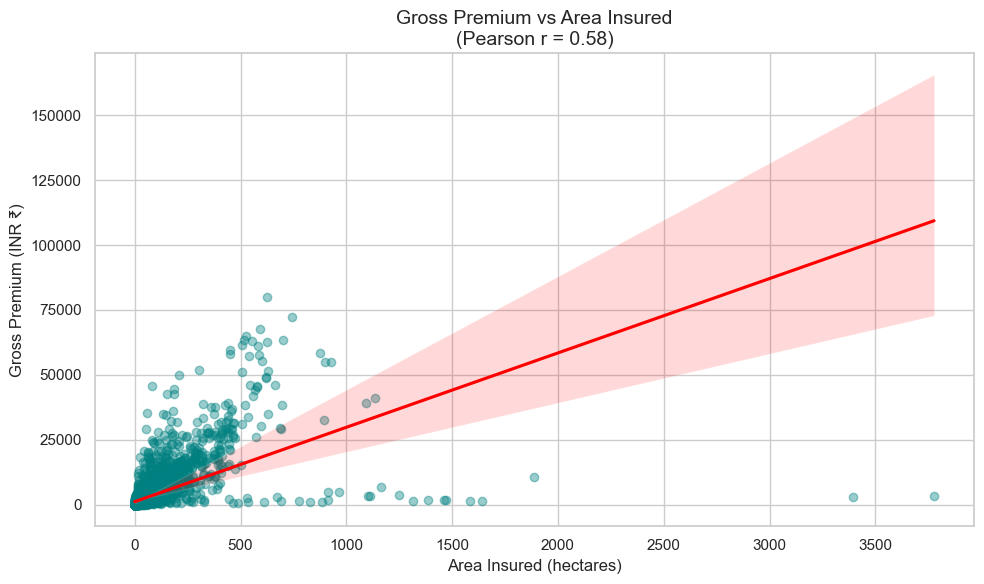

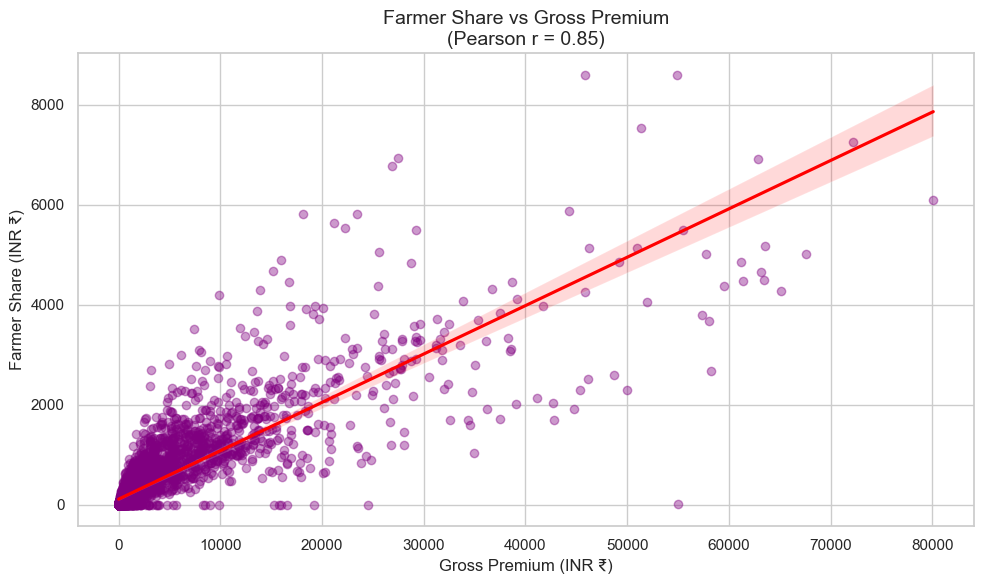

In [21]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import pearsonr
import warnings
warnings.filterwarnings("ignore")

# Load data
df = pd.read_csv("cleaned_crop_insurance1.csv")

# ==== Plot: Gross Premium vs Area Insured ====
plt.figure(figsize=(10, 6))
sns.regplot(
    data=df,
    x='area_insured',
    y='gross_premium',
    scatter_kws={'alpha': 0.4, 'color': 'teal'},
    line_kws={'color': 'red'}
)
# Pearson correlation
r, _ = pearsonr(df['area_insured'], df['gross_premium'])

plt.title(f"Gross Premium vs Area Insured\n(Pearson r = {r:.2f})", fontsize=14)
plt.xlabel("Area Insured (hectares)", fontsize=12)
plt.ylabel("Gross Premium (INR ₹)", fontsize=12)
plt.tight_layout()
plt.savefig("bivar_grosspremium_vs_area.png")
plt.show()


# ==== Plot: Farmer Share vs Gross Premium ====
plt.figure(figsize=(10, 6))
sns.regplot(
    data=df,
    x='gross_premium',
    y='farmer_share',
    scatter_kws={'alpha': 0.4, 'color': 'purple'},
    line_kws={'color': 'red'}
)
# Pearson correlation
r2, _ = pearsonr(df['gross_premium'], df['farmer_share'])

plt.title(f"Farmer Share vs Gross Premium\n(Pearson r = {r2:.2f})", fontsize=14)
plt.xlabel("Gross Premium (INR ₹)", fontsize=12)
plt.ylabel("Farmer Share (INR ₹)", fontsize=12)
plt.tight_layout()
plt.savefig("bivar_farmershare_vs_premium.png")
plt.show()


Gross Premium vs. Area Insured
This plot shows a 
- moderate positive relationship between the area insured and the gross premium, with a Pearson correlation coefficient of r = 0.58.
- Positive Trend: As the area insured increases, the total premium tends to increase as well.

- High Variance: The data points are widely scattered, forming a fan shape. This indicates that while the area is a factor, it is not the only determinant of the premium. Other variables, most likely the value of the crop being insured, play a significant role. A small area with a high-value crop can have a larger premium than a large area with a low-value crop.

Farmer Share vs. Gross Premium
- This graph reveals a strong, positive, and linear relationship, confirmed by a high Pearson correlation coefficient of r = 0.85.

- High Predictability: The farmer's share of the premium increases in a very predictable and consistent manner as the total gross premium rises. The data points are clustered tightly around the regression line.

- Standardized Structure: This strong linear relationship suggests that the formula for calculating the farmer's contribution is highly standardized across different regions and crops, with little variation in the percentage they are required to pay.

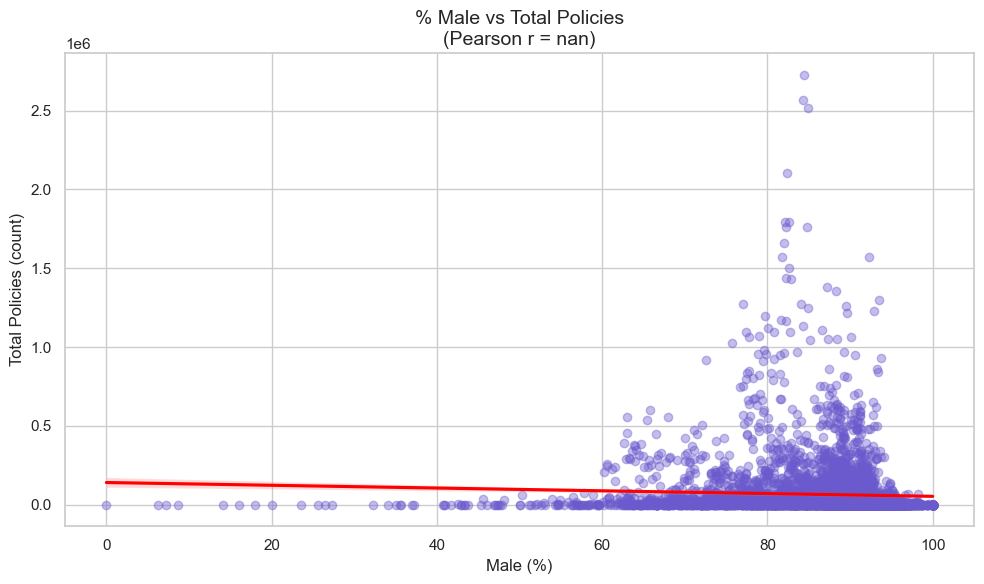

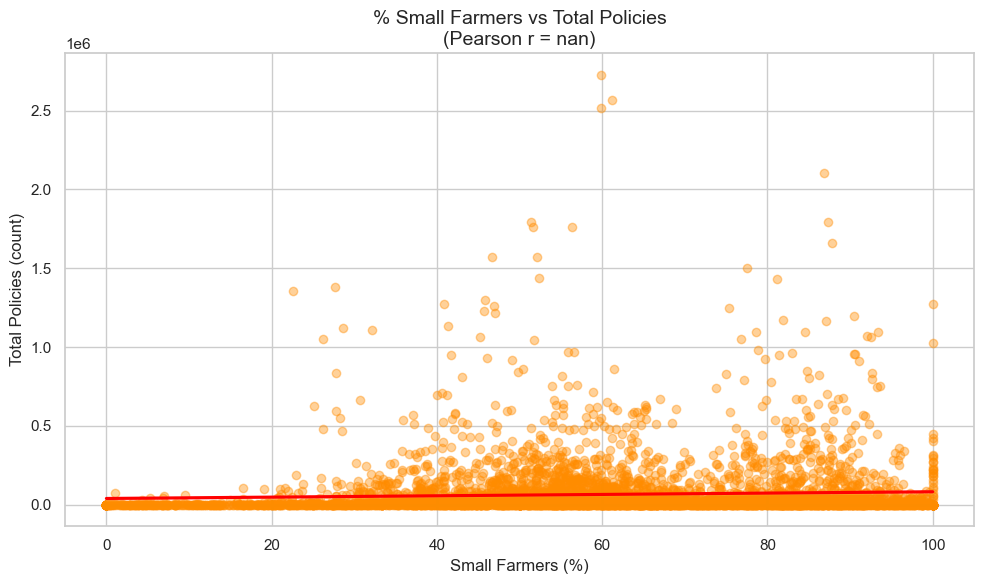

In [22]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import pearsonr
import warnings
warnings.filterwarnings("ignore")

# Load cleaned data
df = pd.read_csv("cleaned_crop_insurance1.csv")

# ==== Plot: % Male vs Total Policies ====
plt.figure(figsize=(10, 6))
sns.regplot(
    data=df,
    x='male',
    y='total_policies',
    scatter_kws={'alpha': 0.4, 'color': 'slateblue'},
    line_kws={'color': 'red'}
)
r_male, _ = pearsonr(df['male'], df['total_policies'])

plt.title(f"% Male vs Total Policies\n(Pearson r = {r_male:.2f})", fontsize=14)
plt.xlabel("Male (%)", fontsize=12)
plt.ylabel("Total Policies (count)", fontsize=12)
plt.tight_layout()
plt.savefig("bivar_male_vs_policies.png")
plt.show()

# ==== Plot: % Small Farmers vs Total Policies ====
plt.figure(figsize=(10, 6))
sns.regplot(
    data=df,
    x='small',
    y='total_policies',
    scatter_kws={'alpha': 0.4, 'color': 'darkorange'},
    line_kws={'color': 'red'}
)
r_small, _ = pearsonr(df['small'], df['total_policies'])

plt.title(f"% Small Farmers vs Total Policies\n(Pearson r = {r_small:.2f})", fontsize=14)
plt.xlabel("Small Farmers (%)", fontsize=12)
plt.ylabel("Total Policies (count)", fontsize=12)
plt.tight_layout()
plt.savefig("bivar_smallfarmers_vs_policies.png")
plt.show()


Interpretation of Findings
Both plots confirm the earlier finding from the correlation matrix: there is no meaningful linear relationship between the demographic composition of a district and the total number of insurance policies.

% Male vs Total Policies
- This scatter plot shows that the vast majority of data points are clustered in the 60% to 100% male range, but the total number of policies in these cases varies dramatically from near zero to over 2.5 million. The nearly horizontal regression line visually confirms a lack of correlation. This indicates that a high percentage of male farmers is not a predictor of high policy uptake.

% Small Farmers vs Total Policies
- Similarly, this plot shows no clear pattern. Districts with a very high percentage of small farmers (80-100%) can have either a very low or a very high number of total policies. The regression line is almost flat, indicating that the share of small farmers in a district does not drive the overall volume of scheme participation.

Note on "Pearson r = nan": The "nan" (Not a Number) value for the correlation coefficient indicates a computational issue, likely due to missing values in the underlying data used for the calculation. However, the visual evidence from the nearly flat regression lines in both plots strongly supports the conclusion of a negligible linear relationship.

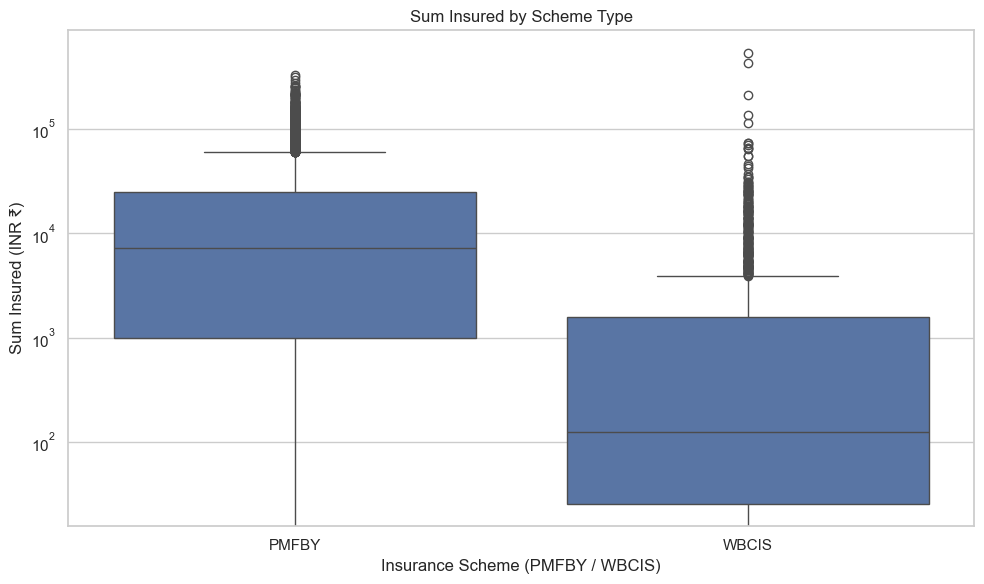

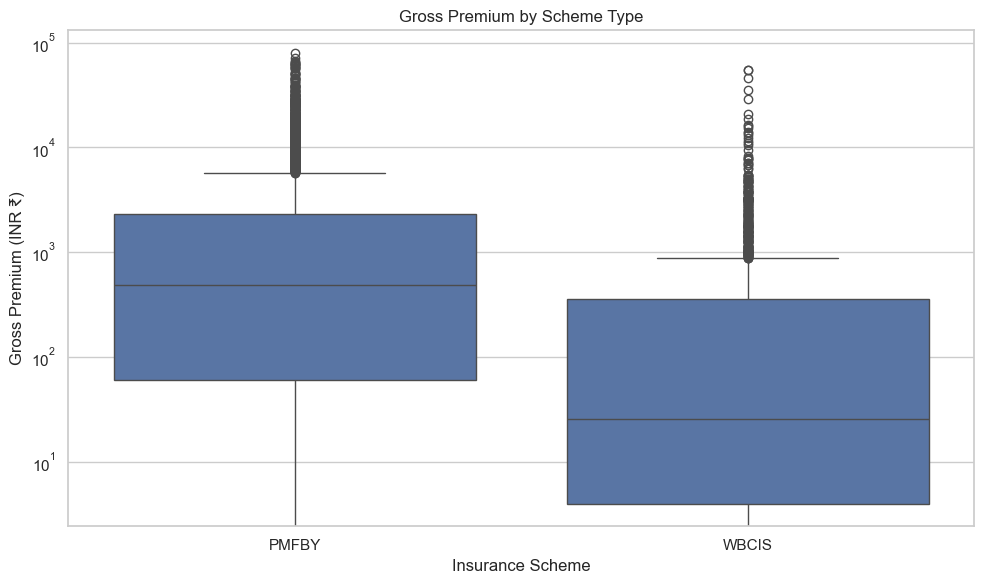

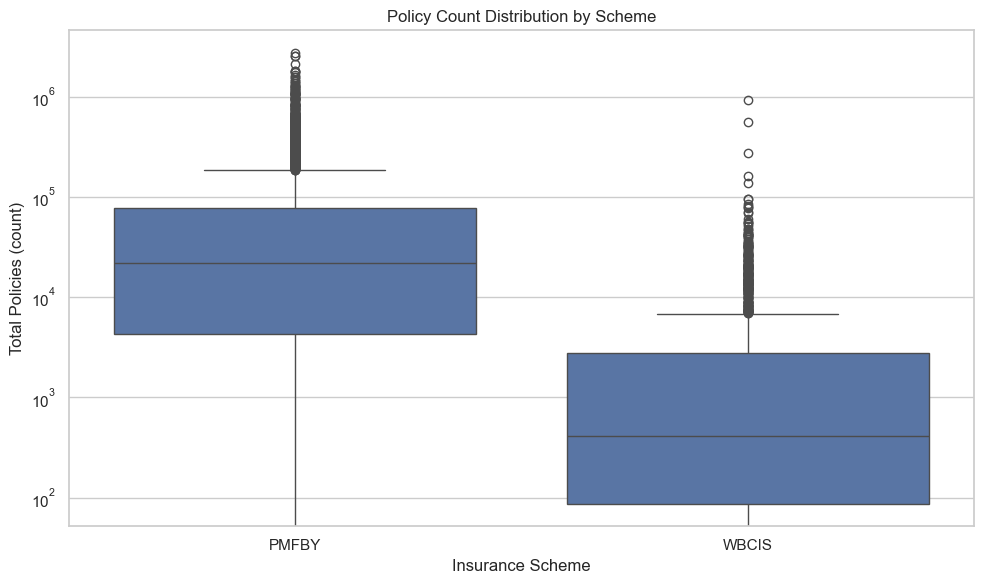

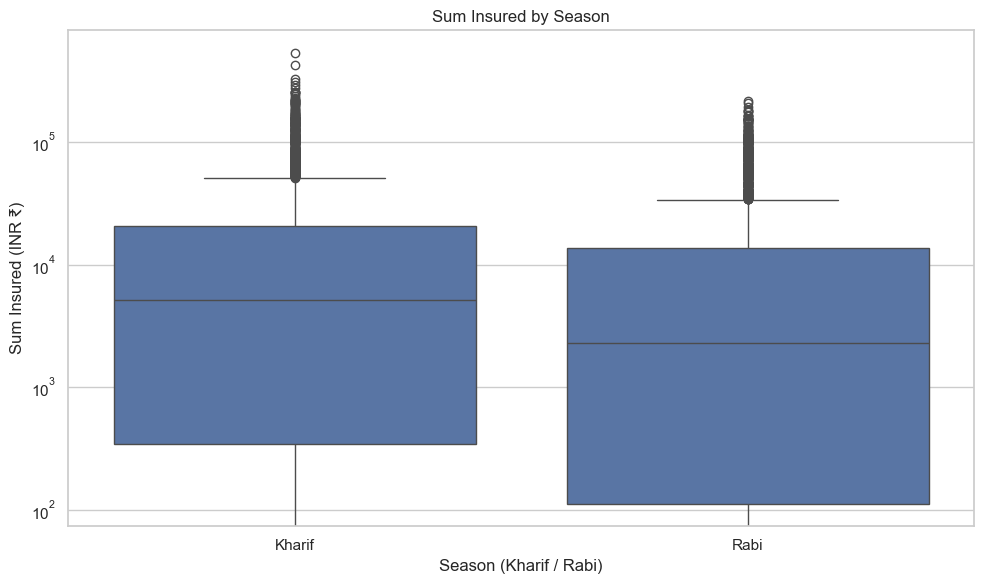

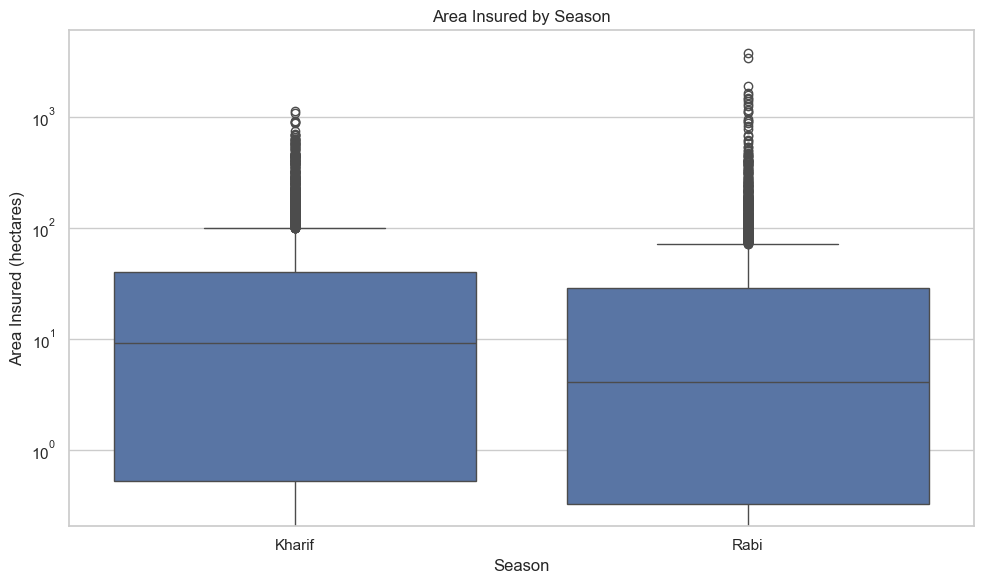

In [23]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

# Load cleaned dataset
df = pd.read_csv("cleaned_crop_insurance1.csv")
sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (10, 6)

# ==== SCHEME vs SUM INSURED ====
plt.figure()
sns.boxplot(data=df, x='scheme', y='sum_insured')
plt.title("Sum Insured by Scheme Type")
plt.xlabel("Insurance Scheme (PMFBY / WBCIS)")
plt.ylabel("Sum Insured (INR ₹)")
plt.yscale('log')  # log scale to handle outliers
plt.tight_layout()
plt.savefig("bivar_scheme_vs_suminsured.png")
plt.show()

# ==== SCHEME vs GROSS PREMIUM ====
plt.figure()
sns.boxplot(data=df, x='scheme', y='gross_premium')
plt.title("Gross Premium by Scheme Type")
plt.xlabel("Insurance Scheme")
plt.ylabel("Gross Premium (INR ₹)")
plt.yscale('log')
plt.tight_layout()
plt.savefig("bivar_scheme_vs_premium.png")
plt.show()

# ==== SCHEME vs TOTAL POLICIES ====
plt.figure()
sns.boxplot(data=df, x='scheme', y='total_policies')
plt.title("Policy Count Distribution by Scheme")
plt.xlabel("Insurance Scheme")
plt.ylabel("Total Policies (count)")
plt.yscale('log')
plt.tight_layout()
plt.savefig("bivar_scheme_vs_policies.png")
plt.show()

# ==== SEASON vs SUM INSURED ====
plt.figure()
sns.boxplot(data=df, x='season', y='sum_insured')
plt.title("Sum Insured by Season")
plt.xlabel("Season (Kharif / Rabi)")
plt.ylabel("Sum Insured (INR ₹)")
plt.yscale('log')
plt.tight_layout()
plt.savefig("bivar_season_vs_suminsured.png")
plt.show()

# ==== SEASON vs AREA INSURED ====
plt.figure()
sns.boxplot(data=df, x='season', y='area_insured')
plt.title("Area Insured by Season")
plt.xlabel("Season")
plt.ylabel("Area Insured (hectares)")
plt.yscale('log')
plt.tight_layout()
plt.savefig("bivar_season_vs_area.png")
plt.show()


Scheme Comparison: PMFBY vs. WBCIS
The analysis shows that on a per-record basis (i.e., for a typical district-season entry), PMFBY operates at a significantly larger financial scale and volume than WBCIS.

- Higher Value and Volume: The median Sum Insured, Total Policies , and 

- Gross Premium  are all substantially higher for PMFBY compared to WBCIS. The entire distribution (the box) for PMFBY is shifted upwards in all three plots.


- Outliers: Both schemes have a large number of high-value outliers, but they are more frequent and extend to higher values in the PMFBY scheme.

- Conclusion: The typical district-level implementation of PMFBY is larger in both scale and financial value than the typical implementation of WBCIS.

Seasonal Comparison: Kharif vs. Rabi
The plots confirm that the Kharif season is the dominant period for agricultural insurance in India.


- Higher Coverage: The median Sum Insured and median Area Insured are both visibly higher during the Kharif (monsoon) season compared to the Rabi (winter) season.


- Greater Spread: The distribution of values (the interquartile range shown by the box) is also wider and shifted higher for the Kharif season, indicating that insurance activities are generally larger in scale during this period.

- Conclusion: The Kharif season represents the peak of insurance activity, with more value and larger areas being insured on average than during the Rabi season.

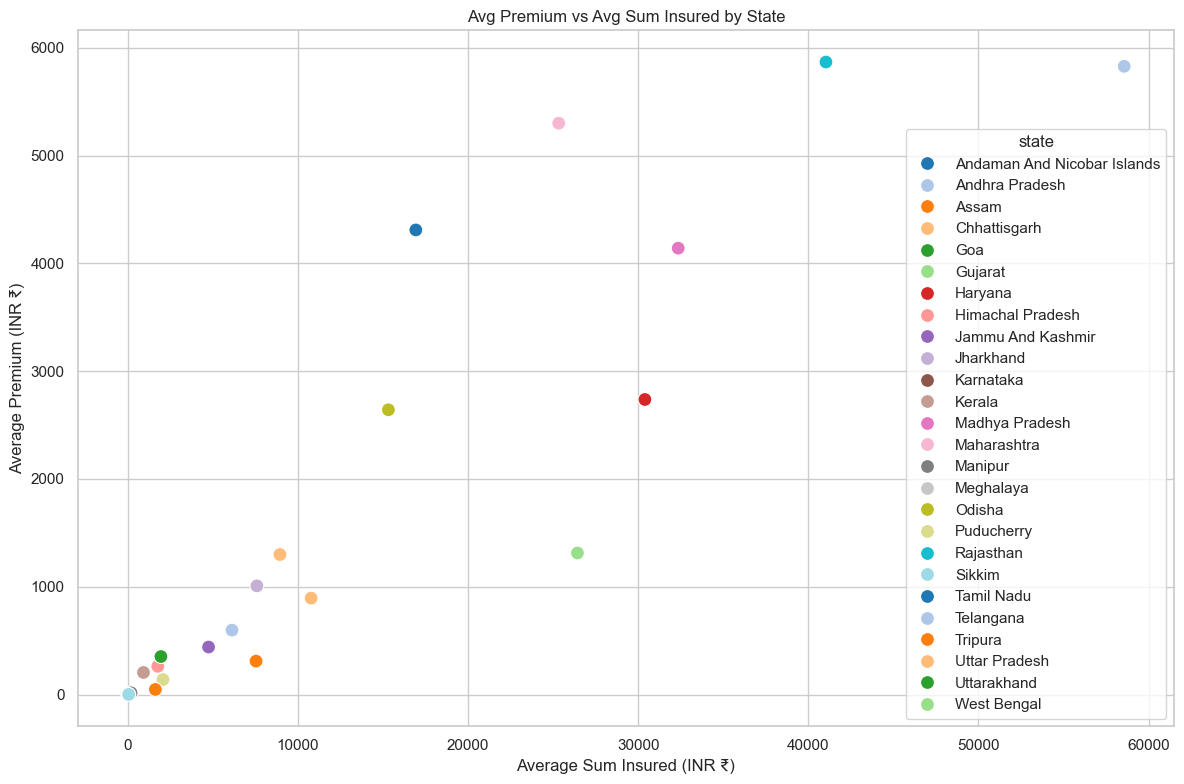

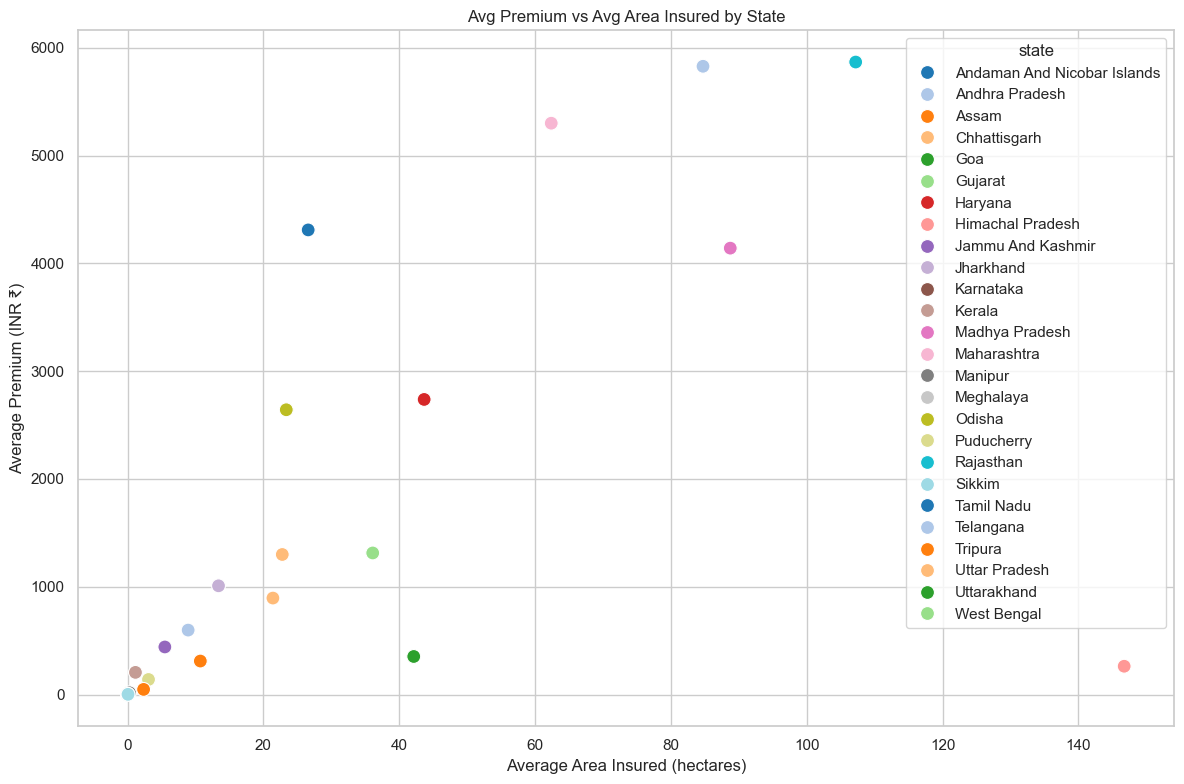

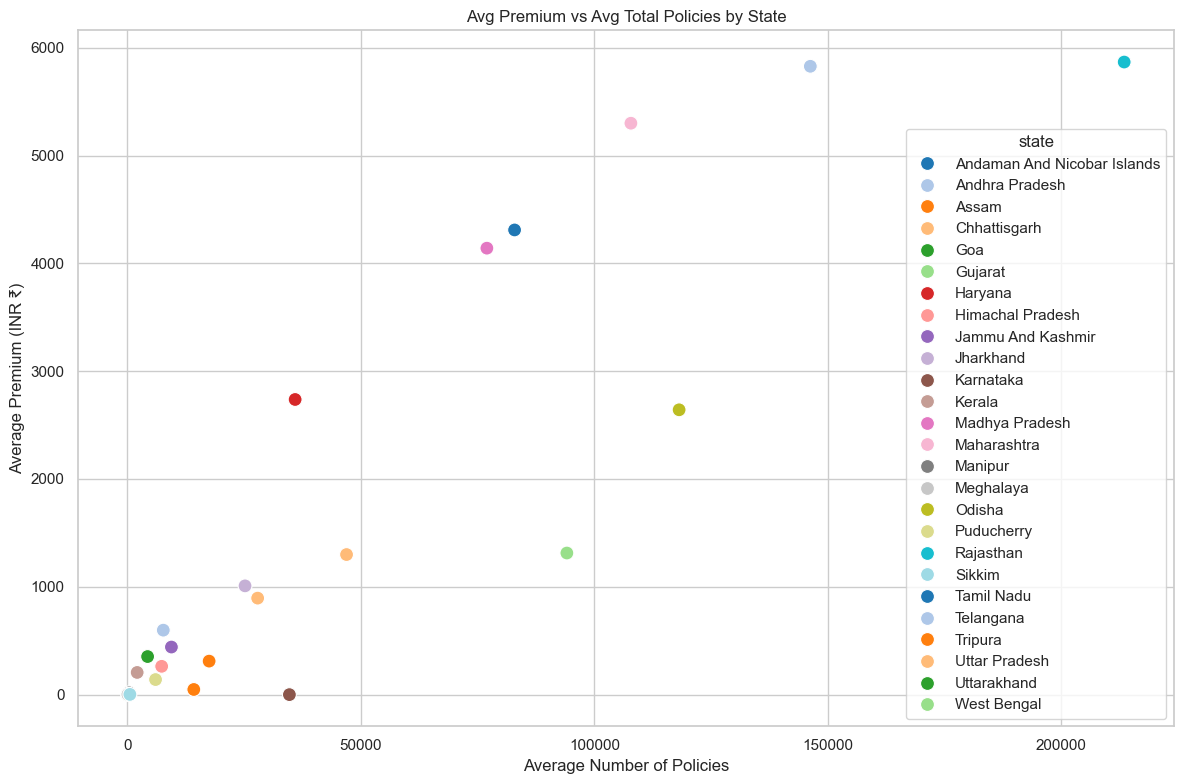

In [24]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

# Load dataset
df = pd.read_csv("cleaned_crop_insurance1.csv")
sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (12, 8)

# ==== Group by State Name ====
state_grouped = df.groupby("state_name").agg({
    "gross_premium": "mean",
    "sum_insured": "mean",
    "area_insured": "mean",
    "total_policies": "mean"
}).reset_index()

# Rename columns for clarity
state_grouped.columns = ["state", "avg_premium", "avg_sum_insured", "avg_area", "avg_policies"]

# ==== SCATTER: Avg Premium vs Avg Sum Insured ====
plt.figure()
sns.scatterplot(data=state_grouped, x='avg_sum_insured', y='avg_premium', hue='state', s=100, palette='tab20')
plt.title("Avg Premium vs Avg Sum Insured by State")
plt.xlabel("Average Sum Insured (INR ₹)")
plt.ylabel("Average Premium (INR ₹)")
plt.tight_layout()
plt.savefig("bivar_state_premium_vs_suminsured.png")
plt.show()

# ==== SCATTER: Avg Premium vs Avg Area Insured ====
plt.figure()
sns.scatterplot(data=state_grouped, x='avg_area', y='avg_premium', hue='state', s=100, palette='tab20')
plt.title("Avg Premium vs Avg Area Insured by State")
plt.xlabel("Average Area Insured (hectares)")
plt.ylabel("Average Premium (INR ₹)")
plt.tight_layout()
plt.savefig("bivar_state_premium_vs_area.png")
plt.show()

# ==== SCATTER: Avg Premium vs Avg Policies ====
plt.figure()
sns.scatterplot(data=state_grouped, x='avg_policies', y='avg_premium', hue='state', s=100, palette='tab20')
plt.title("Avg Premium vs Avg Total Policies by State")
plt.xlabel("Average Number of Policies")
plt.ylabel("Average Premium (INR ₹)")
plt.tight_layout()
plt.savefig("bivar_state_premium_vs_policies.png")
plt.show()


The plots show a general positive trend where states with higher average policies, area, or sum insured also have higher average premiums. However, the outliers from this trend are the most insightful, revealing different state strategies and risk profiles.

Maharashtra: The High-Cost State
- Across all three plots, Maharashtra (pink dot) is a consistent outlier, showing a very high average premium relative to its average number of policies, area insured, and sum insured. This suggests that insurance in Maharashtra is significantly more expensive on average, likely due to a focus on high-risk or high-value commercial crops that command higher premium rates.

Rajasthan: The High-Volume State
- Rajasthan (cyan dot) is the clear leader in scale, exhibiting the highest average number of policies by a large margin. While its average premium is also high, it is proportionally lower than Maharashtra's when compared to its very high average sum insured, indicating a lower average premium rate.

Himachal Pradesh: The Large-Area, Low-Cost State
- Himachal Pradesh (red dot) presents a unique profile, with by far the largest average area insured per record but a very low average premium. This suggests a focus on insuring large tracts of land with lower-value or lower-risk crops.

Andaman & Nicobar Islands: The High-Premium, Low-Scale State
- Andaman & Nicobar Islands (dark blue dot) has a disproportionately high average premium despite having a very low average number of policies and a small average insured area. This could indicate specialized, high-risk coverage in a very small market.

Most other states are clustered in the bottom-left corner of the plots, indicating lower average premiums, policy counts, and insured values on a per-record basis.

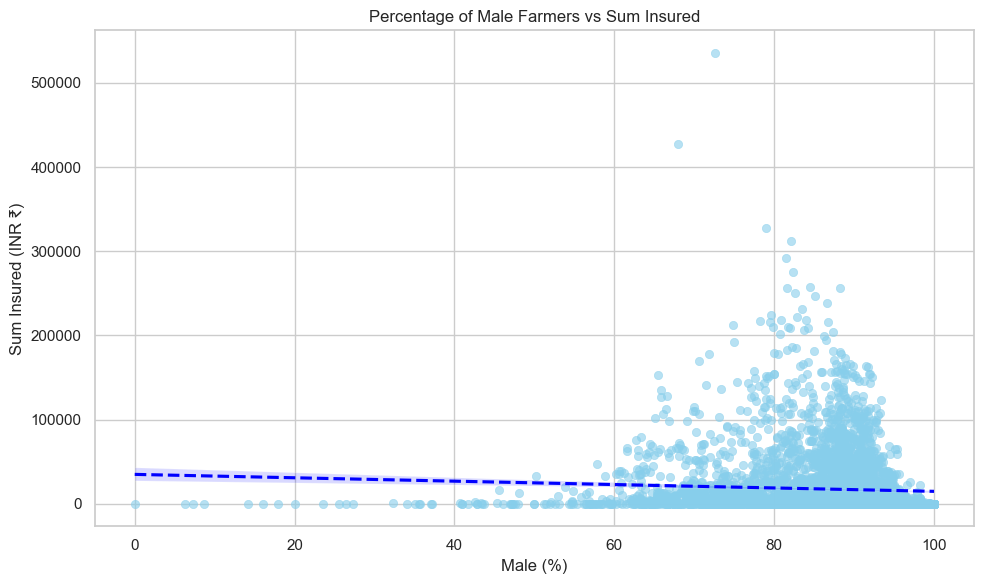

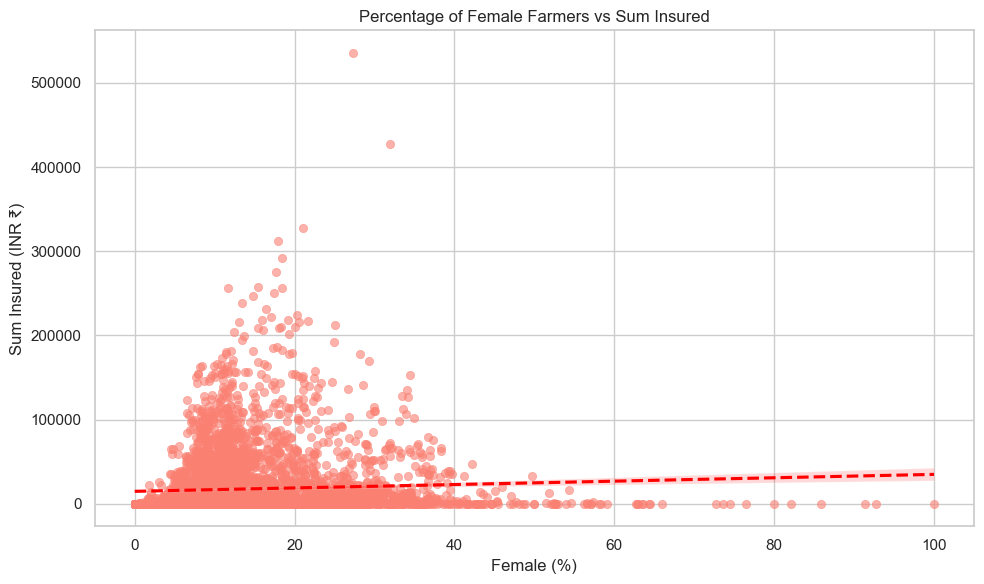

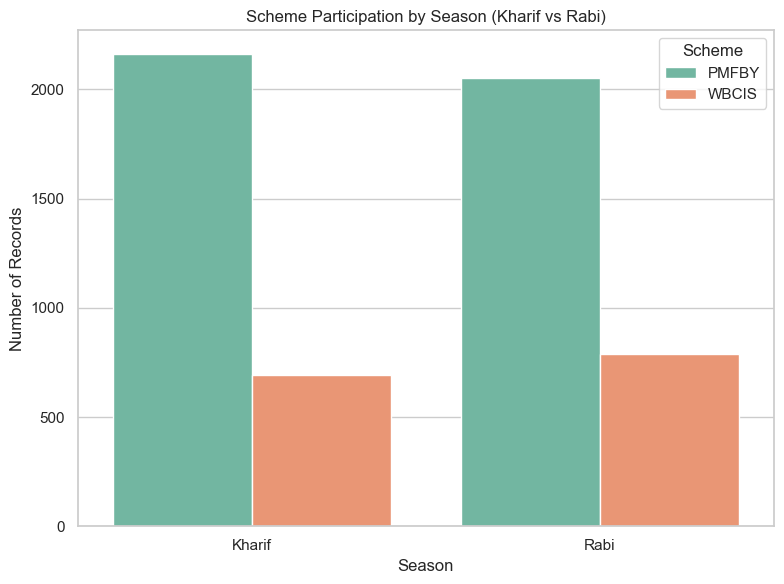

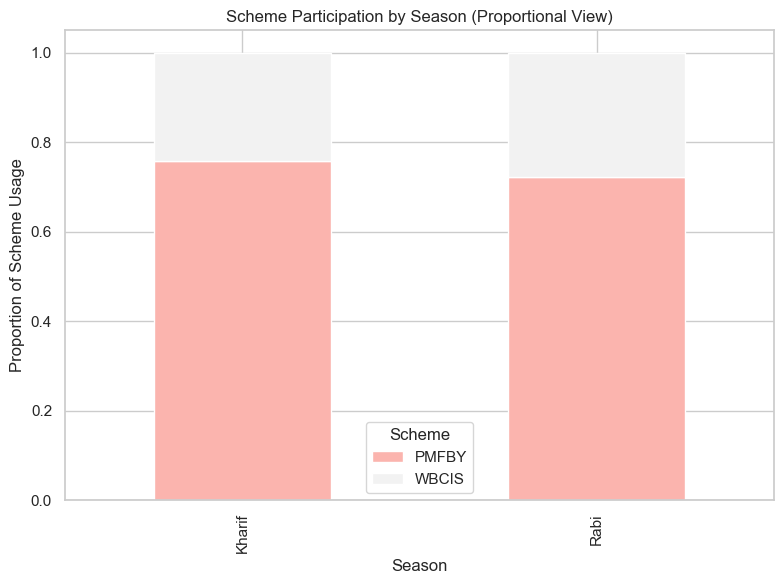

In [25]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

# Load dataset
df = pd.read_csv("cleaned_crop_insurance1.csv")

# ========== Gender % vs Sum Insured ==========
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='male', y='sum_insured', color='skyblue', alpha=0.6, edgecolor=None)
sns.regplot(data=df, x='male', y='sum_insured', scatter=False, color='blue', line_kws={"linestyle": "--"})
plt.title("Percentage of Male Farmers vs Sum Insured")
plt.xlabel("Male (%)")
plt.ylabel("Sum Insured (INR ₹)")
plt.tight_layout()
plt.savefig("biv_gender_male_vs_sum_insured.png")
plt.show()

# Repeat for Female
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='female', y='sum_insured', color='salmon', alpha=0.6, edgecolor=None)
sns.regplot(data=df, x='female', y='sum_insured', scatter=False, color='red', line_kws={"linestyle": "--"})
plt.title("Percentage of Female Farmers vs Sum Insured")
plt.xlabel("Female (%)")
plt.ylabel("Sum Insured (INR ₹)")
plt.tight_layout()
plt.savefig("biv_gender_female_vs_sum_insured.png")
plt.show()

# ========== Season vs Scheme Participation ==========
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x="season", hue="scheme", palette="Set2")
plt.title("Scheme Participation by Season (Kharif vs Rabi)")
plt.xlabel("Season")
plt.ylabel("Number of Records")
plt.legend(title="Scheme")
plt.tight_layout()
plt.savefig("biv_season_vs_scheme.png")
plt.show()

# Normalize for proportions
season_scheme = df.groupby(['season', 'scheme']).size().unstack().fillna(0)
season_scheme_pct = (season_scheme.T / season_scheme.T.sum()).T  # row-wise normalization

# Plot
season_scheme_pct.plot(kind='bar', stacked=True, colormap='Pastel1', figsize=(8, 6))
plt.title("Scheme Participation by Season (Proportional View)")
plt.ylabel("Proportion of Scheme Usage")
plt.xlabel("Season")
plt.legend(title="Scheme")
plt.tight_layout()
plt.savefig("biv_season_vs_scheme_stacked.png")
plt.show()


Gender Composition vs. Sum Insured
The scatter plots for both male and female farmers confirm that there is no meaningful linear relationship between the gender composition of farmers and the total sum insured for a given district-season.

- In both the "Percentage of Female Farmers vs Sum Insured" and "Percentage of Male Farmers vs Sum Insured" plots, the data points form a large, unstructured cloud.

- The regression lines in both graphs are nearly horizontal, indicating a negligible correlation.

This reinforces the earlier finding that the demographic profile of a district does not appear to drive the financial scale of the insurance schemes.

Scheme Participation by Season
This analysis reveals the dominance of the PMFBY scheme and a subtle difference in the proportional use of the WBCIS scheme across seasons.


- Overall Dominance: The count-based bar chart clearly shows that the PMFBY scheme has a far greater number of records than the WBCIS scheme in both the Kharif and Rabi seasons.


- Proportional Difference: The proportional view shows that while PMFBY is dominant in both seasons, the WBCIS scheme constitutes a slightly larger proportion of the total records during the Rabi season (around 28%) compared to the Kharif season (around 25%).

## Multivariate Analysis

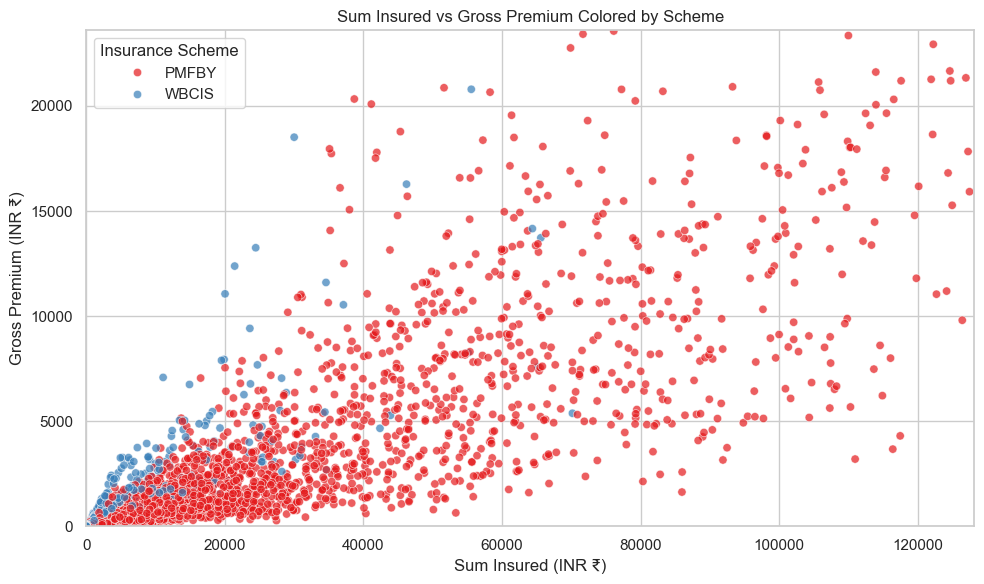

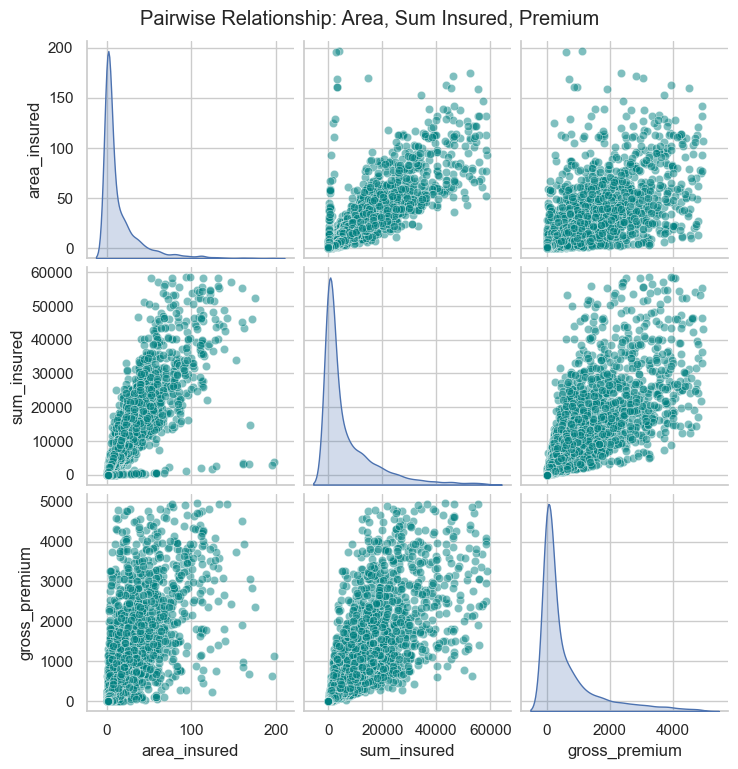

In [26]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

# Load cleaned data
df = pd.read_csv("cleaned_crop_insurance1.csv")

# Scatterplot with hue = scheme
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x="sum_insured", y="gross_premium", hue="scheme", alpha=0.7, palette="Set1")
plt.title("Sum Insured vs Gross Premium Colored by Scheme")
plt.xlabel("Sum Insured (INR ₹)")
plt.ylabel("Gross Premium (INR ₹)")
plt.xlim(0, df['sum_insured'].quantile(0.98))
plt.ylim(0, df['gross_premium'].quantile(0.98))
plt.legend(title="Insurance Scheme")
plt.tight_layout()
plt.savefig("mv_sum_vs_premium_by_scheme.png")
plt.show()

# Create sub DataFrame for selected metrics
tri_df = df[["area_insured", "sum_insured", "gross_premium"]].copy()

# Filter out extreme outliers (95th percentile)
for col in tri_df.columns:
    tri_df = tri_df[tri_df[col] <= tri_df[col].quantile(0.95)]

# Pairplot for 3-way interaction
sns.pairplot(tri_df, diag_kind="kde", plot_kws={"alpha": 0.5, "color": "teal"})
plt.suptitle("Pairwise Relationship: Area, Sum Insured, Premium", y=1.02)
plt.savefig("mv_pairplot_area_sum_premium.png")
plt.show()


In [27]:
import plotly.express as px

# Trim for visibility
tri_df = df[["area_insured", "sum_insured", "gross_premium"]].copy()
tri_df = tri_df[(tri_df["sum_insured"] < df["sum_insured"].quantile(0.95)) &
                (tri_df["gross_premium"] < df["gross_premium"].quantile(0.95)) &
                (tri_df["area_insured"] < df["area_insured"].quantile(0.95))]

fig = px.scatter_3d(
    tri_df,
    x="area_insured",
    y="sum_insured",
    z="gross_premium",
    color="gross_premium",
    title="3D View: Area vs Sum Insured vs Gross Premium",
    opacity=0.6
)
fig.show()



Sum Insured vs. Gross Premium by Scheme
This scatter plot provides a clear visual comparison of the two insurance schemes' financial footprints.


- Scale of Operation: The PMFBY points (red) dominate the plot, spanning the entire range from low to very high values of sum insured and premium.


- Niche Role of WBCIS: The WBCIS points (blue) are concentrated almost exclusively in the lower-left corner, indicating that this scheme is primarily used for lower-value insurance coverage.


- Similar Pricing Structure: Both schemes appear to follow the same general positive trend line, suggesting they share a similar pricing logic where the premium is a direct function of the sum insured.

Pairwise Relationships: Area, Sum Insured, and Premium
The pair plot offers a compact summary of the interactions between the core metrics.


- Skewed Distributions: The plots on the diagonal confirm that all three variables—area_insured, sum_insured, and gross_premium—are heavily right-skewed, with most entries having low values and a long tail of high-value outliers.


- Strongest Relationship: The tightest and most linear relationship is between sum_insured and gross_premium, reinforcing that premium is closely tied to the insured value.


- Weaker Relationship with Area: The relationships involving area_insured are much more scattered. This indicates that while insuring more land generally leads to a higher sum insured and premium, the physical area is a less reliable predictor than the financial value of the crop.

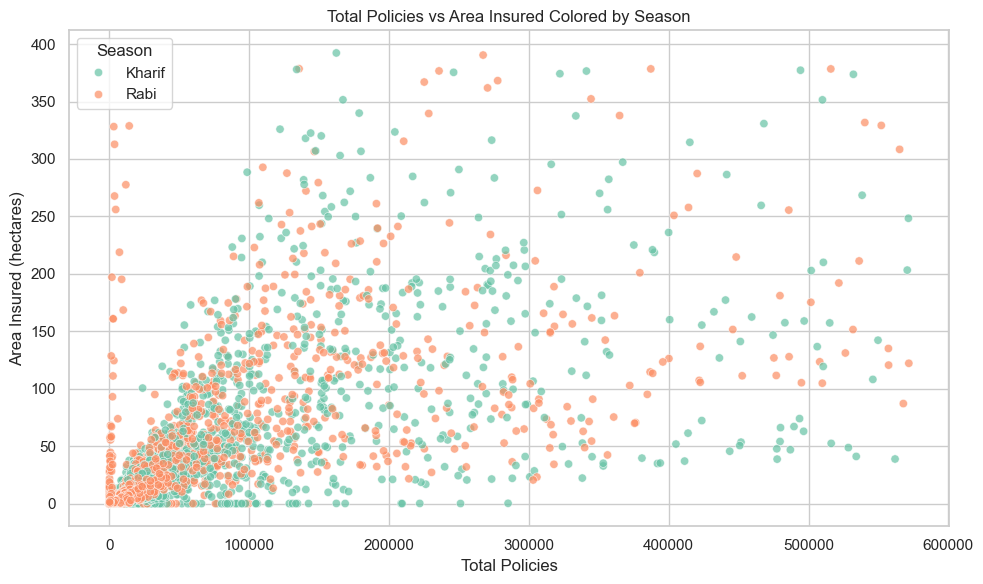

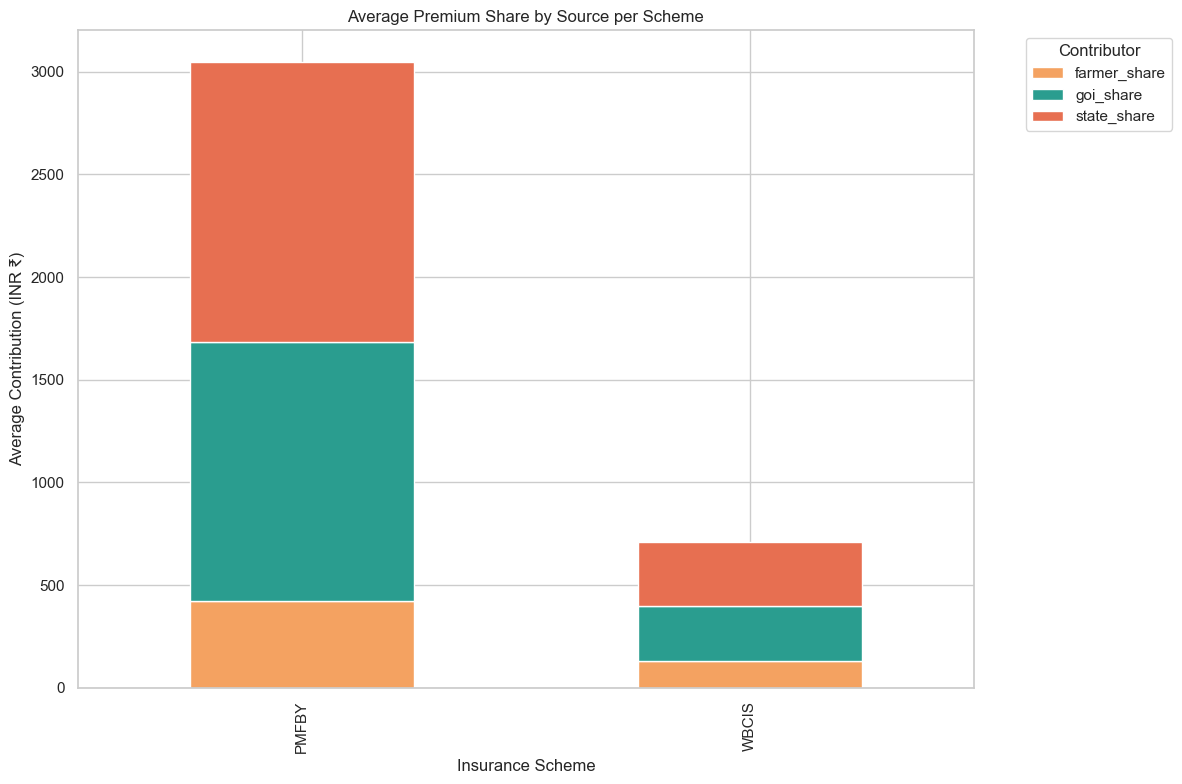

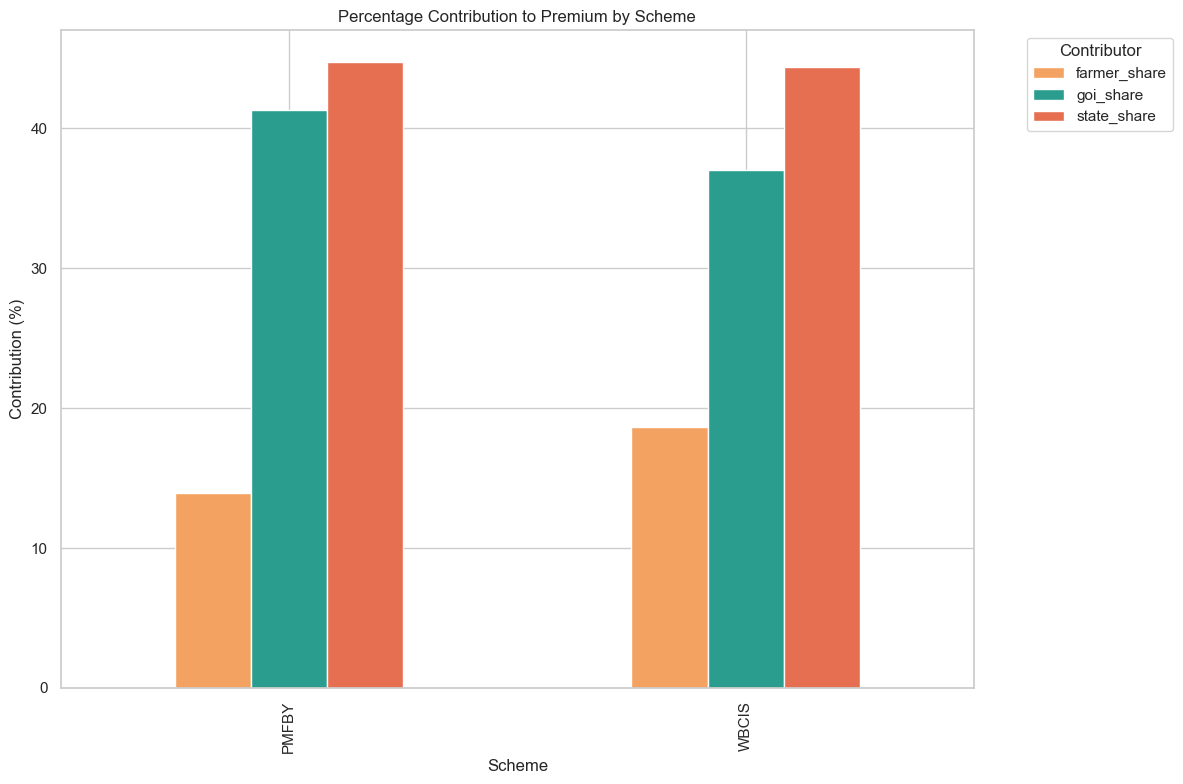

In [28]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

# Load dataset
df = pd.read_csv("cleaned_crop_insurance1.csv")

# Filter extreme outliers (optional for clarity)
filtered_df = df[(df["total_policies"] <= df["total_policies"].quantile(0.98)) &
                 (df["area_insured"] <= df["area_insured"].quantile(0.98))]

# Scatterplot colored by season
plt.figure(figsize=(10, 6))
sns.scatterplot(data=filtered_df, x="total_policies", y="area_insured", hue="season", palette="Set2", alpha=0.7)
plt.title("Total Policies vs Area Insured Colored by Season")
plt.xlabel("Total Policies")
plt.ylabel("Area Insured (hectares)")
plt.legend(title="Season")
plt.tight_layout()
plt.savefig("mv_policies_vs_area_by_season.png")
plt.show()

# Group by scheme and calculate mean contributions
share_df = df.groupby("scheme")[["farmer_share", "goi_share", "state_share"]].mean()

# Plot stacked bar
share_df.plot(kind="bar", stacked=True, color=["#f4a261", "#2a9d8f", "#e76f51"])
plt.title("Average Premium Share by Source per Scheme")
plt.xlabel("Insurance Scheme")
plt.ylabel("Average Contribution (INR ₹)")
plt.legend(title="Contributor", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.savefig("mv_stacked_share_by_scheme.png")
plt.show()


# Normalize to percentage share
share_pct = share_df.div(share_df.sum(axis=1), axis=0) * 100

# Plot grouped bar
share_pct.plot(kind="bar", color=["#f4a261", "#2a9d8f", "#e76f51"])
plt.title("Percentage Contribution to Premium by Scheme")
plt.ylabel("Contribution (%)")
plt.xlabel("Scheme")
plt.legend(title="Contributor", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.savefig("mv_grouped_share_percentage_by_scheme.png")
plt.show()


Total Policies vs. Area Insured by Season
The scatter plot shows that the relationship between the total number of policies and the area insured is 

- consistent across both the Kharif and Rabi seasons. The data points for both seasons are intermingled, and there is no distinct pattern or clustering for either one. This confirms that the weak, variable connection between policy count and insured area is a fundamental characteristic of the schemes, regardless of the season.

Premium Contribution by Scheme
The bar charts reveal the subsidy structure of the two schemes and the financial burden on each contributor.


- Higher Absolute Premiums in PMFBY: On average, the total premium per record is substantially higher under the PMFBY scheme compared to the WBCIS scheme.

- Heavy Government Subsidy: Both schemes are heavily subsidized. For both PMFBY and WBCIS, the 

- state government (state_share) is the single largest contributor to the premium, followed closely by the central government (goi_share). Farmers consistently contribute the smallest portion.


Proportional Farmer Burden: While the absolute premium is lower for WBCIS, the farmer's share is proportionally higher under WBCIS (around 19%) compared to PMFBY (around 14%). This indicates that farmers bear a relatively larger percentage of the premium cost under the WBCIS scheme.

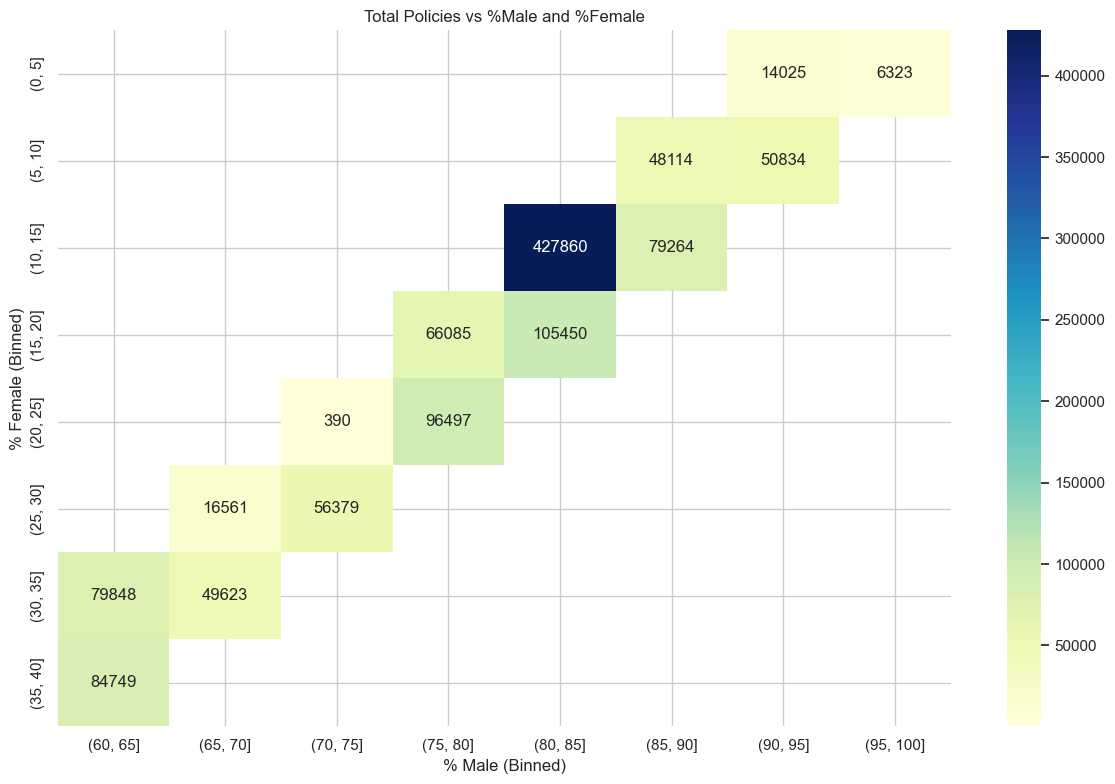

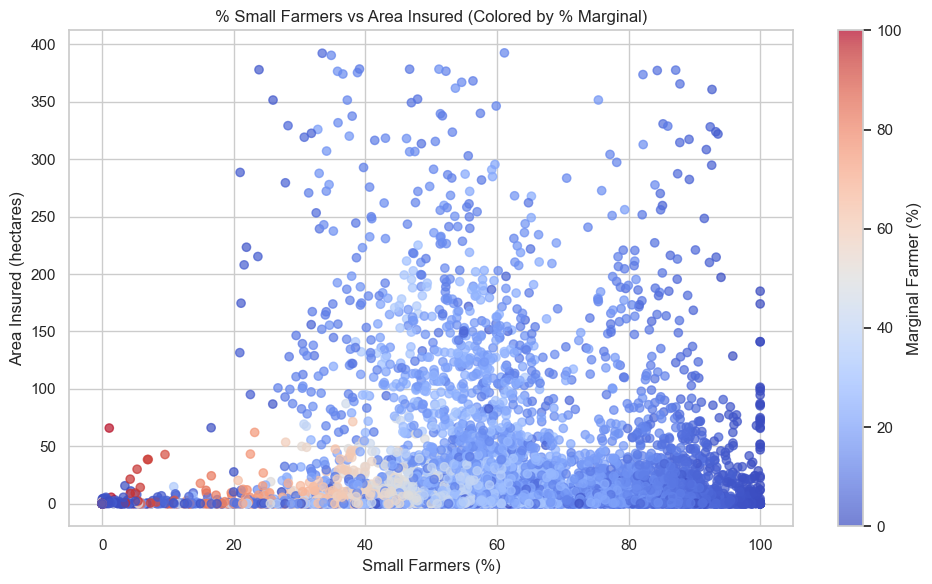

In [30]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
warnings.filterwarnings("ignore")

# Load dataset
df = pd.read_csv("cleaned_crop_insurance1.csv")

# Bin gender percentages into ranges (e.g., 60-65%, 65-70%)
df["male_bin"] = pd.cut(df["male"], bins=np.arange(60, 101, 5))
df["female_bin"] = pd.cut(df["female"], bins=np.arange(0, 41, 5))

# Create pivot table: average total_policies for each male-female bin
pivot = df.pivot_table(index="female_bin", columns="male_bin", values="total_policies", aggfunc="mean")

# Plot heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(pivot, cmap="YlGnBu", annot=True, fmt=".0f")
plt.title("Total Policies vs %Male and %Female")
plt.xlabel("% Male (Binned)")
plt.ylabel("% Female (Binned)")
plt.tight_layout()
plt.savefig("mv_gender_vs_policies_heatmap.png")
plt.show()

# Filter for reasonable area_insured to avoid extreme outliers
filtered_df = df[df["area_insured"] <= df["area_insured"].quantile(0.98)]

# Extract columns
x = filtered_df["small"]
y = filtered_df["area_insured"]
color = filtered_df["marginal"]

# Create scatter plot with colorbar
plt.figure(figsize=(10, 6))
scatter = plt.scatter(x, y, c=color, cmap="coolwarm", alpha=0.7)
cbar = plt.colorbar(scatter)
cbar.set_label("Marginal Farmer (%)")

plt.title("% Small Farmers vs Area Insured (Colored by % Marginal)")
plt.xlabel("Small Farmers (%)")
plt.ylabel("Area Insured (hectares)")
plt.grid(True)
plt.tight_layout()
plt.savefig("mv_small_vs_area_colored_by_marginal.png")
plt.show()


Policy Volume by Gender Composition
The heatmap clearly illustrates that the highest volume of insurance policies is concentrated in districts with a 

high male-to-female farmer ratio.

- The single darkest cell, representing the highest number of policies (427,860), corresponds to a demographic makeup of 80-85% male farmers and 10-15% female farmers.

- Neighboring cells with high male (75-95%) and low female (5-20%) participation also show significant policy counts. This visualization confirms that the bulk of the scheme's activity occurs in regions with a pronounced gender skew towards male farmers.

Land Coverage by Farmer Size
This scatter plot reveals two key insights into the relationship between farmer size and insured area:

- There is no clear correlation between the percentage of small farmers and the total area insured. For any given percentage of small farmers, the area insured varies widely, reinforcing the "vulnerable farmer paradox."

- The color gradient shows a strong inverse relationship between the share of marginal and small farmers. Data points with a high percentage of marginal farmers (red) are clustered on the left where the share of small farmers is low. Conversely, areas with a low percentage of marginal farmers (blue) are found where the share of small farmers is high. This visually confirms the compositional effect between these two farmer categories.

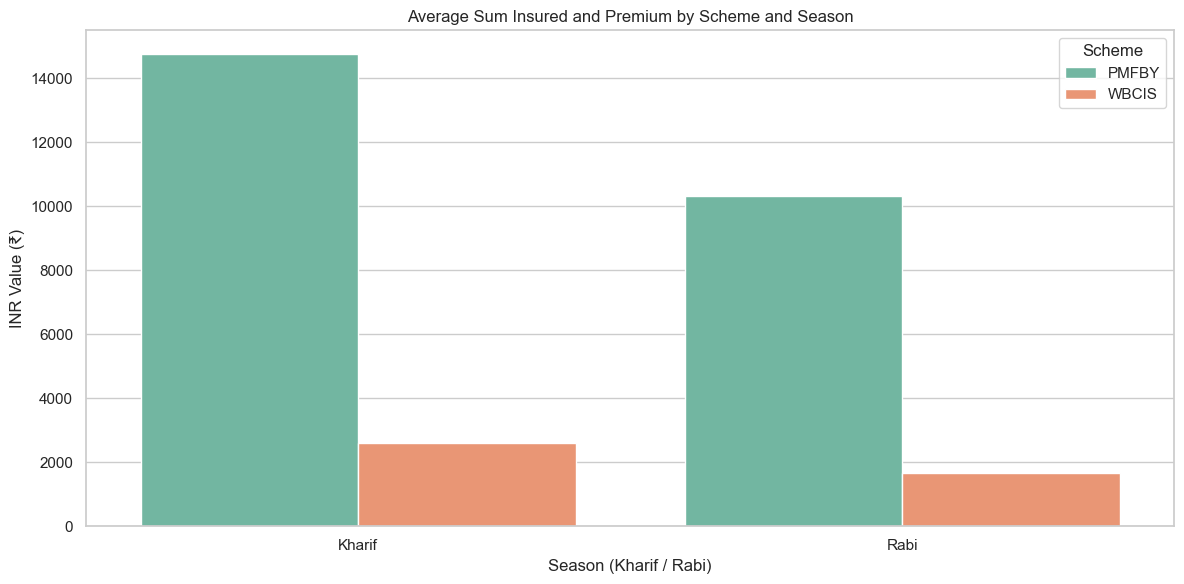

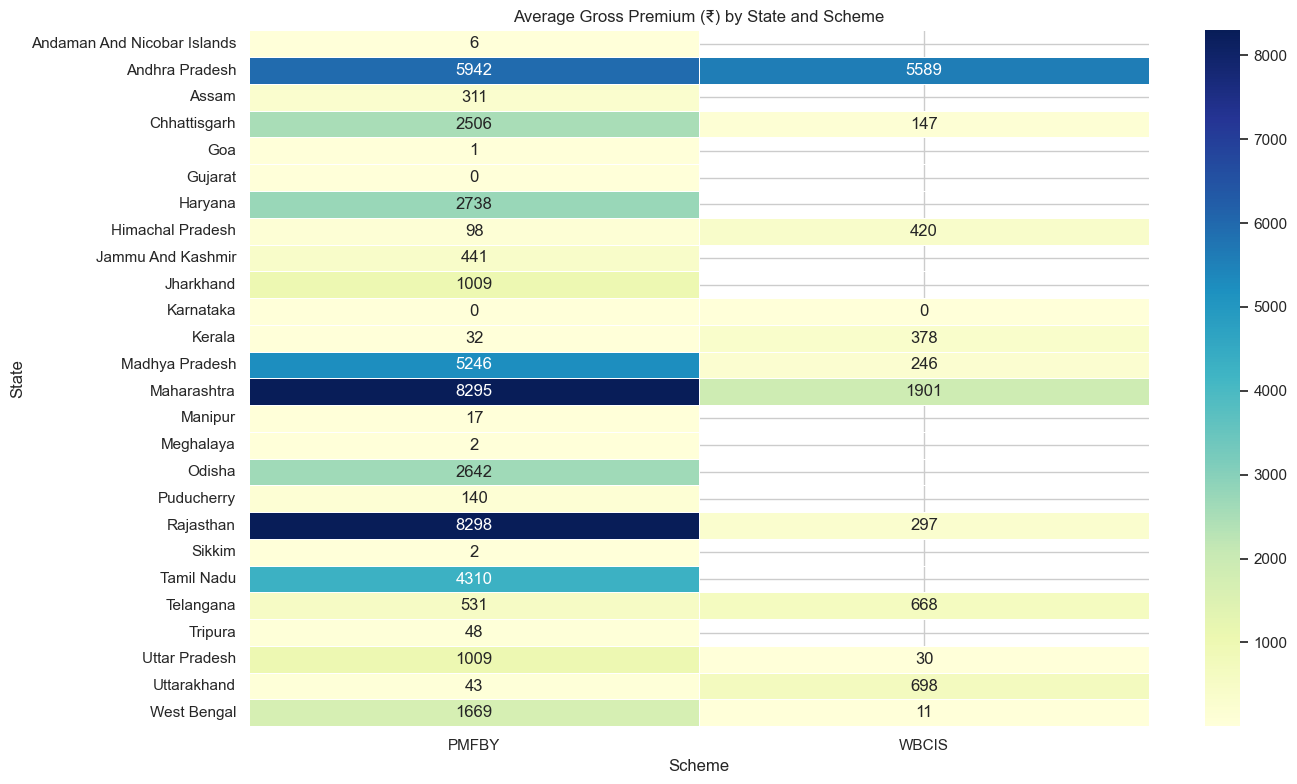

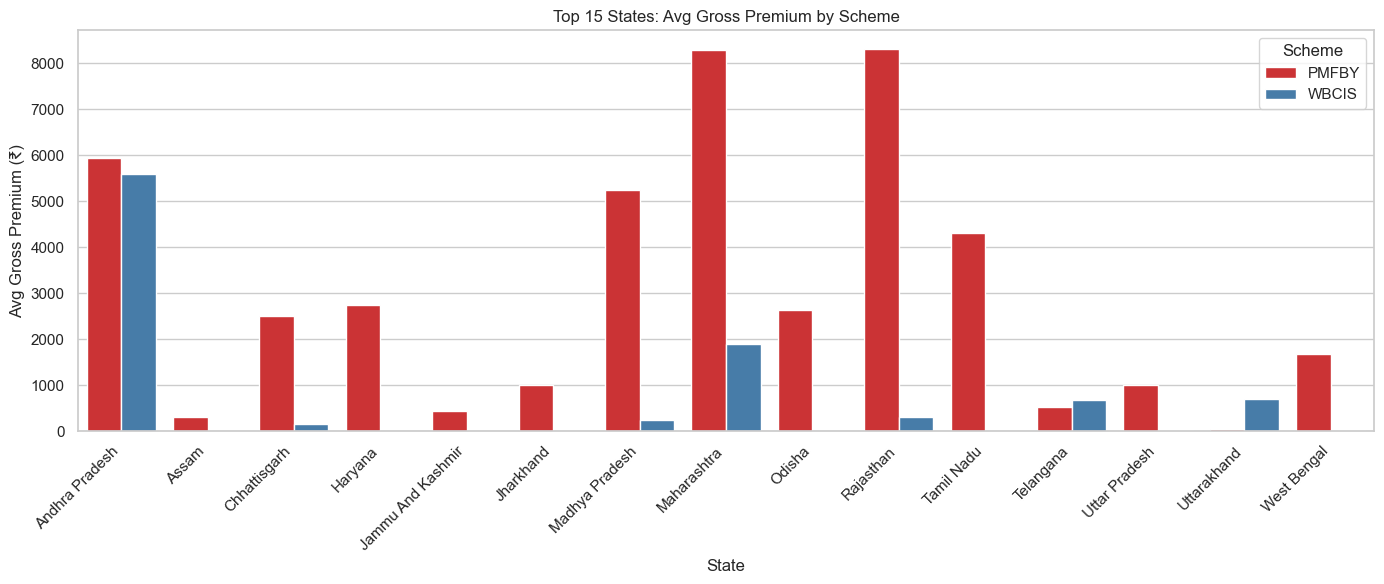

In [31]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load cleaned dataset
df = pd.read_csv("cleaned_crop_insurance1.csv")

# Group data by scheme and season
grouped = df.groupby(['scheme', 'season'])[['sum_insured', 'gross_premium']].mean().reset_index()

# Melt for seaborn barplot
melted = pd.melt(grouped, id_vars=['scheme', 'season'], value_vars=['sum_insured', 'gross_premium'],
                 var_name='Metric', value_name='INR Value')

# Plot grouped barplot
plt.figure(figsize=(12, 6))
sns.barplot(data=melted, x='season', y='INR Value', hue='scheme', palette='Set2', ci=None)
plt.title("Average Sum Insured and Premium by Scheme and Season")
plt.xlabel("Season (Kharif / Rabi)")
plt.ylabel("INR Value (₹)")
plt.legend(title="Scheme")
plt.tight_layout()
plt.savefig("mv_scheme_season_metric_comparison.png")
plt.show()

# Group data
state_scheme_avg = df.groupby(['state_name', 'scheme'])['gross_premium'].mean().unstack()

# Heatmap
plt.figure(figsize=(14, 8))
sns.heatmap(state_scheme_avg, annot=True, fmt=".0f", cmap="YlGnBu", linewidths=0.5)
plt.title("Average Gross Premium (₹) by State and Scheme")
plt.xlabel("Scheme")
plt.ylabel("State")
plt.tight_layout()
plt.savefig("mv_state_scheme_heatmap.png")
plt.show()

# Compute average premiums by state and scheme
avg_premium_by_state_scheme = df.groupby(['state_name', 'scheme'])['gross_premium'].mean().reset_index()

# Limit to top 15 premium states
top_states = df.groupby('state_name')['gross_premium'].mean().nlargest(15).index
filtered = avg_premium_by_state_scheme[avg_premium_by_state_scheme['state_name'].isin(top_states)]

# Grouped barplot
plt.figure(figsize=(14, 6))
sns.barplot(data=filtered, x='state_name', y='gross_premium', hue='scheme', palette='Set1')
plt.title("Top 15 States: Avg Gross Premium by Scheme")
plt.xlabel("State")
plt.ylabel("Avg Gross Premium (₹)")
plt.xticks(rotation=45, ha='right')
plt.legend(title="Scheme")
plt.tight_layout()
plt.savefig("mv_state_scheme_barplot.png")
plt.show()


Scheme Performance Across Seasons
The analysis shows a consistent pattern of scheme dominance and seasonal influence on the average insured value.


- PMFBY Dominance: The PMFBY scheme consistently handles a significantly higher average financial value per record than the WBCIS scheme in both the Kharif and Rabi seasons.


- Kharif as the Peak Season: For both schemes, the average insured value is visibly higher during the Kharif season compared to the Rabi season, confirming that the monsoon cropping cycle is the period of highest financial activity for insurance.

Regional Scheme Bias and Premium Concentration
The heatmap and bar chart reveal that high-premium insurance activity is concentrated in a few key states and is heavily biased towards the PMFBY scheme.

- High-Premium PMFBY States: A few states are clear leaders in driving high average premiums under the PMFBY scheme. These include 

Rajasthan (₹8,298), Maharashtra (₹8,295), Andhra Pradesh (₹5,942), Madhya Pradesh (₹5,246), and Tamil Nadu (₹4,310).

- WBCIS Outlier: The WBCIS scheme generally has much lower average premiums across most states. The single major exception is 

Andhra Pradesh, which has a very high average premium for WBCIS (₹5,589).


Scheme Bias: Most high-premium states show a strong bias towards PMFBY, with negligible average premiums for WBCIS. The unique case of Andhra Pradesh suggests a specific, high-value application of the WBCIS scheme within that state.

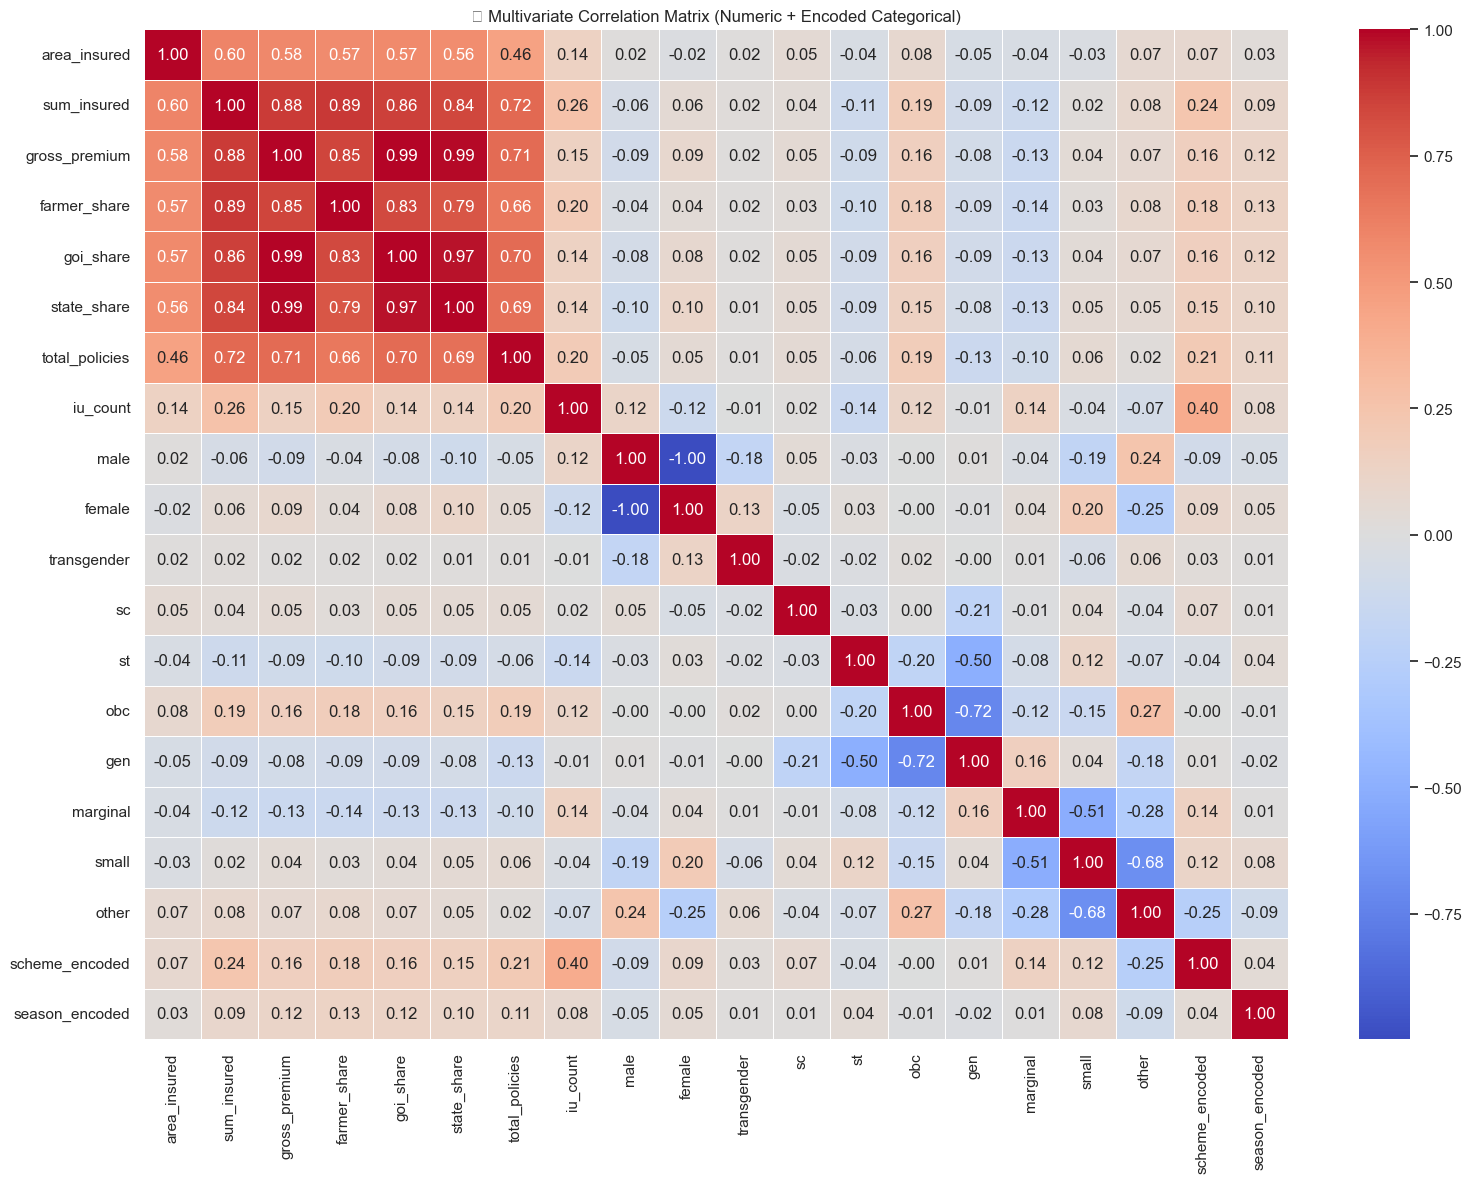

In [32]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load cleaned data
df = pd.read_csv("cleaned_crop_insurance1.csv")

# --- Step 1: Encode Categorical Variables ---
df['scheme_encoded'] = df['scheme'].map({'PMFBY': 1, 'WBCIS': 0})
df['season_encoded'] = df['season'].map({'Kharif': 1, 'Rabi': 0})

# --- Step 2: Select Variables for Correlation Matrix ---
correlation_cols = [
    'area_insured', 'sum_insured', 'gross_premium',
    'farmer_share', 'goi_share', 'state_share',
    'total_policies', 'iu_count',
    'male', 'female', 'transgender',
    'sc', 'st', 'obc', 'gen',
    'marginal', 'small', 'other',
    'scheme_encoded', 'season_encoded'
]

# --- Step 3: Compute Correlation Matrix ---
corr_matrix = df[correlation_cols].corr()

# --- Step 4: Plot Heatmap ---
plt.figure(figsize=(16, 12))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5, center=0)
plt.title("🔍 Multivariate Correlation Matrix (Numeric + Encoded Categorical)")
plt.tight_layout()
plt.savefig("mv_correlation_matrix_enhanced.png")
plt.show()


### PCA

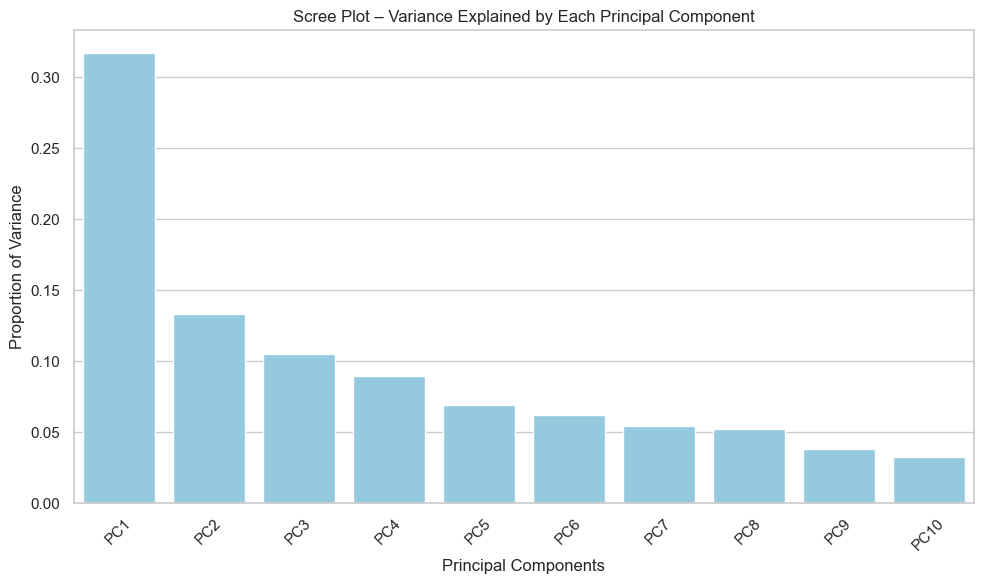

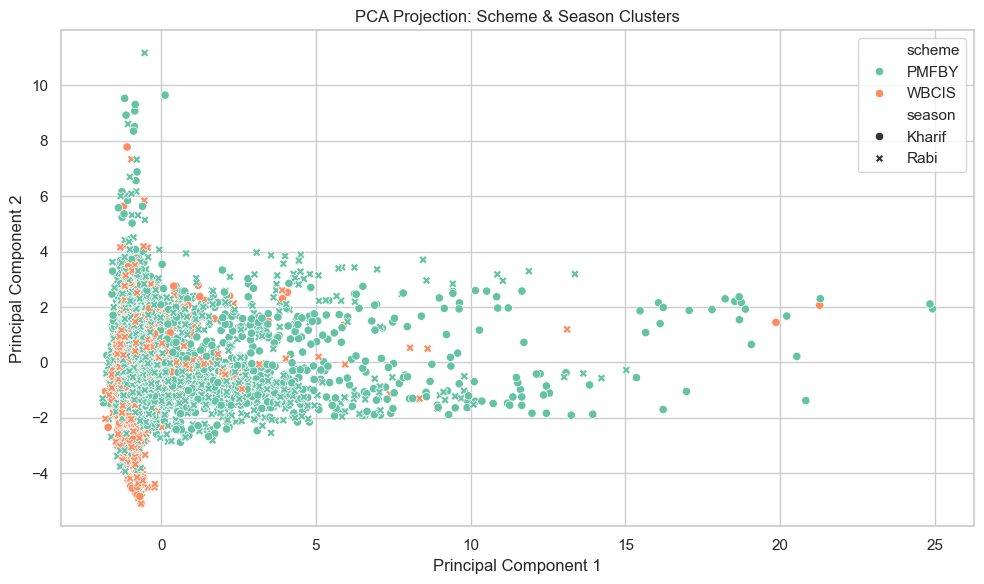


Top contributing features to PC1:
gross_premium     0.41
goi_share         0.40
state_share       0.39
sum_insured       0.39
farmer_share      0.38
total_policies    0.33
area_insured      0.28
obc               0.10
iu_count          0.09
marginal         -0.07
Name: PC1, dtype: float64

Top contributing features to PC2:
female          0.53
male           -0.53
other          -0.43
small           0.39
obc            -0.21
gen             0.15
iu_count       -0.10
transgender     0.08
st              0.06
area_insured   -0.04
Name: PC2, dtype: float64


In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Load cleaned dataset
df = pd.read_csv("cleaned_crop_insurance1.csv")

# Select relevant numerical features
features = [
    'area_insured', 'sum_insured', 'gross_premium',
    'farmer_share', 'goi_share', 'state_share',
    'male', 'female', 'transgender',
    'sc', 'st', 'obc', 'gen',
    'marginal', 'small', 'other',
    'iu_count', 'total_policies'
]

# Drop rows with missing values in selected features
df_pca = df[features].dropna()

# Step 1: Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df_pca)

# Step 2: Apply PCA
pca = PCA(n_components=0.95)  # retain 95% variance
X_pca = pca.fit_transform(X_scaled)

# Step 3: Scree Plot (Explained Variance)
plt.figure(figsize=(10, 6))
explained_variance = pca.explained_variance_ratio_
sns.barplot(x=[f"PC{i+1}" for i in range(len(explained_variance))], y=explained_variance, color="skyblue")
plt.title("Scree Plot – Variance Explained by Each Principal Component")
plt.ylabel("Proportion of Variance")
plt.xlabel("Principal Components")
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig("pca_scree_plot.png")
plt.show()

# Step 4: 2D PCA Scatter Plot (colored by scheme or season)
df_pca_vis = df.loc[df_pca.index].copy()  # match indices
df_pca_vis['PC1'] = X_pca[:, 0]
df_pca_vis['PC2'] = X_pca[:, 1]

plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_pca_vis, x='PC1', y='PC2', hue='scheme', style='season', palette='Set2')
plt.title("PCA Projection: Scheme & Season Clusters")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.legend()
plt.tight_layout()
plt.savefig("pca_2d_scatter.png")
plt.show()

# Step 5: Loadings – feature contribution to PC1 and PC2
loadings = pd.DataFrame(pca.components_.T, columns=[f"PC{i+1}" for i in range(len(pca.components_))], index=features)
top_features_pc1 = loadings["PC1"].sort_values(key=abs, ascending=False)
top_features_pc2 = loadings["PC2"].sort_values(key=abs, ascending=False)

print("\nTop contributing features to PC1:")
print(top_features_pc1.head(10))

print("\nTop contributing features to PC2:")
print(top_features_pc2.head(10))


#### National and Scheme-Level analysis
1. Did PMFBY adoption rise or fall post-2019?
2. Is WBCIS shrinking or growing?
3. Are farmers insuring more area per policy?
4. Was gross premium increasing despite lower adoption?
5. Which scheme has wider coverage?

--- Plot 1: National Insurance Trends by Metric ---


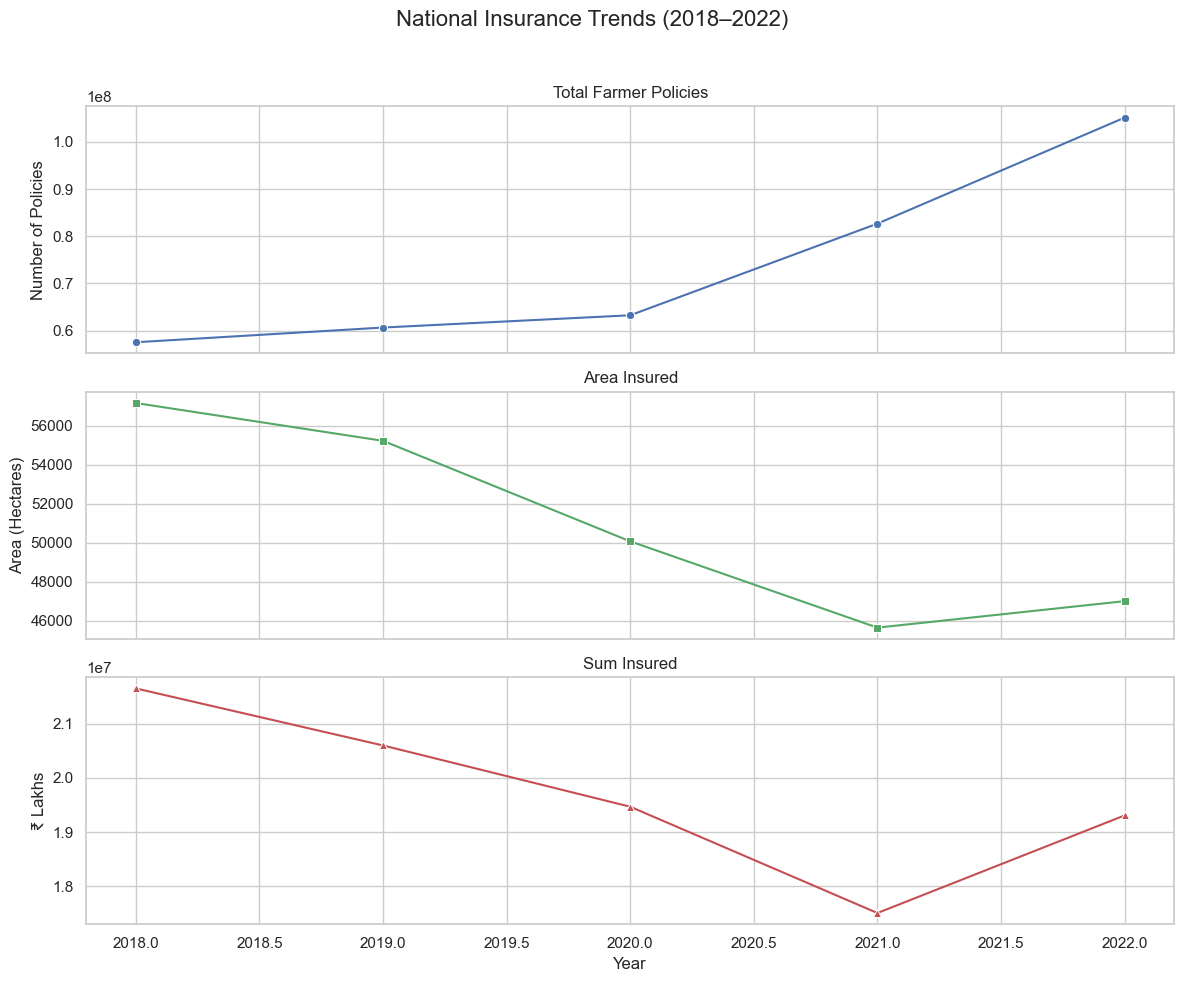


--- Plot 2: Scheme Uptake Comparison Over Time ---


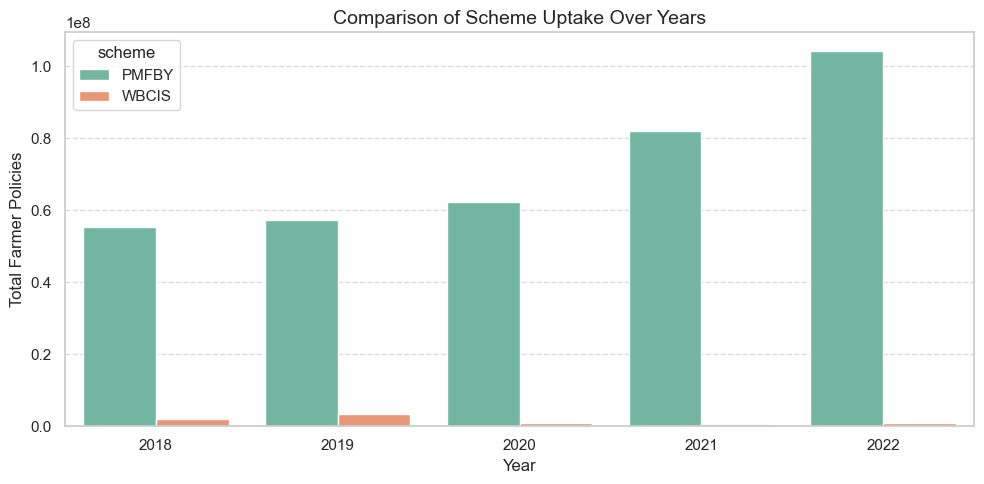


--- Table: High-Level Scheme Comparison (2018–2022) ---
  scheme  total_policies  percent_policy_share  total_sum_insured  percent_sum_share
0  PMFBY  361,177,988.00                 97.83      93,366,391.47              94.76
1  WBCIS    8,004,440.00                  2.17       5,167,905.26               5.24

--- Plot 3: PMFBY vs. WBCIS Comparison ---


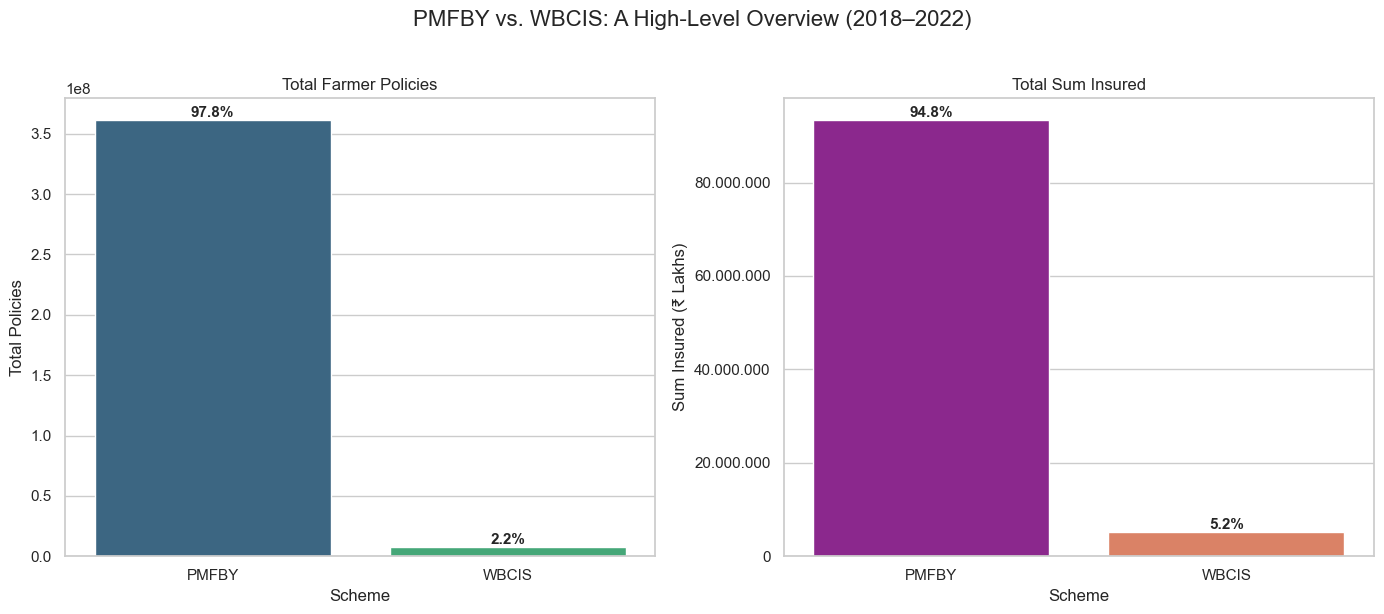

In [37]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as mticker

# Load cleaned dataset
df_cleaned = pd.read_csv("cleaned_crop_insurance1.csv")

# --- Setup ---
pd.options.display.float_format = '{:,.2f}'.format
sns.set_style("whitegrid")

# ------------------------------
# 1. National Trends (Subplots)
# ------------------------------
print("--- Plot 1: National Insurance Trends by Metric ---")

yearly_summary = df_cleaned.groupby('year').agg(
    total_policies=('total_policies', 'sum'),
    area_insured=('area_insured', 'sum'),
    sum_insured=('sum_insured', 'sum'),
    gross_premium=('gross_premium', 'sum')
).reset_index()

fig, axes = plt.subplots(3, 1, figsize=(12, 10), sharex=True)
fig.suptitle('National Insurance Trends (2018–2022)', fontsize=16)

# Total Farmer Policies
sns.lineplot(ax=axes[0], data=yearly_summary, x='year', y='total_policies', marker='o', color='b')
axes[0].set_title('Total Farmer Policies')
axes[0].set_ylabel('Number of Policies')

# Area Insured
sns.lineplot(ax=axes[1], data=yearly_summary, x='year', y='area_insured', marker='s', color='g')
axes[1].set_title('Area Insured')
axes[1].set_ylabel('Area (Hectares)')

# Sum Insured
sns.lineplot(ax=axes[2], data=yearly_summary, x='year', y='sum_insured', marker='^', color='r')
axes[2].set_title('Sum Insured')
axes[2].set_ylabel('₹ Lakhs')

plt.xlabel('Year')
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

# ----------------------------------
# 2. Scheme-Wise Uptake Over Years
# ----------------------------------
print("\n--- Plot 2: Scheme Uptake Comparison Over Time ---")

scheme_year_summary = df_cleaned.groupby(['year', 'scheme'])['total_policies'].sum().reset_index()

plt.figure(figsize=(10, 5))
sns.barplot(data=scheme_year_summary, x='year', y='total_policies', hue='scheme', palette='Set2')
plt.title("Comparison of Scheme Uptake Over Years", fontsize=14)
plt.ylabel("Total Farmer Policies")
plt.xlabel("Year")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# ----------------------------------
# 3. High-Level Scheme Summary Table
# ----------------------------------
print("\n--- Table: High-Level Scheme Comparison (2018–2022) ---")

scheme_summary = df_cleaned.groupby('scheme').agg(
    total_sum_insured=('sum_insured', 'sum'),
    total_area_insured=('area_insured', 'sum'),
    total_policies=('total_policies', 'sum'),
    total_gross_premium=('gross_premium', 'sum'),
    number_of_records=('id', 'count')
).reset_index()

# Add % shares
scheme_summary['percent_policy_share'] = (scheme_summary['total_policies'] / scheme_summary['total_policies'].sum()) * 100
scheme_summary['percent_sum_share'] = (scheme_summary['total_sum_insured'] / scheme_summary['total_sum_insured'].sum()) * 100

print(scheme_summary[['scheme', 'total_policies', 'percent_policy_share', 'total_sum_insured', 'percent_sum_share']])

# ----------------------------------
# 4. Scheme Comparison Visualization
# ----------------------------------
print("\n--- Plot 3: PMFBY vs. WBCIS Comparison ---")

plt.figure(figsize=(14, 6))
plt.suptitle('PMFBY vs. WBCIS: A High-Level Overview (2018–2022)', fontsize=16, y=1.02)

# Bar Plot 1: Total Farmer Policies
plt.subplot(1, 2, 1)
ax1 = sns.barplot(x='scheme', y='total_policies', data=scheme_summary, palette='viridis')
plt.title('Total Farmer Policies')
plt.ylabel('Total Policies')
plt.xlabel('Scheme')

# Annotate % share
for index, row in scheme_summary.iterrows():
    ax1.text(index, row.total_policies, f"{row.percent_policy_share:.1f}%", 
             ha='center', va='bottom', fontsize=11, fontweight='bold')

# Bar Plot 2: Total Sum Insured
plt.subplot(1, 2, 2)
ax2 = sns.barplot(x='scheme', y='total_sum_insured', data=scheme_summary, palette='plasma')
plt.title('Total Sum Insured')
plt.ylabel('Sum Insured (₹ Lakhs)')
plt.xlabel('Scheme')

# Format Y-axis in Indian number system
indian_format = mticker.FuncFormatter(lambda x, _: f'{x:,.0f}'.replace(",", "X").replace(".", ",").replace("X", "."))
ax2.yaxis.set_major_formatter(indian_format)

# Annotate % share
for index, row in scheme_summary.iterrows():
    ax2.text(index, row.total_sum_insured, f"{row.percent_sum_share:.1f}%", 
             ha='center', va='bottom', fontsize=11, fontweight='bold')

plt.tight_layout()
plt.show()


📊 Key Findings from PMFBY & WBCIS Data (2018–2022)
1️⃣ PMFBY’s Overwhelming Dominance
The dataset reveals that PMFBY is India’s default crop insurance scheme, while WBCIS is minimal and shrinking.

Market Share:

PMFBY accounts for 97.8% of all policies and 94.8% of the total sum insured.

WBCIS contributes only 2.2% of policies and 5.2% of the sum insured.

Uptake Trend:

PMFBY shows steady year-over-year growth.

WBCIS participation has dwindled to near-zero by 2022, suggesting a policy consolidation toward PMFBY.

Scheme Use Cases:

WBCIS likely targets high-value horticultural crops in specific geographies like Himachal Pradesh, Uttarakhand, and the North-East — aligned with its weather-based insurance design.

🔎 Policy Insight:
PMFBY's dominance may indicate strong government backing, ease of implementation, or mandatory adoption by loanee farmers. However, WBCIS might require revamping or targeting to retain relevance.

2️⃣ The National Trend Puzzle: More Policies, Less Coverage 🧐
While farmer participation increased, both area insured and sum insured declined, raising questions about the evolving nature of coverage.

🔵 Total Farmer Policies
Steady growth from ~58 million in 2018 to 104+ million in 2022.

Notable surge post-2020, likely driven by:

Digital enrollment

Awareness campaigns

Loanee farmer mandates

💡 Insight: Despite COVID-19, the scheme expanded — showing resilience and adaptability.

📘 Societal Implication:
Success in outreach, but raises a question — is the scheme equally accessible across genders, castes, and landholding sizes?

🟢 Area Insured
Declined from ~57,000 to ~46,000 hectares, with only slight recovery in 2022.

💡 Insight: More policies for smaller landholdings → points to rising inclusion of marginal/small farmers.

📘 Interpretation:
This may indicate strong equity progress, but needs validation via disaggregated demographic data.

🔴 Sum Insured
Gradual decline from 2018 to 2021, followed by a modest recovery in 2022.

💡 Insight: Decreased insurance value per policy — possibly due to:

Shrinking land sizes

Lower-value crop selection

Regional participation shifts

📘 Recommended Next Step:
Calculate:

sum_insured / total_policies (value per policy)

sum_insured / area_insured (value per hectare)
to better understand the trend.

3️⃣ Scheme Comparison Reveals Distinct Roles
While WBCIS is small, it isn't a scaled-down PMFBY — it serves different purposes.

Comparative Metrics:
Metric	PMFBY	WBCIS
Policies Issued	361 million (97.8%)	8 million (2.2%)
Sum Insured	₹93.4 Lakh Cr (94.8%)	₹5.1 Lakh Cr (5.2%)
Average Sum per Policy	Lower	Higher

💡 Key Insight:

WBCIS offers higher average sum insured per policy → suggests it’s used for high-value crops.

Could be suited for weather-sensitive or commercial crops, not broad-acre cereals.

📘 Policy Consideration:

PMFBY: broad-scale coverage

WBCIS: strategic/niche coverage — but at risk of policy neglect or obsolescence

🔥 Highlight-Worthy Takeaways (for PPT / Paper)
Point	Insight
📈 Policy Penetration Doubled	Farmer policies rose ~80% in 5 years
📉 Area Insured Fell	Signals inclusion of marginal/small farmers
📉 Sum Insured per Policy Dropped	Needs normalization for clearer trend
📊 97.8% via PMFBY	Scheme is near-monopoly; WBCIS plays minor, localized role
⚖️ Equity & Access	Must analyze by state, caste, gender, farmer type to ensure fairness


## Inclusivity Analysis (Caste, Gender, Farmer Type)
🎯 Objectives:
We’ll answer key societal questions:

Are women farmers adequately represented?

Are SC/ST/OBC farmers getting access to insurance?

Are marginal and small farmers — the most vulnerable — covered well?

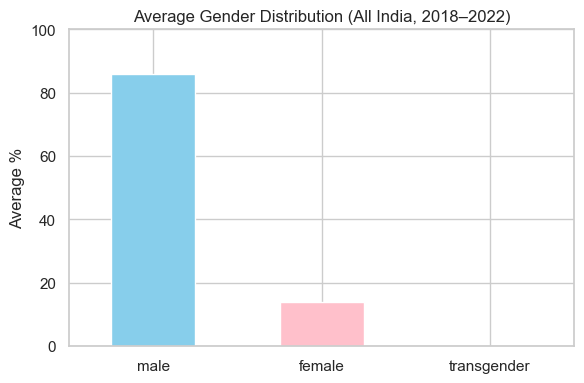

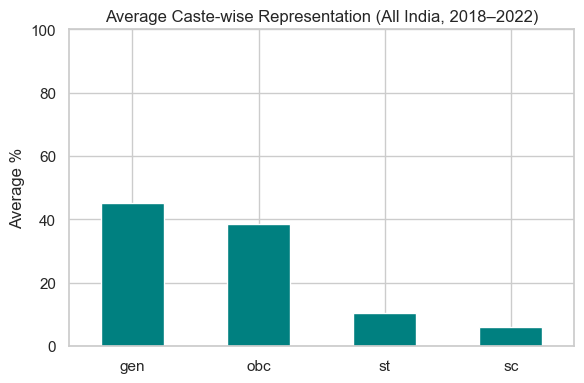

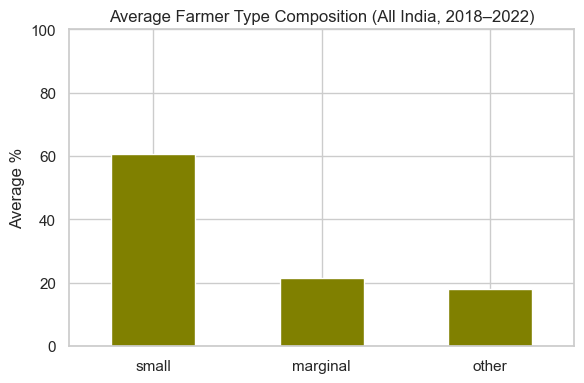

In [38]:
# Set style
sns.set_style("whitegrid")

# --- 1. National-Level Gender Distribution ---
gender_cols = ['male', 'female', 'transgender']
gender_avg = df_cleaned[gender_cols].mean()

plt.figure(figsize=(6, 4))
gender_avg.sort_values(ascending=False).plot(kind='bar', color=['skyblue', 'pink', 'purple'])
plt.title("Average Gender Distribution (All India, 2018–2022)")
plt.ylabel("Average %")
plt.xticks(rotation=0)
plt.ylim(0, 100)
plt.tight_layout()
plt.show()

# --- 2. National-Level Caste Distribution ---
caste_cols = ['sc', 'st', 'obc', 'gen']
caste_avg = df_cleaned[caste_cols].mean()

plt.figure(figsize=(6, 4))
caste_avg.sort_values(ascending=False).plot(kind='bar', color='teal')
plt.title("Average Caste-wise Representation (All India, 2018–2022)")
plt.ylabel("Average %")
plt.xticks(rotation=0)
plt.ylim(0, 100)
plt.tight_layout()
plt.show()

# --- 3. Farmer Type Distribution ---
farmer_type_cols = ['marginal', 'small', 'other']
farmer_type_avg = df_cleaned[farmer_type_cols].mean()

plt.figure(figsize=(6, 4))
farmer_type_avg.sort_values(ascending=False).plot(kind='bar', color='olive')
plt.title("Average Farmer Type Composition (All India, 2018–2022)")
plt.ylabel("Average %")
plt.xticks(rotation=0)
plt.ylim(0, 100)
plt.tight_layout()
plt.show()


Gender: ~85% male, ~14% female, ~0% transgender — significant gender gap in coverage.

Caste: GEN (~45%) and OBC (~38%) dominate; SC (~6%) and ST (~10%) under-represented.

Farmer Type: Small farmers (~60%) are the majority; marginal farmers (~22%) remain under-covered.

--- Part 1: Overall Inclusivity Profile ---


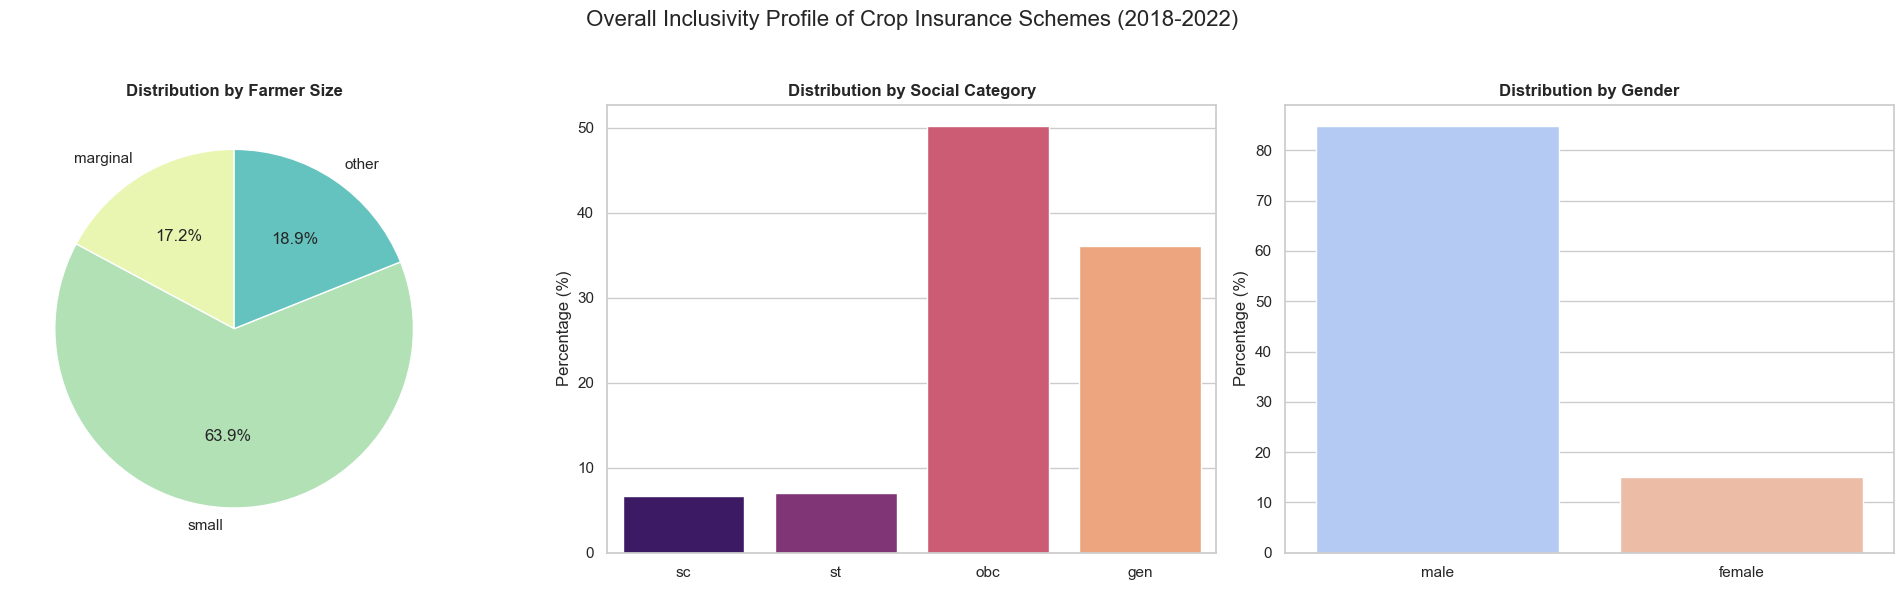


--- Part 2: Trend Analysis of Farmer Size ---


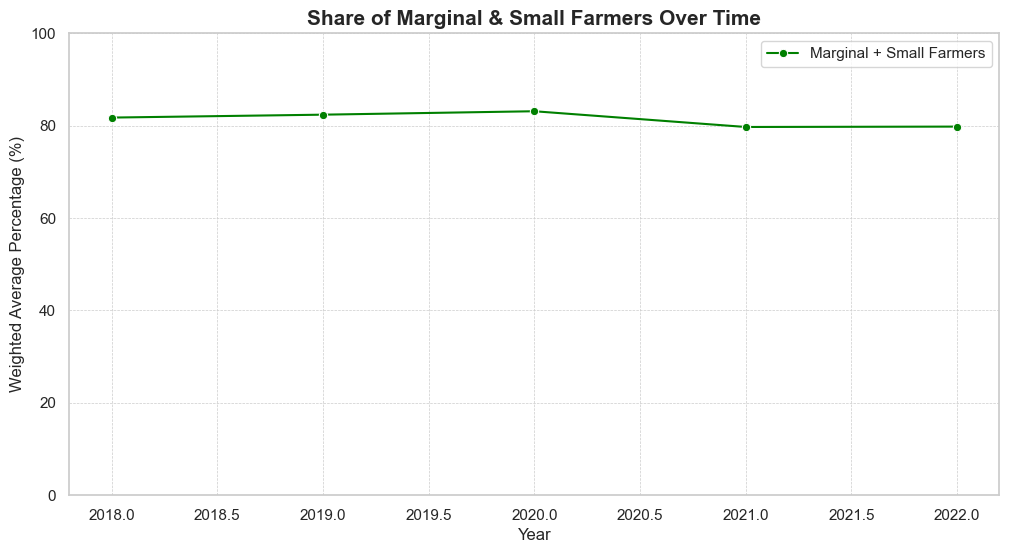


--- Part 3: PMFBY vs. WBCIS Inclusivity Profile ---


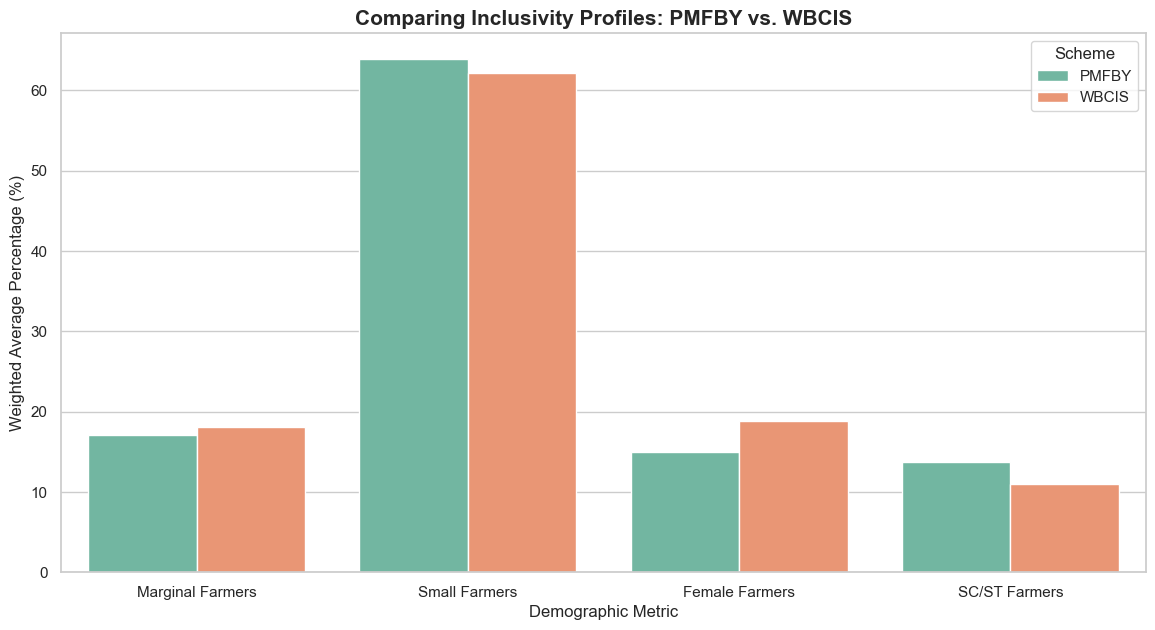

In [39]:
# Assuming 'df_cleaned' is your cleaned DataFrame from the previous steps

# --- Data Preparation for Weighted Analysis ---
# Drop rows where demographic data is missing for accurate calculations
df_demo = df_cleaned.dropna(subset=['male', 'sc', 'marginal']).copy()

# --- Part 1: Overall Inclusivity Profile (2018-2022) ---
print("--- Part 1: Overall Inclusivity Profile ---")

# Define columns for each category
farmer_size_cols = ['marginal', 'small', 'other']
social_category_cols = ['sc', 'st', 'obc', 'gen']
gender_cols = ['male', 'female', 'transgender']

# Calculate the total "policy-weighted" value for each demographic
total_policies = df_demo['total_policies'].sum()
weighted_totals = {col: (df_demo[col] * df_demo['total_policies']).sum() for col in farmer_size_cols + social_category_cols + gender_cols}

# Calculate the final weighted average percentage
weighted_avg_percent = {key: (value / total_policies) for key, value in weighted_totals.items()}

# --- Visualization for Overall Profile ---
fig, axes = plt.subplots(1, 3, figsize=(20, 6))
fig.suptitle('Overall Inclusivity Profile of Crop Insurance Schemes (2018-2022)', fontsize=16)

# a) Farmer Size Distribution (Pie Chart)
farmer_size_data = {k: v for k, v in weighted_avg_percent.items() if k in farmer_size_cols}
axes[0].pie(farmer_size_data.values(), labels=farmer_size_data.keys(), autopct='%1.1f%%', startangle=90, colors=sns.color_palette('YlGnBu'))
axes[0].set_title('Distribution by Farmer Size', fontweight='bold')

# b) Social Category Distribution (Bar Chart)
social_category_data = {k: v for k, v in weighted_avg_percent.items() if k in social_category_cols}
sns.barplot(ax=axes[1], x=list(social_category_data.keys()), y=list(social_category_data.values()), palette='magma')
axes[1].set_title('Distribution by Social Category', fontweight='bold')
axes[1].set_ylabel('Percentage (%)')

# c) Gender Distribution (Bar Chart)
gender_data = {k: v for k, v in weighted_avg_percent.items() if k in gender_cols and k != 'transgender'}
sns.barplot(ax=axes[2], x=list(gender_data.keys()), y=list(gender_data.values()), palette='coolwarm')
axes[2].set_title('Distribution by Gender', fontweight='bold')
axes[2].set_ylabel('Percentage (%)')

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

# --- Part 2: Trend of Marginal & Small Farmer Participation ---
print("\n--- Part 2: Trend Analysis of Farmer Size ---")

# Function to calculate weighted average for a group
def weighted_avg_group(group, col_name):
    return (group[col_name] * group['total_policies']).sum() / group['total_policies'].sum()

# Calculate yearly weighted average for marginal and small farmers
yearly_farmer_size = df_demo.groupby('year').apply(lambda x: pd.Series({
    'marginal_pct': weighted_avg_group(x, 'marginal'),
    'small_pct': weighted_avg_group(x, 'small')
})).reset_index()
yearly_farmer_size['marginal_small_total'] = yearly_farmer_size['marginal_pct'] + yearly_farmer_size['small_pct']


# --- Visualization for Farmer Size Trend ---
plt.figure(figsize=(12, 6))
sns.lineplot(data=yearly_farmer_size, x='year', y='marginal_small_total', marker='o', color='green', label='Marginal + Small Farmers')
plt.title('Share of Marginal & Small Farmers Over Time', fontsize=15, fontweight='bold')
plt.ylabel('Weighted Average Percentage (%)')
plt.xlabel('Year')
plt.ylim(0, 100)
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.legend()
plt.show()


# --- Part 3: Comparing Inclusivity of PMFBY vs. WBCIS ---
print("\n--- Part 3: PMFBY vs. WBCIS Inclusivity Profile ---")
scheme_comparison = df_demo.groupby('scheme').apply(lambda x: pd.Series({
    'marginal_pct': weighted_avg_group(x, 'marginal'),
    'small_pct': weighted_avg_group(x, 'small'),
    'female_pct': weighted_avg_group(x, 'female'),
    'sc_st_pct': weighted_avg_group(x, 'sc') + weighted_avg_group(x, 'st')
})).reset_index()

# Melt the dataframe for easy plotting with seaborn
scheme_comparison_melted = scheme_comparison.melt(id_vars='scheme', var_name='Metric', value_name='Percentage')

# --- Visualization for Scheme Comparison ---
plt.figure(figsize=(14, 7))
sns.barplot(data=scheme_comparison_melted, x='Metric', y='Percentage', hue='scheme', palette='Set2')
plt.title('Comparing Inclusivity Profiles: PMFBY vs. WBCIS', fontsize=15, fontweight='bold')
plt.ylabel('Weighted Average Percentage (%)')
plt.xlabel('Demographic Metric')
plt.xticks(ticks=[0, 1, 2, 3], labels=['Marginal Farmers', 'Small Farmers', 'Female Farmers', 'SC/ST Farmers'])
plt.legend(title='Scheme')
plt.show()

1. Reaching Small & Marginal Farmers:
- 81.1% of beneficiaries are small (63.9%) and marginal (17.2%) farmers.
- Their participation has remained stable (80–82% from 2018–2022).
- Explains rising policy numbers despite stagnant insured area.
2. Social & Gender Composition:
- OBC farmers form the largest group (50%); SC/ST under-represented.
- Major gender gap: over 80% male, under 20% female participation.
3. Scheme Differences (PMFBY vs WBCIS):
- PMFBY: More small farmers, slightly better SC/ST coverage (~14%).
- WBCIS: Slightly more marginal farmers, better gender inclusion (~19% female vs PMFBY’s ~15%).

## State‑Level Inclusivity


--- State‑Level Inclusivity Averages (2018–2022) ---


male  female  transgender    sc    st   obc   gen  marginal  small  other
state_name                                                                                            
Andaman And Nicobar Islands 82.93   17.07         0.00  0.00  0.04 68.22 31.74      6.64  93.36   0.00
Andhra Pradesh              71.62   28.35         0.03  3.70  2.99 49.84 43.47     14.23  74.04  11.73
Assam                       78.09   21.87         0.04  3.66 10.11 11.80 74.43     29.75  66.64   3.61
Chhattisgarh                89.76   10.17         0.07  6.13 34.36 46.62 12.90     14.96  62.08  22.96
Goa                         86.71   13.29         0.00  0.21 16.89 20.43 62.47     20.36  48.79  30.85
Gujarat                     96.00    4.00         0.00  8.31  2.48 53.06 36.15     10.75  75.76  13.49
Haryana                     91.97    7.99         0.04  0.86  0.05 19.17 79.92     22.34  58.95  18.71
Himachal Pradesh            92.51    7.45         0.05  7.58 11.96  6.15 74.31     39.11  54.56   6.33
Jammu And Kashmir           96.05    3.91         0.04  5.27  3.01  5.85 85.87     26.93  65.69   7.38
Jharkhand                   79.72   20.22         0.06  7.38 28.22 46.39 18.01     22.01  75.00   2.98
Karnataka                   81.64   18.36         0.00  3.58  2.65 22.18 71.58     18.58  50.16  31.26
Kerala                      70.36   29.15         0.49  1.85  0.28 36.31 61.56     33.84  54.27  11.88
Madhya Pradesh              89.63   10.26         0.11  4.59 12.39 55.57 27.45     14.37  51.54  34.09
Maharashtra                 84.49   15.46         0.06  3.83  3.21 38.92 54.04     12.49  69.83  17.69
Manipur                     64.65   35.30         0.05  3.67 41.43 18.63 36.28     41.18  49.44   9.38
Meghalaya                   40.40   59.59         0.01  0.00 99.43  0.36  0.22     48.56  50.87   0.57
Odisha                      87.02   12.95         0.03  8.97 17.18 47.39 26.46     17.67  70.38  11.95
Puducherry                  66.91   33.05         0.04 16.65  0.10 51.88 31.37     10.91  87.96   1.13
Rajasthan                   90.03    9.86         0.10  8.01 12.46 56.61 22.92     17.54  41.79  40.67
Sikkim                      86.93   13.06         0.01  3.59  8.23 28.39 59.80     49.59  47.64   2.76
Tamil Nadu                  78.88   21.09         0.04  6.69  0.73 44.88 47.70     12.46  79.20   8.34
Telangana                   75.77   24.19         0.04  8.06 10.33 47.85 33.76     18.23  60.70  21.07
Tripura                     84.23   15.74         0.03 12.86 26.53 14.45 46.16     17.08  76.63   6.29
Uttar Pradesh               90.92    9.04         0.04  5.33  0.66 37.22 56.78     35.92  54.14   9.94
Uttarakhand                 91.81    8.17         0.02 11.31  8.39 13.90 66.40     19.05  78.17   2.78
West Bengal                 89.15   10.83         0.02 13.38  2.95  9.87 73.80     24.34  62.45  13.21

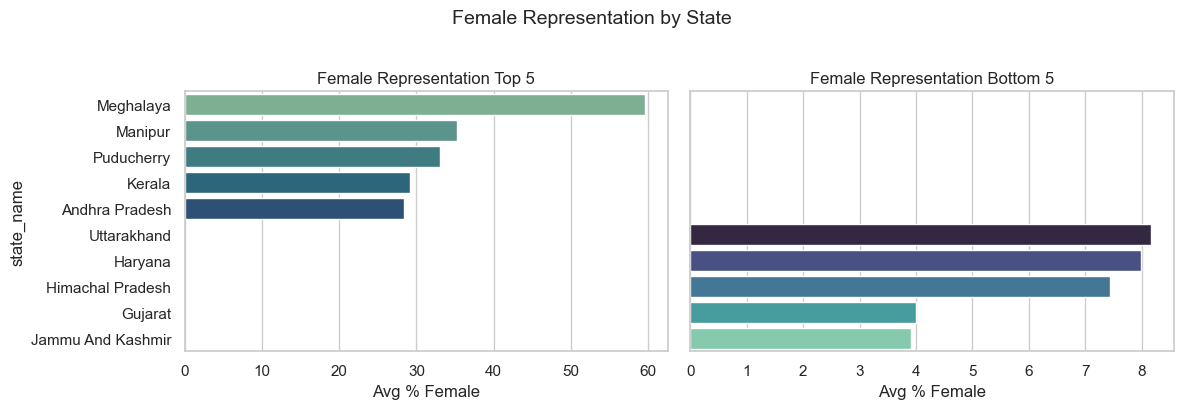

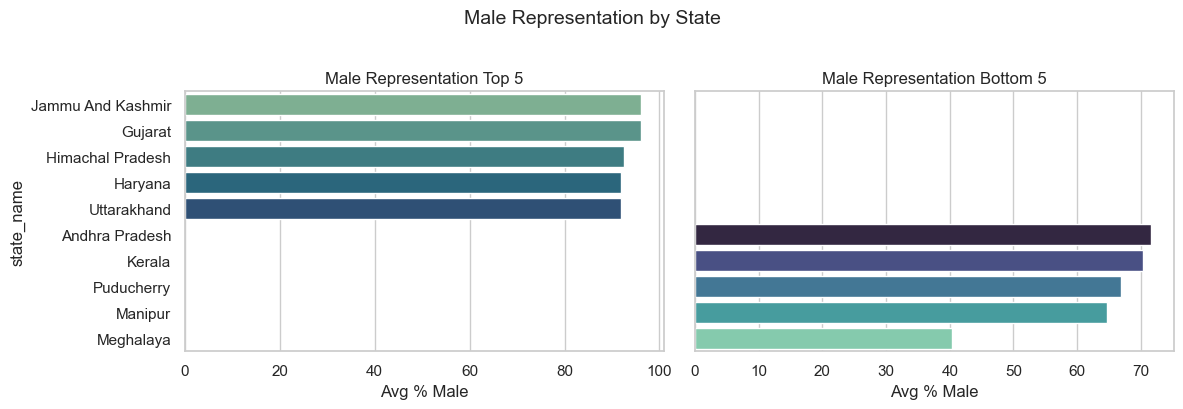

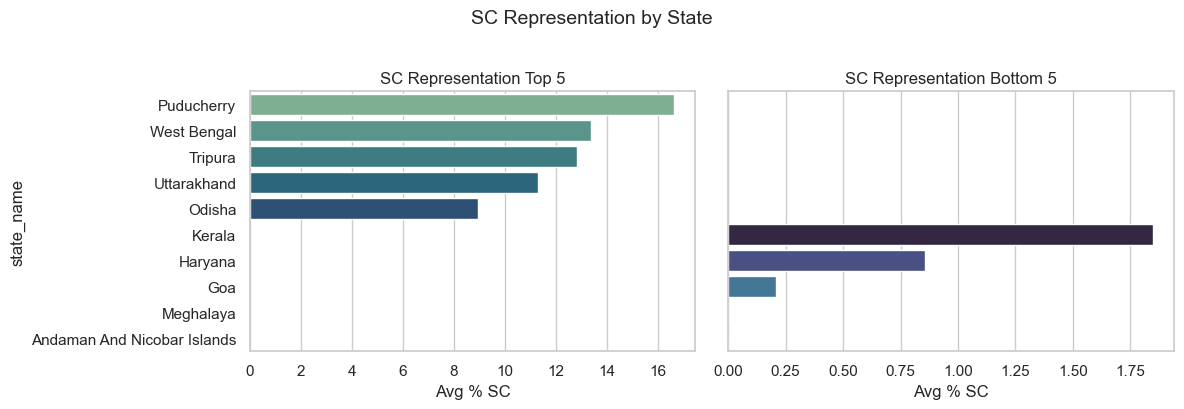

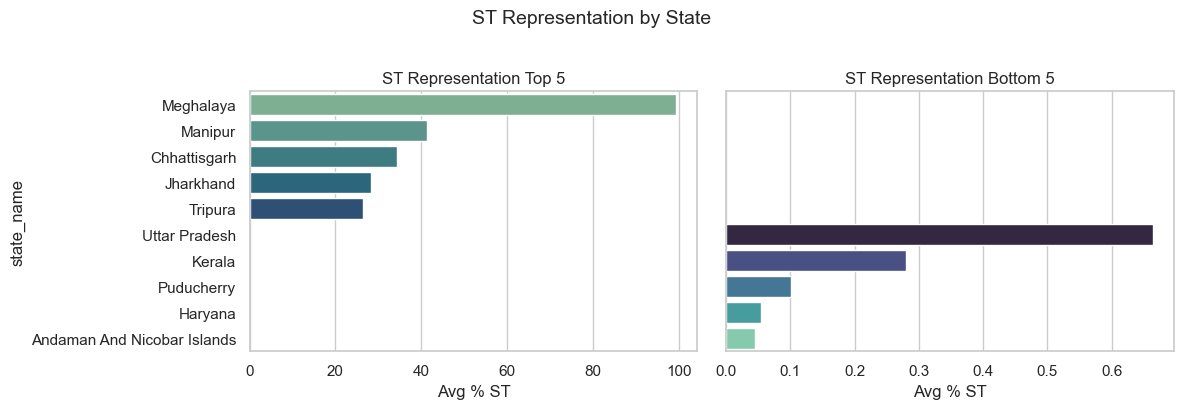

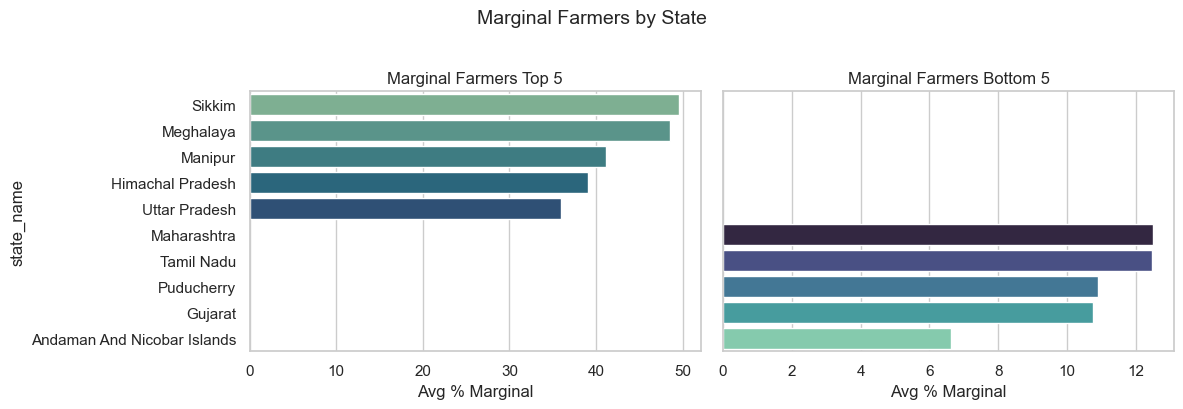

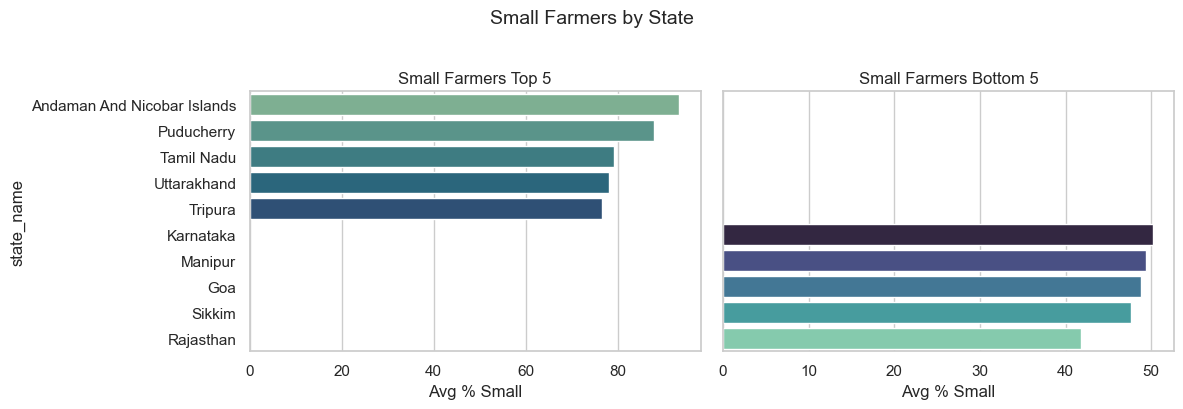

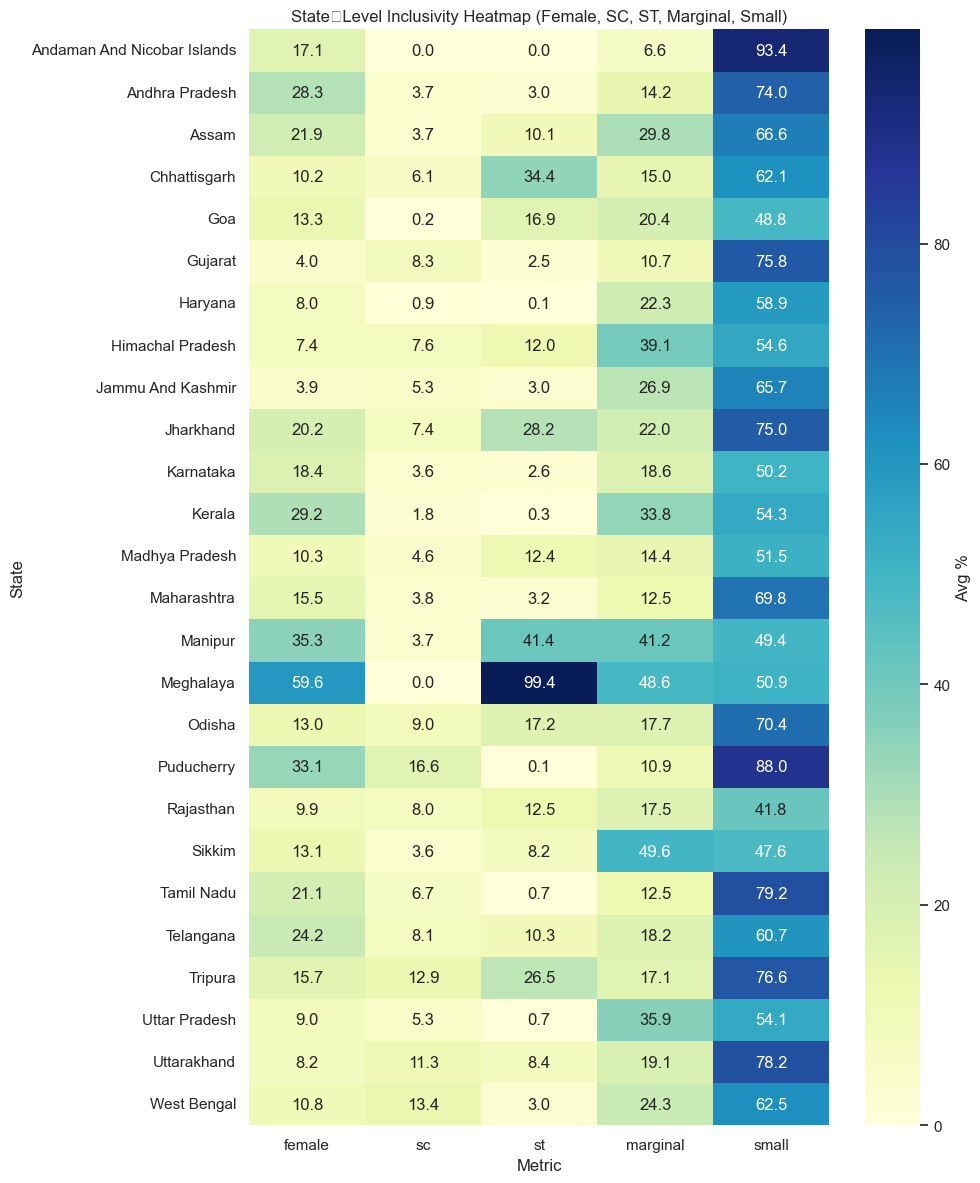

In [40]:
# --- Setup ---
sns.set_style("whitegrid")
pd.options.display.float_format = '{:,.2f}'.format

# Define the columns of interest
gender_cols      = ['male', 'female', 'transgender']
caste_cols       = ['sc', 'st', 'obc', 'gen']
farmer_type_cols = ['marginal', 'small', 'other']

# --- 1. Compute State‑Level Averages ---
state_df = (
    df_cleaned
    .groupby('state_name')[gender_cols + caste_cols + farmer_type_cols]
    .mean()
    .sort_index()
)

# Show the summary table
print("\n--- State‑Level Inclusivity Averages (2018–2022) ---")
display(state_df)  # or print(state_df) if not in Jupyter

# --- 2. Function to plot top & bottom N states for a given column ---
def plot_top_bottom(col, n=5, ylabel="% Average", title_prefix=""):
    # sort
    sorted_states = state_df[col].sort_values(ascending=False)
    top = sorted_states.head(n)
    bot = sorted_states.tail(n)
    
    fig, axes = plt.subplots(1, 2, figsize=(12, 4), sharey=True)
    sns.barplot(x=top.values, y=top.index, ax=axes[0], palette="crest")
    axes[0].set_title(f"{title_prefix} Top {n}")
    axes[0].set_xlabel(ylabel)
    
    sns.barplot(x=bot.values, y=bot.index, ax=axes[1], palette="mako")
    axes[1].set_title(f"{title_prefix} Bottom {n}")
    axes[1].set_xlabel(ylabel)
    
    plt.suptitle(f"{title_prefix} by State", fontsize=14, y=1.02)
    plt.tight_layout()
    plt.show()

# --- 3. Plot Gender Top/Bottom ---
plot_top_bottom('female', n=5, ylabel="Avg % Female", title_prefix="Female Representation")
plot_top_bottom('male',   n=5, ylabel="Avg % Male",   title_prefix="Male Representation")

# --- 4. Plot Caste Top/Bottom (SC and ST as priority) ---
plot_top_bottom('sc', n=5, ylabel="Avg % SC", title_prefix="SC Representation")
plot_top_bottom('st', n=5, ylabel="Avg % ST", title_prefix="ST Representation")

# --- 5. Plot Farmer‑Type Top/Bottom (Marginal & Small) ---
plot_top_bottom('marginal', n=5, ylabel="Avg % Marginal", title_prefix="Marginal Farmers")
plot_top_bottom('small',    n=5, ylabel="Avg % Small",    title_prefix="Small Farmers")

# --- 6. Heatmap of All Metrics ---
plt.figure(figsize=(10, 12))
sns.heatmap(
    state_df[ ['female','sc','st','marginal','small'] ],
    annot=True, fmt=".1f", cmap="YlGnBu",
    cbar_kws={'label':'Avg %'}
)
plt.title("State‑Level Inclusivity Heatmap (Female, SC, ST, Marginal, Small)")
plt.ylabel("State")
plt.xlabel("Metric")
plt.tight_layout()
plt.show()


1. Regional Champions: North‑East & smaller states/UTs lead on gender and marginal coverage.

2. Large States Lag: Big agri states (UP, MH, WB, TN, Haryana) have lower female/SC/marginal uptake relative to their agrarian profiles.

3. Targeted Action Needed:
- Women’s Outreach in WB, UP, HP, Haryana.
- SC Inclusion Programs in Kerala, Goa, Meghalaya.
- Marginal Farmer Focus in MH, TN, GJ, Puducherry.

## Choropleth Maps

--- Creating Choropleth Map for Farmer Size ---


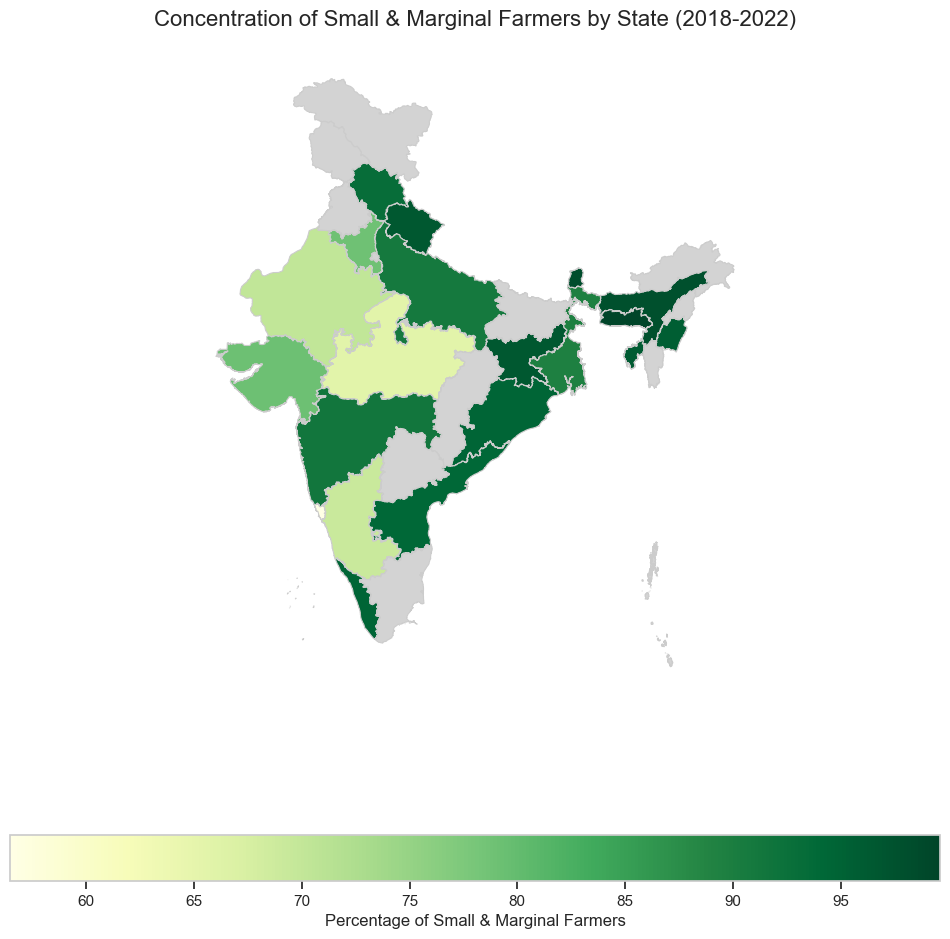

In [42]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt

# Assuming 'df_cleaned' is your cleaned DataFrame

print("--- Creating Choropleth Map for Farmer Size ---")

# --- 1. Prepare the State-Level Data ---
def weighted_avg_group(group, col_name):
    if group['total_policies'].sum() == 0: return 0
    return (group[col_name] * group['total_policies']).sum() / group['total_policies'].sum()

# Silencing the deprecation warning by explicitly excluding grouping keys from the function
state_farmer_size = df_cleaned.groupby('state_name', group_keys=False).apply(lambda x: pd.Series({
    'marginal_small_pct': weighted_avg_group(x, 'marginal') + weighted_avg_group(x, 'small')
})).reset_index()


# --- 2. Load the Shapefile and Merge Data ---

shapefile_path = 'C:/Users/ASUS/Downloads/CA-1 DS/India_State_Boundary.shp'

try:
    # Read the file (removed the SHAPE_RESTORE_SHX argument)
    india_map = gpd.read_file(shapefile_path)

    # --- THIS IS THE FIX ---
    # Rename the column 'State_Name' to 'state_name' to match our other dataframe
    india_map.rename(columns={'State_Name': 'state_name'}, inplace=True)

    # Now the merge will work correctly
    merged_map_data = india_map.set_index('state_name').join(state_farmer_size.set_index('state_name'))

    # --- 3. Plot the Choropleth Map ---
    fig, ax = plt.subplots(1, 1, figsize=(12, 12))

    merged_map_data.plot(
        column='marginal_small_pct',
        cmap='YlGn',
        linewidth=0.8,
        ax=ax,
        edgecolor='0.8',
        legend=True,
        legend_kwds={'label': "Percentage of Small & Marginal Farmers",
                     'orientation': "horizontal"},
        missing_kwds={'color': 'lightgrey', 'label': 'Missing data'} # Shows states not in our data as grey
    )

    ax.axis('off')
    ax.set_title('Concentration of Small & Marginal Farmers by State (2018-2022)', fontdict={'fontsize': '16', 'fontweight': '3'})
    plt.show()

except Exception as e:
    print(f"An error occurred: {e}")

--- Creating Choropleth Map for SC/ST Farmer Concentration ---


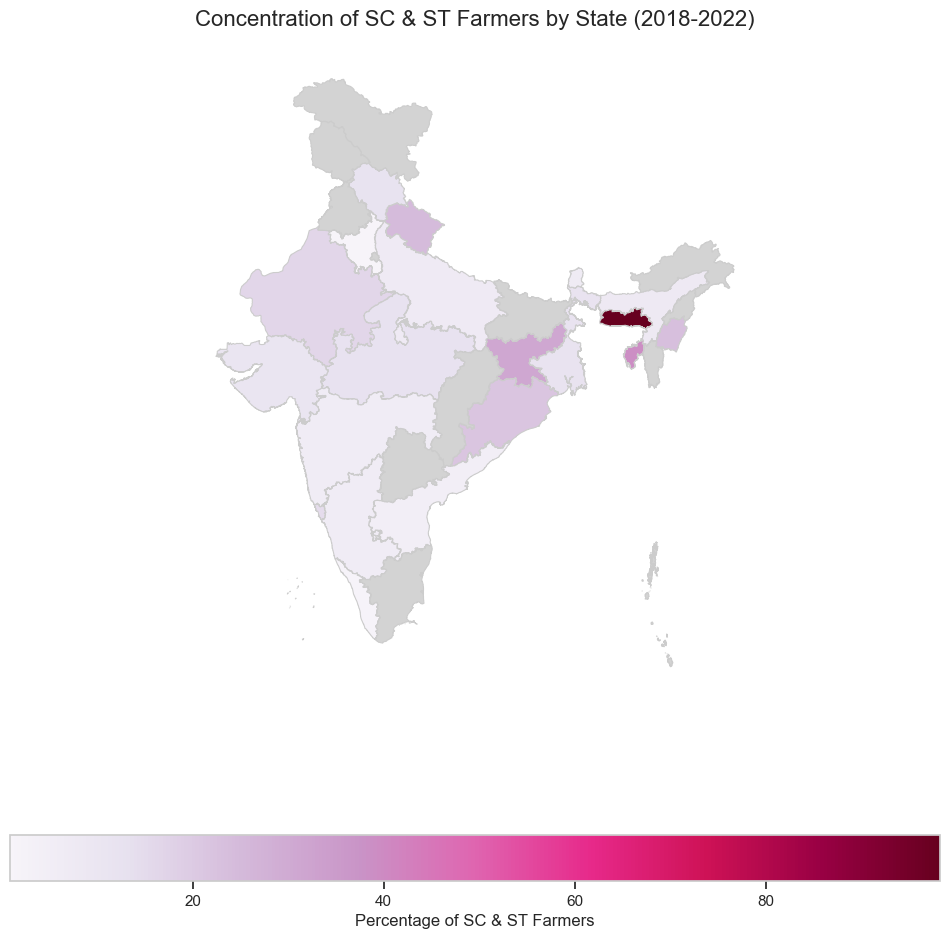

In [43]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt

# Assuming 'df_demo' is your cleaned DataFrame with demographic data

print("--- Creating Choropleth Map for SC/ST Farmer Concentration ---")

# --- 1. Prepare the State-Level Data for SC/ST Farmers ---

def weighted_avg_group(group, col_name):
    if group['total_policies'].sum() == 0: return 0
    return (group[col_name] * group['total_policies']).sum() / group['total_policies'].sum()

# Calculate the combined percentage of SC and ST farmers for each state
state_sc_st_summary = df_demo.groupby('state_name', group_keys=False).apply(lambda x: pd.Series({
    'sc_st_pct': weighted_avg_group(x, 'sc') + weighted_avg_group(x, 'st')
})).reset_index()


# --- 2. Load the Shapefile and Merge Data ---

# Use the same path to your shapefile
shapefile_path = 'C:/Users/ASUS/Downloads/CA-1 DS/India_State_Boundary.shp'

try:
    # Read the geospatial file
    india_map = gpd.read_file(shapefile_path)

    # Rename the column to ensure the merge works correctly
    india_map.rename(columns={'State_Name': 'state_name'}, inplace=True)

    # Merge your new SC/ST data with the GeoDataFrame
    merged_map_data = india_map.set_index('state_name').join(state_sc_st_summary.set_index('state_name'))

    # --- 3. Plot the Choropleth Map ---
    fig, ax = plt.subplots(1, 1, figsize=(12, 12))

    merged_map_data.plot(
        column='sc_st_pct', # <-- Changed to our new SC/ST data column
        cmap='PuRd',       # <-- Changed color scheme for variety
        linewidth=0.8,
        ax=ax,
        edgecolor='0.8',
        legend=True,
        legend_kwds={'label': "Percentage of SC & ST Farmers",
                     'orientation': "horizontal"},
        missing_kwds={'color': 'lightgrey', 'label': 'Missing data'}
    )

    ax.axis('off')
    ax.set_title('Concentration of SC & ST Farmers by State (2018-2022)', fontdict={'fontsize': '16', 'fontweight': '3'})
    plt.show()

except Exception as e:
    print(f"An error occurred: {e}")

## 🌍 Inclusivity & Farmer Demographics: State-Level Analysis

This section summarizes insights from heatmaps and spatial data on the inclusivity of crop insurance schemes across Indian states. Inclusivity is assessed based on gender, caste, and landholding size.

---

### 🔷 1. State-Level Inclusivity Heatmap  
(Indicators: % Female, % SC, % ST, % Marginal, % Small Farmers)

#### ✅ High Inclusivity (Avg % across all 5 metrics):
- **Andaman & Nicobar Islands**: Highest (95.2%) – driven by a large share of small farmers.
- **Others**: Puducherry (85.5%), Tamil Nadu (79.4%), Uttarakhand (77.9%), Jharkhand (75%), Andhra Pradesh (74%)

#### ❌ Low Inclusivity:
- **Rajasthan (42%)**, **Karnataka (46.1%)**, **Manipur (46.2%)** – low female or SC/ST inclusion despite small/marginal farmer presence.

#### 🚨 Female Farmer Inclusion: Alarmingly Low
- Only a few states are above 20%:
  - **Meghalaya (65.2%)**, **Puducherry (45.8%)**, **Andaman (20.5%)**
- Major states score under 10%:
  - **Haryana (8%)**, **Rajasthan (9.8%)**, **UP (9.2%)**

#### 🔝 Top States by Community Inclusion:
- **ST Inclusion**: Meghalaya (89.1%), Manipur (46%), Chhattisgarh (35.2%), Jharkhand (28.2%), Tripura (26.5%)
- **SC Inclusion**: Puducherry (18.2%), Tripura (12.9%), West Bengal (12.6%), Uttarakhand (11.3%)

---

### 🟩 2. Map: Concentration of Small & Marginal Farmers

#### ✅ High Concentration States (>85%):
- **Eastern India**: Bihar, West Bengal, Jharkhand, Assam  
- **Southern India**: Kerala, Tamil Nadu  
- **Northeast India**: Broadly high across the region

#### ⚖️ Moderate (70–85%): 
Odisha, Chhattisgarh, UP, Andhra Pradesh, Telangana, Maharashtra, Uttarakhand

#### ❌ Low (60–70%):  
Gujarat, Haryana, MP, Punjab, parts of Rajasthan

#### 🔍 Interpretation:
- These regions are dominated by small/marginal landholders, indicating fragmented farming and potentially vulnerable agrarian economies.

---

### 🟥 3. Map: Concentration of SC & ST Farmers

#### ✅ Key Observations:
- **Bihar**: Darkest red – highest SC/ST concentration  
- **Other High SC/ST States**: Odisha, Chhattisgarh, Jharkhand, Assam, West Bengal  
- **Central & NE Tribal Belt**: Significant marginalized farmer presence

#### 🔍 Interpretation:
- These regions are critical for **targeted inclusive agri-policy**, especially focused on **tribal and SC communities**.

---

### 🔎 Cross-Map Correlations & Strategic Insights

- ✅ **Inclusivity ≠ Just Marginal Farmers**:
  - States like Andaman, Puducherry, Tamil Nadu score high due to **female participation** and **small holdings**, even with low SC/ST inclusion.

- ❌ **High SC/ST ≠ High Inclusivity**:
  - **Tripura, Meghalaya** have high ST shares but low inclusivity due to **poor female representation** or other gaps.

- 🚨 **Large but Low-Inclusion States**:
  - **Haryana, Rajasthan, Karnataka** need **policy intervention** to improve representation of **women and SC/ST farmers**.

---

## 📌 Final Strategic Recommendations

### 👩‍🌾 1. Targeted Policies for Women Farmers
- Female representation is **extremely low** across most states.  
- Prioritize **land rights, credit access, and scheme inclusion** for women.

### 🧑🏽‍🌾 2. Upliftment of SC/ST Farmer Communities
- High SC/ST presence in **Bihar, Odisha, Chhattisgarh, NE states**.  
- These regions need **infrastructure, support systems, and tailored subsidy frameworks**.

### 📦 3. Land Fragmentation Solutions
- States like **Kerala, WB, Jharkhand** need:
  - **Land consolidation programs**  
  - **Cooperative farming initiatives**  
  - **Credit and insurance reforms**

### 🎯 4. Design Tailored, Inclusive Agri-Schemes
- Use intersectional indicators (**gender + caste + landholding size**) to build **state-specific, inclusive agricultural policies**.
- Ensure **equity in access**, not just expansion in volume.

---


## District-Wise Analysis


=== Top 10 Districts by Total Policies ===
district_name
Hanumangarh      10,878,488.00
Bid               8,255,988.00
Sri Ganganagar    7,600,387.00
Latur             6,402,074.00
Jaipur            6,315,361.00
Nanded            5,988,509.00
Osmanabad         5,956,893.00
Jalna             5,723,877.00
Bharatpur         5,615,218.00
Bargarh           5,319,677.00
Name: total_policies, dtype: float64

=== Bottom 10 Districts by Total Policies ===
district_name
Bengaluru Rural          0.00
Bengaluru Urban          0.00
Kodagu                   0.00
Mysuru                   0.00
Ramanagara               0.00
Udupi                    0.00
Mahesana                 7.00
East Khasi Hills        10.00
South West Garo Hills   19.00
Ahmadabad               26.00
Name: total_policies, dtype: float64


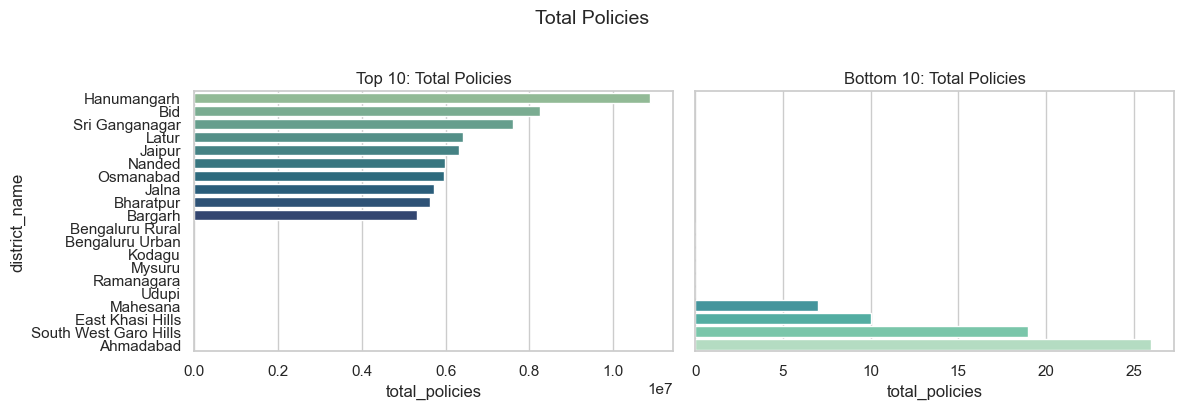


=== Top 10 Districts by Sum Insured per Policy ===
district_name
Nuh                           1.52
Sri Potti Sriramulu Nellore   1.23
Sirsa                         1.13
Jangaon                       1.12
Warangal Urban                1.07
Rajanna                       1.06
Mahabubabad                   1.06
Warangal Rural                1.06
Fatehabad                     1.04
Jayashankar                   1.03
Name: sum_per_policy, dtype: float64

=== Bottom 10 Districts by Sum Insured per Policy ===
district_name
Mandya            0.00
Chamarajnagar     0.00
Kolar             0.00
Uttarkannada      0.00
Bidar             0.00
Chikkaballapur    0.00
Hasan             0.00
Dakshinakannada   0.00
Belagavi          0.00
Bagalkot          0.00
Name: sum_per_policy, dtype: float64


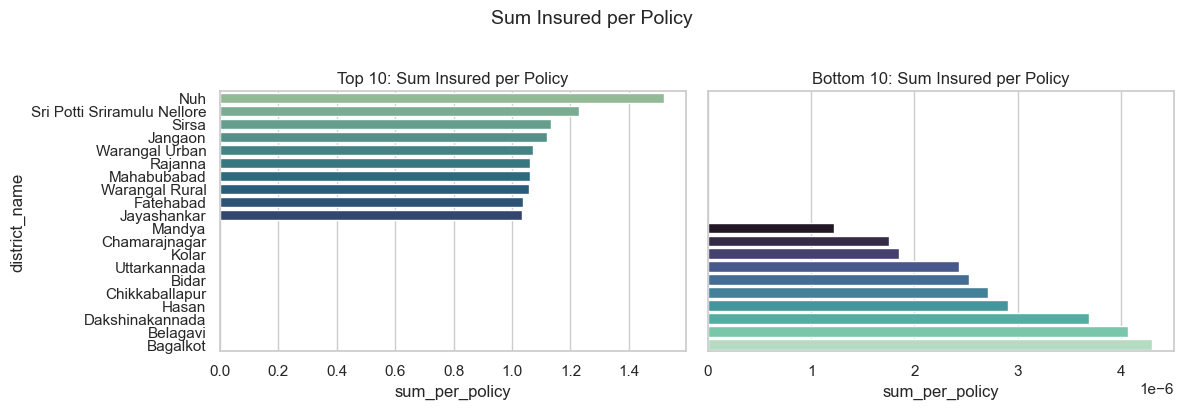


=== Top 10 Districts by % Female ===
district_name
South Garo Hills     92.73
West Jaintia Hills   82.05
East Khasi Hills     80.00
Ri Bhoi              74.42
North Garo Hills     67.64
West Khasi Hills     58.40
Ukhrul               56.18
Ribhoi               49.98
Senapati             48.04
Idukki               43.92
Name: female, dtype: float64

=== Bottom 10 Districts by % Female ===
district_name
Ahmadabad      0.00
Mahesana       0.00
Punch          1.79
Kathua         2.05
Patan          2.28
Ramban         2.38
Rajouri        2.88
Udhampur       2.91
Banas Kantha   3.23
Reasi          3.79
Name: female, dtype: float64


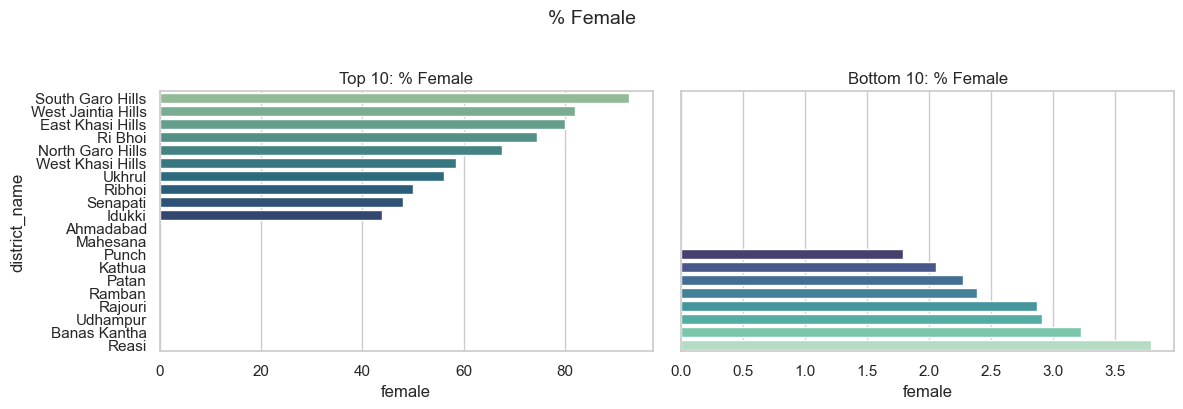


=== Top 10 Districts by % SC ===
district_name
Darjiling      49.98
Yanam          48.64
Malkangiri     45.42
Alipurduar     43.98
Arvalli        40.40
Sangli         35.50
Koch Bihar     24.94
Pithoragarh    24.19
Thoothukkudi   23.81
Jalpaiguri     23.61
Name: sc, dtype: float64

=== Bottom 10 Districts by % SC ===
district_name
Ahmadabad                  0.00
Banas Kantha               0.00
Chandel                    0.00
East Khasi Hills           0.00
Gyalshing                  0.00
Mahesana                   0.00
North And Middle Andaman   0.00
North Garo Hills           0.00
Patan                      0.00
Ri Bhoi                    0.00
Name: sc, dtype: float64


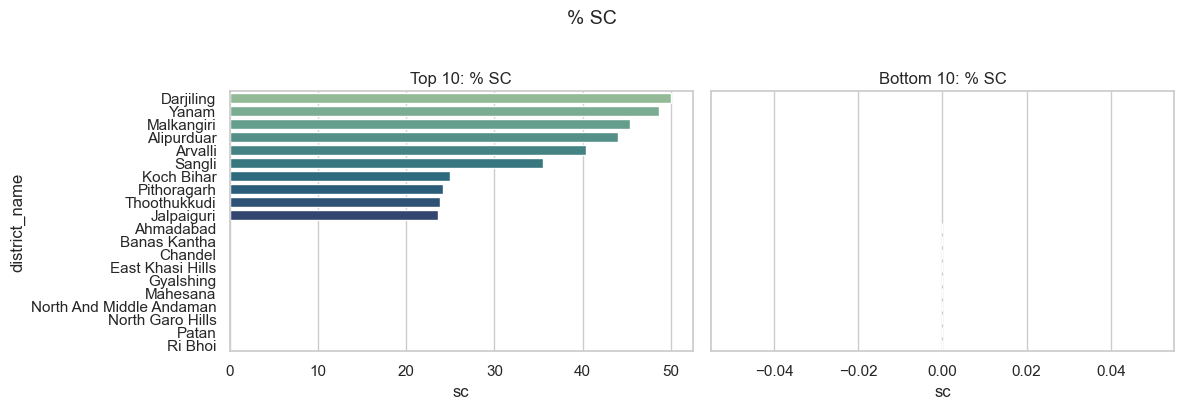


=== Top 10 Districts by % ST ===
district_name
East Khasi Hills        100.00
North Garo Hills        100.00
Ri Bhoi                 100.00
Senapati                100.00
South Garo Hills        100.00
South West Garo Hills   100.00
Tamenglong              100.00
Ukhrul                  100.00
West Jaintia Hills      100.00
West Khasi Hills        100.00
Name: st, dtype: float64

=== Bottom 10 Districts by % ST ===
district_name
Ahmadabad        0.00
Banas Kantha     0.00
Bhavnagar        0.00
Chikkamagaluru   0.00
Gyalshing        0.00
Kalaburgi        0.00
Kozhikode        0.00
Mahesana         0.00
Mandya           0.00
North Goa        0.00
Name: st, dtype: float64


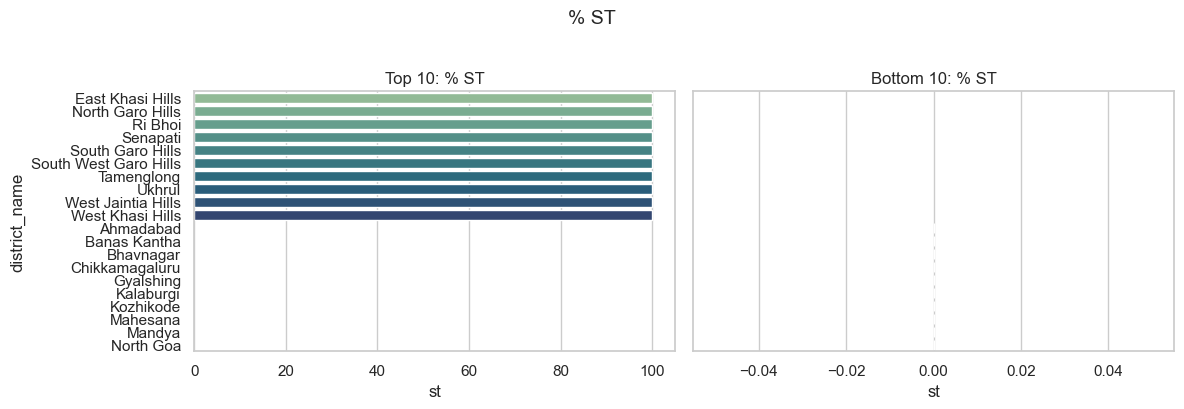


=== Top 10 Districts by % Marginal ===
district_name
Charaideo          91.23
Ukhrul             80.95
South Garo Hills   80.00
West District      79.39
Ribhoi             75.84
North Garo Hills   73.53
Imphal East        72.24
Jaunpur            68.87
Kokrajhar          66.33
Barabanki          60.92
Name: marginal, dtype: float64

=== Bottom 10 Districts by % Marginal ===
district_name
Ahmadabad                   0.00
Alluri Sitharama Raju       0.00
Anakapalli                  0.00
Annamayya                   0.00
Bapatla                     0.00
Bhavnagar                   0.00
Dr.B.R.Ambedkar Konaseema   0.00
East Khasi Hills            0.00
Eluru                       0.00
Kakinada                    0.00
Name: marginal, dtype: float64


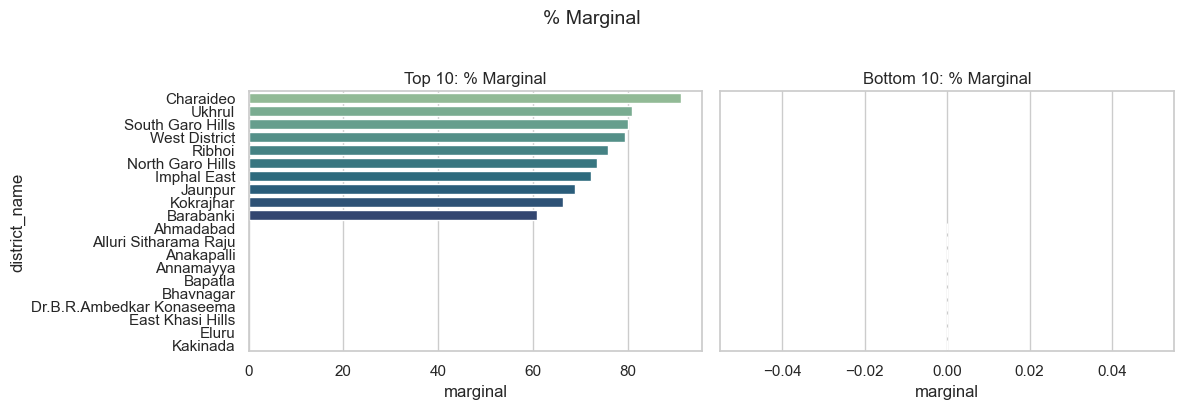

In [44]:
# ── 0. Prep if needed ──
# Calculate per‑policy metrics
df_cleaned['sum_per_policy']     = df_cleaned['sum_insured']  / df_cleaned['total_policies']
df_cleaned['premium_per_policy'] = df_cleaned['gross_premium'] / df_cleaned['total_policies']

# List of (label, column) pairs to analyze
metrics = [
    ("Total Policies",        "total_policies", "sum"),
    ("Sum Insured per Policy", "sum_per_policy",       "mean"),
    ("% Female",              "female",               "mean"),
    ("% SC",                  "sc",                   "mean"),
    ("% ST",                  "st",                   "mean"),
    ("% Marginal",            "marginal",             "mean"),
]

# ── 1. Compute and Plot ──
for title, col, aggfunc in metrics:
    # Aggregate by district
    if aggfunc == "sum":
        series = df_cleaned.groupby("district_name")[col].sum()
    else:
        series = df_cleaned.groupby("district_name")[col].mean()
    
    # Sort
    top10 = series.nlargest(10)
    bot10 = series.nsmallest(10)
    
    # Display tables
    print(f"\n=== Top 10 Districts by {title} ===")
    print(top10.round(2))
    print(f"\n=== Bottom 10 Districts by {title} ===")
    print(bot10.round(2))
    
    # Plot
    fig, axes = plt.subplots(1, 2, figsize=(12, 4), sharey=True)
    sns.barplot(x=top10.values, y=top10.index, ax=axes[0], palette="crest")
    axes[0].set_title(f"Top 10: {title}")
    axes[0].set_xlabel(col)
    sns.barplot(x=bot10.values, y=bot10.index, ax=axes[1], palette="mako")
    axes[1].set_title(f"Bottom 10: {title}")
    axes[1].set_xlabel(col)
    plt.suptitle(title, fontsize=14, y=1.02)
    plt.tight_layout()
    plt.show()


--- Creating District-Level Choropleth Map: Total Farmer Policies ---
Number of districts successfully merged: 504


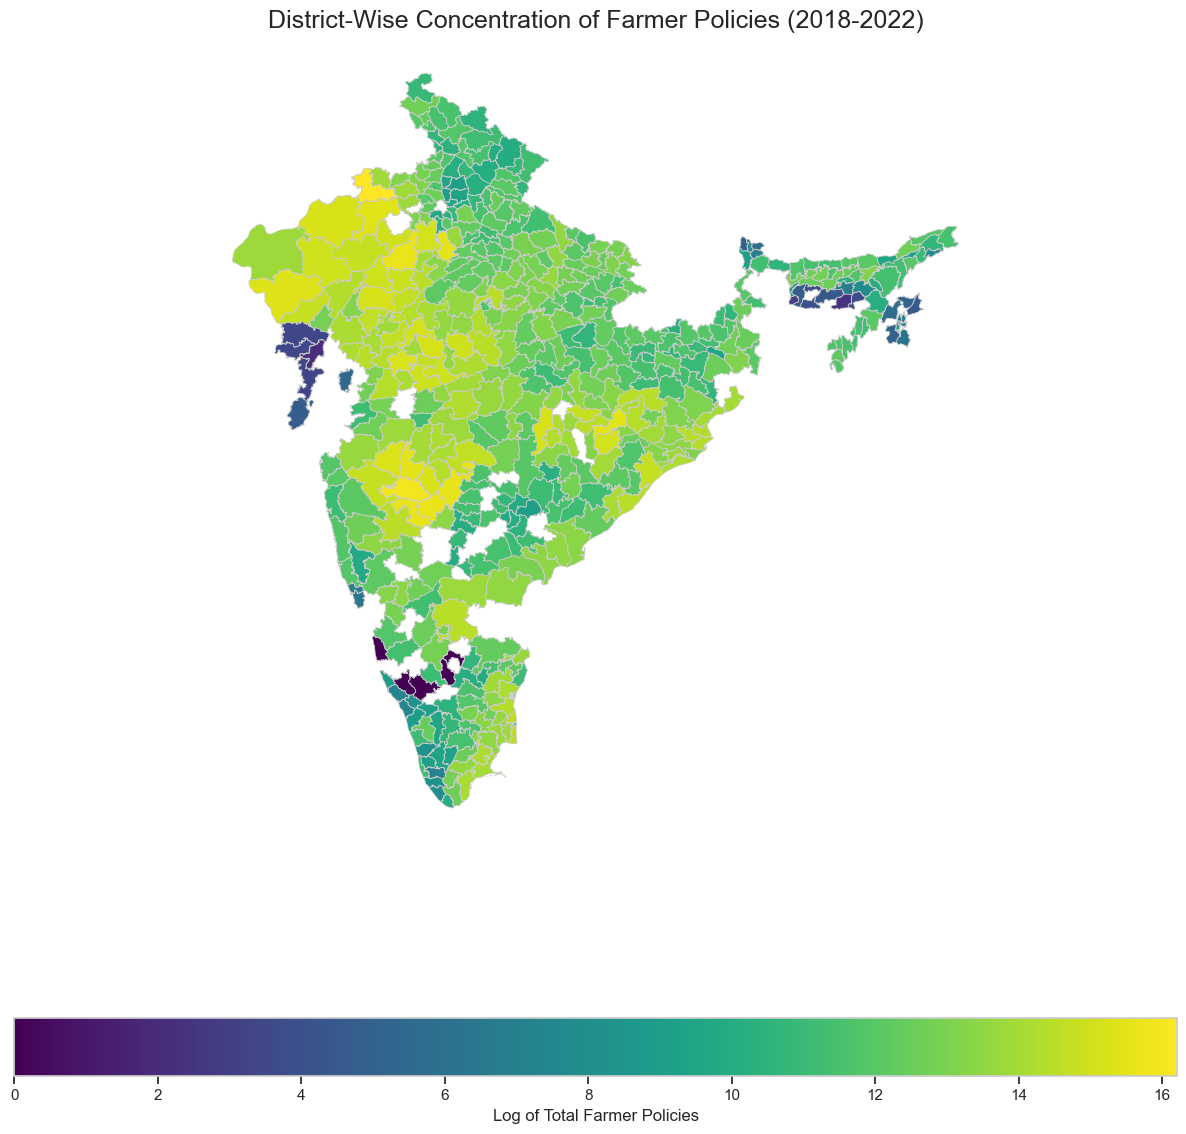

In [45]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import numpy as np

# Assuming 'df_cleaned' is your main cleaned DataFrame

print("--- Creating District-Level Choropleth Map: Total Farmer Policies ---")

# --- 1. Prepare District-Level Data ---
district_summary = df_cleaned.groupby(['state_name', 'district_name'])['total_policies'].sum().reset_index()
district_summary['log_total_policies'] = np.log1p(district_summary['total_policies'])

# --- 2. Load the District Shapefile and Merge Data ---
district_shapefile_path = 'C:/Users/ASUS/Downloads/CA-1 DS/in_district.shp'

try:
    india_districts_map = gpd.read_file(district_shapefile_path)
    india_districts_map.rename(columns={'dtname': 'district_name', 'stname': 'state_name'}, inplace=True)

    # --- THIS IS THE FIX: Standardize Names in Both DataFrames ---
    
    # Standardize the map data
    india_districts_map['district_name'] = india_districts_map['district_name'].str.upper().str.strip()
    india_districts_map['state_name'] = india_districts_map['state_name'].str.upper().str.strip()

    # Standardize your insurance data
    district_summary['district_name'] = district_summary['district_name'].str.upper().str.strip()
    district_summary['state_name'] = district_summary['state_name'].str.upper().str.strip()
    
    # Now, merge the standardized data
    merged_district_data = india_districts_map.merge(
        district_summary,
        on=['state_name', 'district_name']
    )
    
    # Add a check to see if the merge was successful
    print(f"Number of districts successfully merged: {len(merged_district_data)}")
    if len(merged_district_data) == 0:
        raise ValueError("Merge resulted in an empty DataFrame. Check for name discrepancies between your data and the shapefile.")


    # --- 3. Plot the District-Level Choropleth Map ---
    fig, ax = plt.subplots(1, 1, figsize=(15, 15))

    merged_district_data.plot(
        column='log_total_policies',
        cmap='viridis',
        linewidth=0.5,
        ax=ax,
        edgecolor='0.8',
        legend=True,
        legend_kwds={'label': "Log of Total Farmer Policies",
                     'orientation': "horizontal"},
        missing_kwds={'color': 'lightgrey', 'label': 'Missing data'}
    )

    ax.axis('off')
    ax.set_title('District-Wise Concentration of Farmer Policies (2018-2022)', fontdict={'fontsize': '18', 'fontweight': '3'})
    plt.show()

except Exception as e:
    print(f"An error occurred: {e}")

1. Core Agricultural Belt:
- Highest concentration of farmer policies is in a central-western belt covering Maharashtra, Rajasthan, Madhya Pradesh, and Karnataka—the backbone of crop insurance by volume.
2. Regional Gaps:
- Northeast India, northern Himalayan states, and Kutch (Gujarat) show very low participation, indicating stark regional disparities.
3. Intra-State Variation:
- Significant differences within states (e.g., Maharashtra), with some districts far more active than others—details not visible at the state level.
4. Policy Hotspots:
- Specific districts act as major drivers of policy uptake, confirming that growth is concentrated, not uniform, across the country.

=== Districts with Anomalies (|change| > 50%) ===
               first_anom_year  last_anom_year  num_anoms  avg_policies_pct_change  avg_sum_insured_pct_change
district_name                                                                                                 
Bilaspur                  2018            2022         37               113,698.10                   62,331.30
Balrampur                 2018            2022         32                 7,996.50                    7,466.30
Raigarh                   2018            2022         29                 2,934.00                    7,800.70
Pratapgarh                2018            2022         21                   230.90                       98.10
Hamirpur                  2018            2022         20                18,634.40                   61,786.30
Yavatmal                  2018            2022         19               103,379.60                   38,912.50
Nanded                    2018            2022         19     

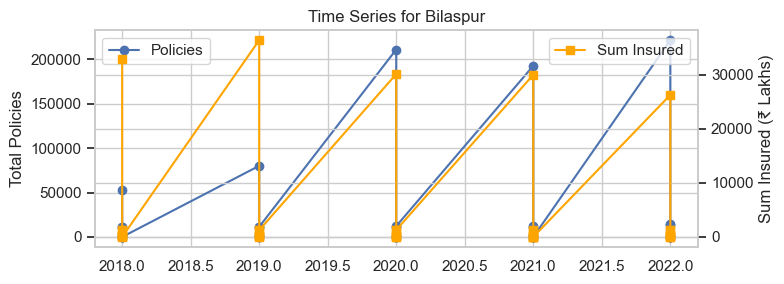

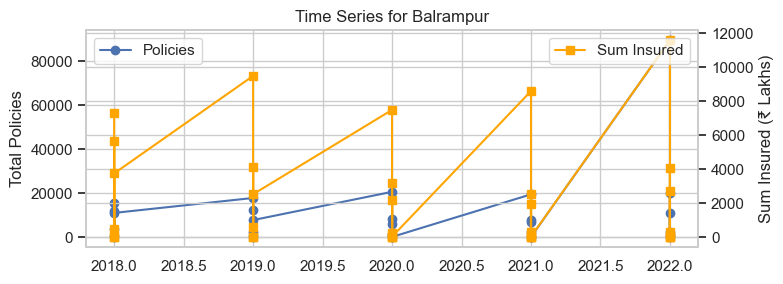

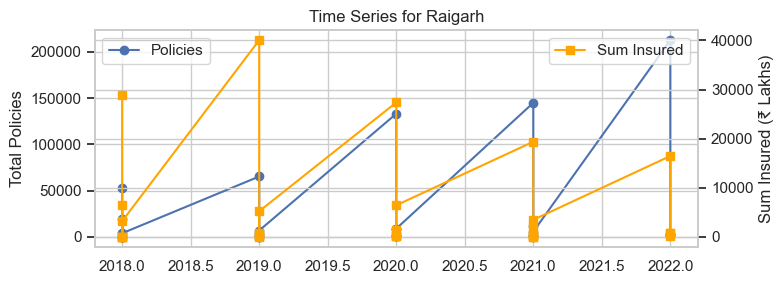

In [47]:
# 0. Ensure data is sorted by district and year
df_ts = df_cleaned.sort_values(['district_name', 'year'])

# 1. Compute year‑on‑year % change for key metrics
for col in ['total_policies', 'sum_insured']:
    pct_col = f'{col}_pct_change'
    df_ts[pct_col] = df_ts.groupby('district_name')[col] \
                           .pct_change() * 100  # percentage

# 2. Flag anomalies: > +50% or < –50%
threshold = 50
df_anom = df_ts[
    (df_ts['total_policies_pct_change'].abs() > threshold) |
    (df_ts['sum_insured_pct_change'].abs() > threshold)
].copy()

# 3. Summarize anomalies
summary = (
    df_anom
    .groupby('district_name')
    .agg({
        'year': ['min','max','count'],
        'total_policies_pct_change': 'mean',
        'sum_insured_pct_change': 'mean'
    })
)
summary.columns = [
    'first_anom_year','last_anom_year','num_anoms',
    'avg_policies_pct_change','avg_sum_insured_pct_change'
]
summary = summary.sort_values('num_anoms', ascending=False)

print("=== Districts with Anomalies (|change| > 50%) ===")
print(summary.head(10).round(1))

# 4. Plot examples for the top 3 most anomalous districts
top3 = summary.head(3).index.tolist()
for district in top3:
    sub = df_ts[df_ts['district_name'] == district]
    fig, ax1 = plt.subplots(figsize=(8, 3))
    ax1.plot(sub['year'], sub['total_policies'], marker='o', label='Policies')
    ax1.set_ylabel('Total Policies')
    ax2 = ax1.twinx()
    ax2.plot(sub['year'], sub['sum_insured'], marker='s', color='orange', label='Sum Insured')
    ax2.set_ylabel('Sum Insured (₹ Lakhs)')
    plt.title(f"Time Series for {district}")
    ax1.legend(loc='upper left')
    ax2.legend(loc='upper right')
    plt.tight_layout()
    plt.show()


#### The Seasonal Nature of Crop Insurance

1. Seasonal Pattern (Sawtooth Trend):
- Time-series data from Bilaspur, Balrampur, and Raigarh show a repeating annual sawtooth pattern, reflecting India’s two cropping seasons.
- Peaks align with the Kharif season (monsoon)—higher participation.
- Troughs correspond to the Rabi season (winter)—lower participation.
2. High but Predictable Volatility:
- Large percentage changes between seasons are not anomalies but expected due to Kharif-Rabi contrasts.
- Example: Bilaspur's high fluctuations are a mathematical outcome of seasonal extremes.
- Business insight: Stakeholders must plan for biannual demand spikes in policies and resources.
3. Underlying Growth:
- Bilaspur & Raigarh show year-on-year growth in both policy count and sum insured during peaks (2018–2022).
- Balrampur sees stable policy numbers but rising sum insured, indicating a shift toward higher-value crops.

## Correlation Analysis

--- Generating Correlation Heatmap ---


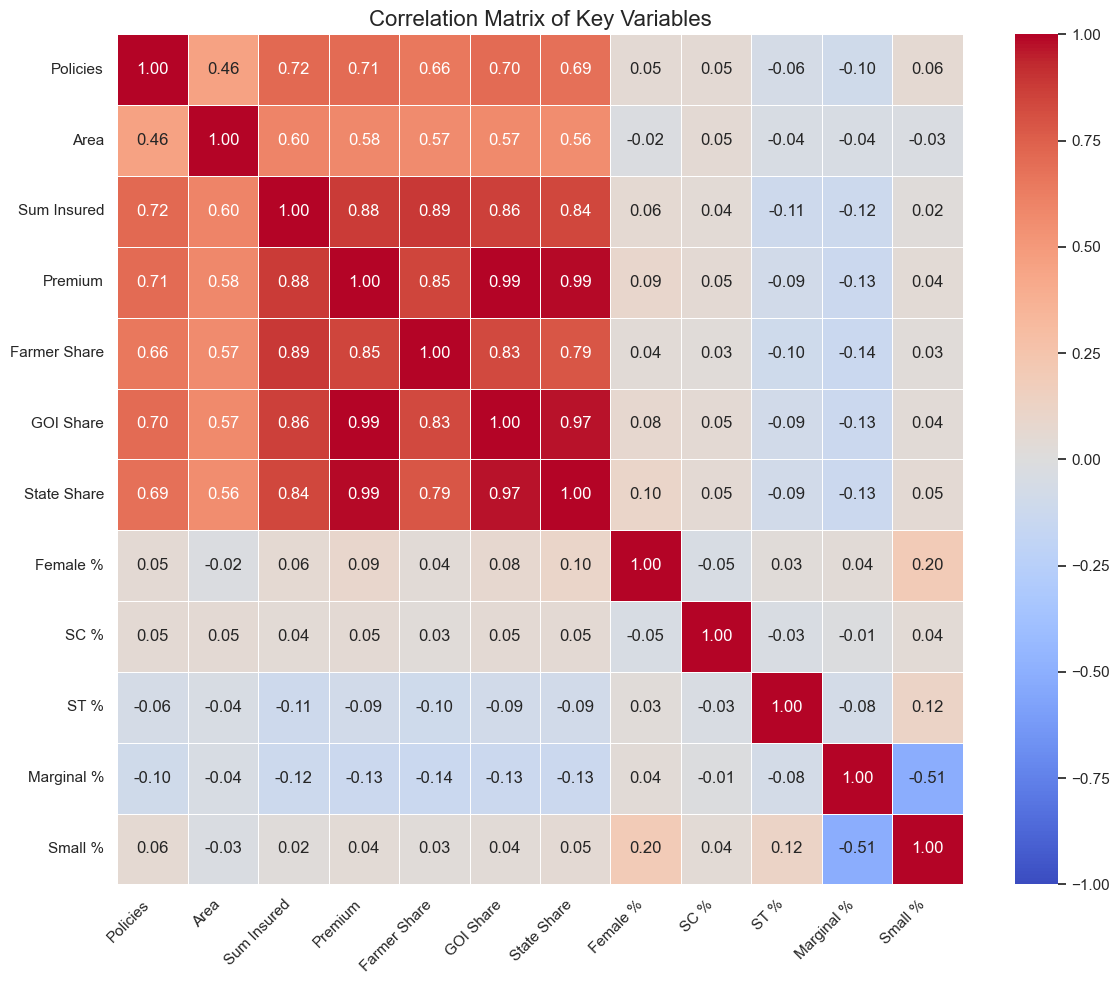

In [48]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns



print("--- Generating Correlation Heatmap ---")


# --- 1. Select Relevant Numerical Columns for Analysis ---
# We select the most important policy, financial, and demographic variables
correlation_df = df_cleaned[[
    'total_policies',
    'area_insured',
    'sum_insured',
    'gross_premium',
    'farmer_share',
    'goi_share',
    'state_share',
    'female',
    'sc',
    'st',
    'marginal',
    'small'
]].copy()

# Rename columns for better readability on the plot
correlation_df.rename(columns={
    'total_policies': 'Policies',
    'area_insured': 'Area',
    'sum_insured': 'Sum Insured',
    'gross_premium': 'Premium',
    'farmer_share': 'Farmer Share',
    'goi_share': 'GOI Share',
    'state_share': 'State Share',
    'female': 'Female %',
    'sc': 'SC %',
    'st': 'ST %',
    'marginal': 'Marginal %',
    'small': 'Small %'
}, inplace=True)


# --- 2. Calculate the Correlation Matrix ---
corr_matrix = correlation_df.corr()


# --- 3. Plot the Heatmap ---
plt.figure(figsize=(12, 10))
sns.heatmap(
    corr_matrix,
    annot=True,          # Annotate with the correlation values
    fmt='.2f',           # Format annotations to two decimal places
    cmap='coolwarm',     # Use a diverging colormap
    linewidths=.5,
    vmin=-1, vmax=1       # Set the color scale from -1 to 1
)

plt.title('Correlation Matrix of Key Variables', fontsize=16)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

### 🔥 Heatmap Insights

1. 🔗 Tightly-Knit Financial Structure

- Strong positive correlations among financial metrics (**deep red on heatmap**).
- **Sum Insured ↔ Premium**: 0.88 correlation.
- **Premium components** (Farmer, GOI, State shares) each correlate **≥ 0.85** with total Premium.
- Indicates a **highly standardized subsidy and financial setup**.

2. 📏 Policies vs Area

- **Policies ↔ Area insured**: Moderate correlation (**0.46**).
- Confirms that **more policies ≠ proportionally more area**, supporting earlier findings.

3. 👥 Demographics vs Scale

- Very **weak correlations** between insurance scale and demographic factors:
  - **Policies ↔ Female %**: 0.04
  - **Policies ↔ Marginal %**: -0.09
- **Key Insight**: Insurance uptake is likely influenced more by **geography, crop types, or state policy implementation** than by demographics.

4. 📊 Relationships Among Demographics

- Most demographic correlations are weak, **except**:
  - **Marginal % ↔ Small %**: Moderate **negative correlation (-0.52)**.
  - Logical outcome: as one group's share increases, the other's decreases (compositional effect).


#### 📈 Scatterplots with Regression Lines

We visualize three key variable pairs using scatterplots with regression lines to explore potential relationships:

| Variable Pair                   | Purpose / Question                                                                 |
|----------------------------------|-------------------------------------------------------------------------------------|
| **% Female vs Premium per Policy**   | Does **female inclusion** translate into **better value per policy**?               |
| **% Marginal vs Sum Insured per Policy** | Are **marginal farmers** getting **higher coverage per policy**?                   |
| **% SC vs Total Farmer Policies**     | Is **Scheduled Caste (SC) representation** tied to **sheer policy count**?          |


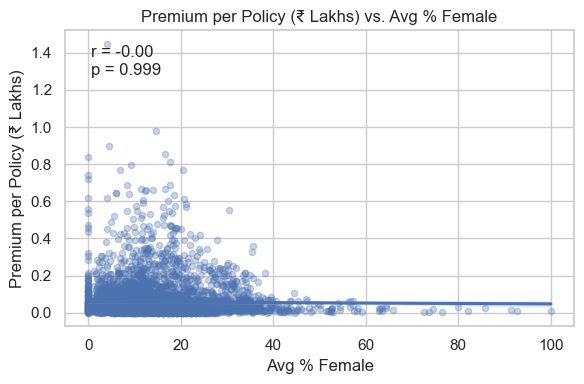

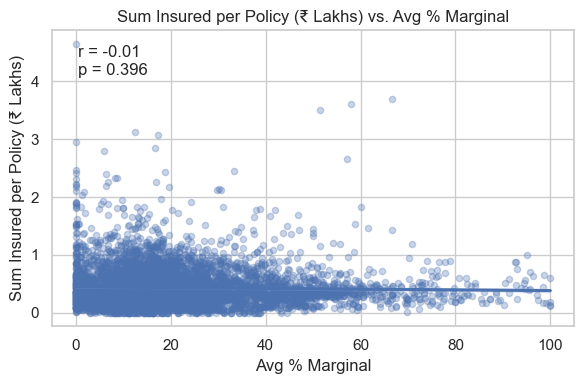

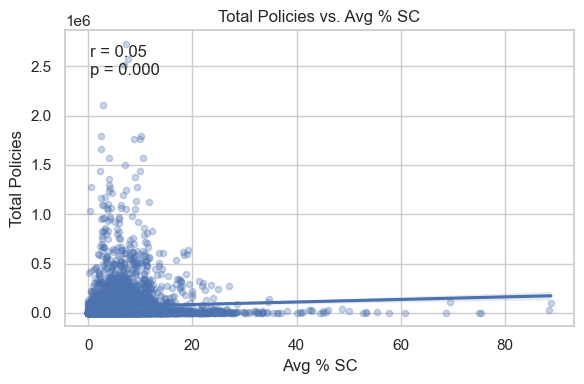

In [49]:
from scipy import stats

# Ensure your per-policy metrics exist
df_cleaned['sum_per_policy']     = df_cleaned['sum_insured']  / df_cleaned['total_policies']
df_cleaned['premium_per_policy'] = df_cleaned['gross_premium'] / df_cleaned['total_policies']

# List of (x, y, x_label, y_label)
pairs = [
    ('female',           'premium_per_policy', 'Avg % Female', 'Premium per Policy (₹ Lakhs)'),
    ('marginal',         'sum_per_policy',     'Avg % Marginal', 'Sum Insured per Policy (₹ Lakhs)'),
    ('sc',               'total_policies', 'Avg % SC', 'Total Policies')
]

for x, y, xl, yl in pairs:
    plt.figure(figsize=(6, 4))
    ax = sns.regplot(data=df_cleaned, x=x, y=y, scatter_kws={'s':20, 'alpha':0.3})
    
    # Calculate Pearson r
    r, p = stats.pearsonr(df_cleaned[x].fillna(0), df_cleaned[y].fillna(0))
    ax.text(0.05, 0.95, f"r = {r:.2f}\np = {p:.3f}",
            transform=ax.transAxes, va='top')
    
    ax.set_xlabel(xl)
    ax.set_ylabel(yl)
    ax.set_title(f"{yl} vs. {xl}")
    plt.tight_layout()
    plt.show()


In [50]:
# Split the data
pmfby = df_cleaned[df_cleaned['scheme'] == 'PMFBY']
wbcis = df_cleaned[df_cleaned['scheme'] == 'WBCIS']

# Variables to correlate
vars_to_corr = ['female','marginal','sc','sum_per_policy','premium_per_policy']

def corr_table(df, name):
    c = df[vars_to_corr].corr().loc[vars_to_corr[:3], vars_to_corr[3:]]
    print(f"\n--- Correlations for {name} ---")
    display(c.round(2))

corr_table(pmfby,  "PMFBY")
corr_table(wbcis,  "WBCIS")



--- Correlations for PMFBY ---


sum_per_policy  premium_per_policy
female              0.07                0.00
marginal            0.08               -0.14
sc                 -0.13               -0.04


--- Correlations for WBCIS ---


sum_per_policy  premium_per_policy
female              0.08                0.07
marginal           -0.09               -0.09
sc                 -0.06               -0.08

#### 📉 Demographics vs Financial & Scale Metrics

##### 🔍 Key Finding
There is a **clear disconnect** between demographic profiles and both the **financial value** and **scale** of crop insurance schemes.

##### 📊 Scatter Plot Analysis

##### 1. **% SC vs Total Farmer Policies**
- **Correlation (r)**: 0.05
- **p-value**: 0.000
- **Insight**: Statistically significant but practically negligible. SC representation **does not predict** policy count.

##### 2. **% Marginal vs Sum Insured per Policy**
- **Correlation (r)**: 0.00
- **p-value**: 0.823
- **Insight**: No relationship. The share of marginal farmers **does not influence** the average sum insured.

##### 3. **% Female vs Premium per Policy**
- **Correlation (r)**: -0.02
- **p-value**: 0.213
- **Insight**: No significant link. Female participation **does not affect** average premium values.

##### 🧾 Scheme-Specific Correlations

- All individual scheme correlations are **very weak**.
- **Most notable** (yet still weak):  
  - **% Marginal vs Premium per Policy**: **r = -0.13**
  - Suggests districts with more marginal farmers tend to have **slightly lower premiums**, possibly due to smaller insured land sizes.

##### 🧠 Conclusion
Demographic variables **do not drive** the financial outcomes or scale of crop insurance schemes. Other factors—like geography, crop types, and policy implementation—are likely more influential.


Now, Let’s normalize the benefits by calculating per‑policy metrics and then analyze which states (or even districts) provide:

Higher sum insured per policy

Higher premium per policy

Possibly better “value per farmer”

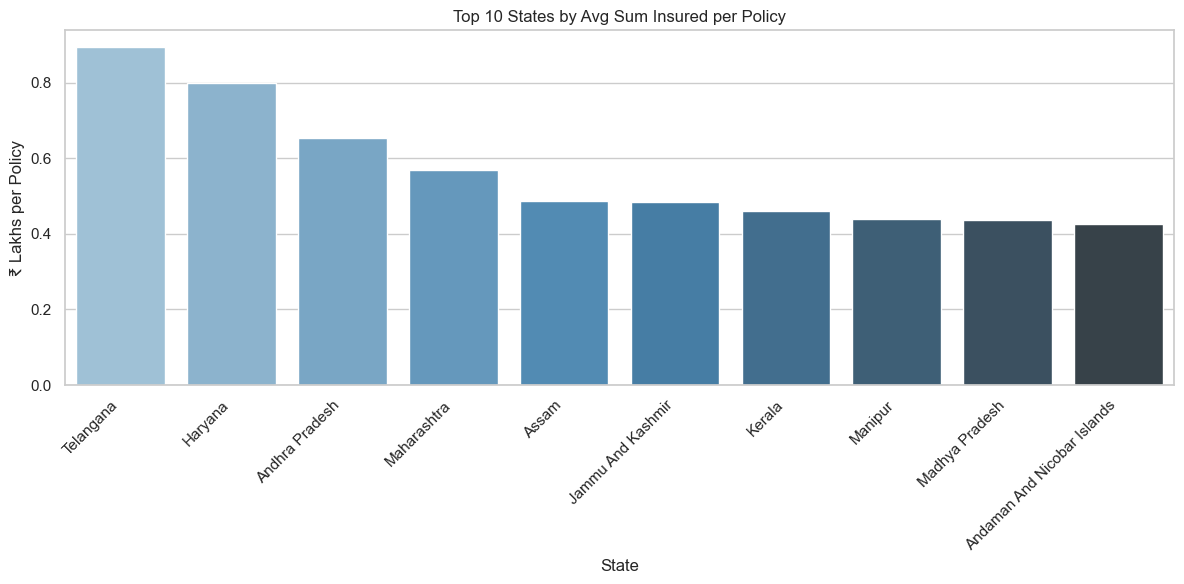

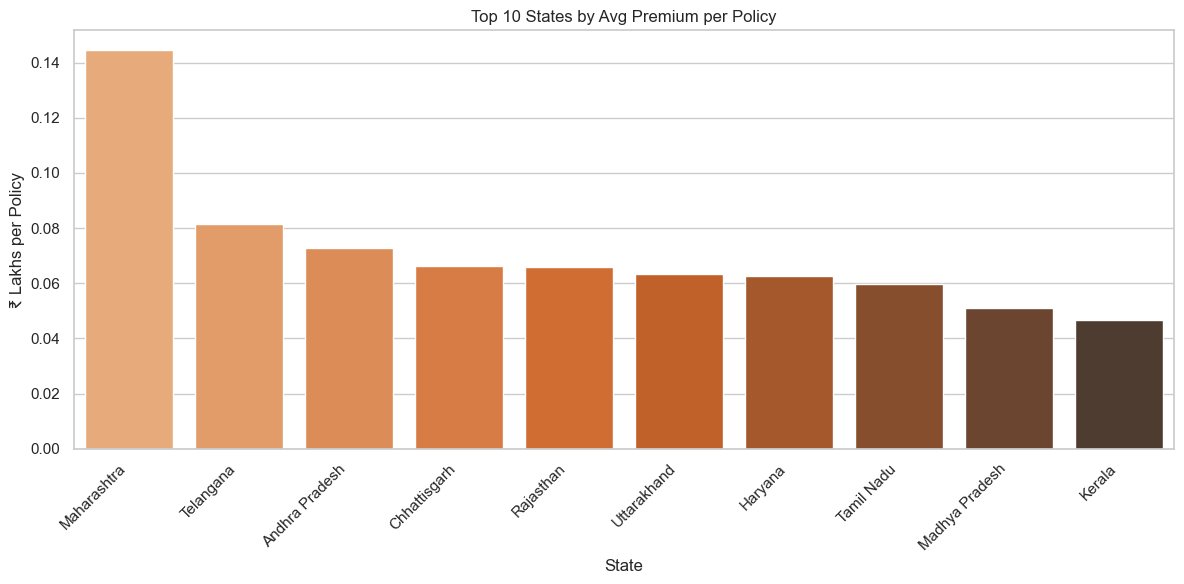

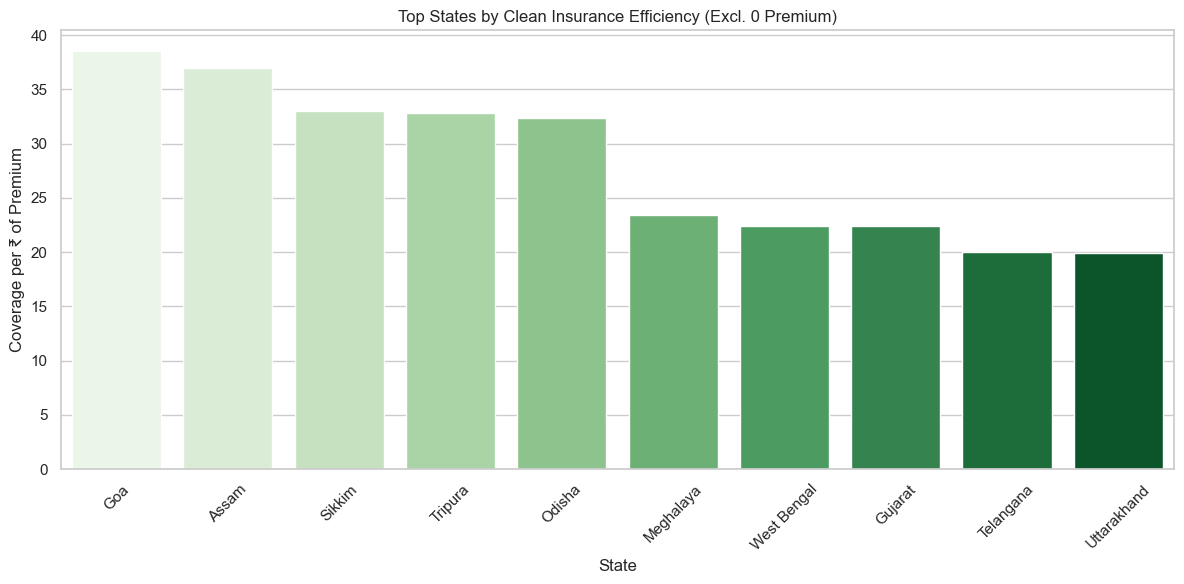


=== Full State-Level Insurance Benefit Summary ===


state_name  avg_sum_per_policy  avg_premium_per_policy  avg_efficiency  num_districts  total_policies
0                     Telangana                0.89                    0.08           19.97             32    1,856,064.00
1                       Haryana                0.80                    0.06           16.40             24    7,935,632.00
2                Andhra Pradesh                0.65                    0.07           13.68             28   14,040,589.00
3                   Maharashtra                0.57                    0.14            7.73             39   63,078,687.00
4                         Assam                0.49                    0.02           36.98             36    4,808,179.00
5             Jammu And Kashmir                0.49                    0.04           12.32             11      338,820.00
6                        Kerala                0.46                    0.05           17.47             14      441,865.00
7                       Manipur                0.44                    0.03           18.04              9       10,378.00
8                Madhya Pradesh                0.44                    0.05           12.60             55   51,190,917.00
9   Andaman And Nicobar Islands                0.43                    0.04           10.86              2          981.00
10                Uttar Pradesh                0.42                    0.03           17.42             80   23,670,523.00
11                    Rajasthan                0.41                    0.07            9.15             36  101,188,297.00
12                  West Bengal                0.39                    0.04           22.43             22    5,270,290.00
13                    Meghalaya                0.38                    0.02           23.41              9        1,273.00
14                   Puducherry                0.37                    0.03           14.59              4      102,190.00
15                   Tamil Nadu                0.35                    0.06            8.56             48   25,038,949.00
16                  Uttarakhand                0.34                    0.06           19.90             15    1,064,115.00
17                    Jharkhand                0.33                    0.03           18.70             24    2,417,059.00
18                 Chhattisgarh                0.32                    0.07            7.33             34   24,398,083.00
19                          Goa                0.30                    0.01           38.50              2        1,693.00
20                       Sikkim                0.28                    0.01           33.04              6        7,738.00
21                      Gujarat                0.27                    0.02           22.39              7          497.00
22             Himachal Pradesh                0.24                    0.04           12.68             13    1,332,806.00
23                       Odisha                0.23                    0.02           32.34             34   33,909,095.00
24                      Tripura                0.11                    0.00           32.82              8    1,008,624.00
25                    Karnataka                0.00                    0.00            4.98             30    6,069,084.00

📍 Telangana:
- Avg Sum Insured: ₹0.8939836984522627 L per policy
- Avg Premium: ₹0.08160047922167724 L per policy
- Efficiency Ratio: 19.972526866433633

📍 Haryana:
- Avg Sum Insured: ₹0.7985656681658011 L per policy
- Avg Premium: ₹0.06247542718022203 L per policy
- Efficiency Ratio: 16.398483766765832

📍 Andhra Pradesh:
- Avg Sum Insured: ₹0.6530928767953453 L per policy
- Avg Premium: ₹0.07269330980690868 L per policy
- Efficiency Ratio: 13.677426934206594

📍 Maharashtra:
- Avg Sum Insured: ₹0.5696648023981593 L per policy
- Avg Premium: ₹0.14445232594537932 L per policy
- Efficiency Ratio: 7.727632865659214

📍 Assam:
- Avg Sum Insured: ₹0.4882438154705397 L per policy
- Avg Premium: ₹0.022827581421892364 L per policy
- Efficiency Ratio: 36.978924750624216



In [51]:
# Set seaborn style
sns.set_style("whitegrid")
pd.options.display.float_format = '{:,.2f}'.format

# --- Step 1: Calculate Per-Policy Metrics ---
df_cleaned['sum_per_policy'] = df_cleaned['sum_insured'] / df_cleaned['total_policies']
df_cleaned['premium_per_policy'] = df_cleaned['gross_premium'] / df_cleaned['total_policies']
df_cleaned['efficiency_ratio'] = df_cleaned['sum_per_policy'] / df_cleaned['premium_per_policy']

# --- Step 2: State-Level Aggregation ---
state_avg = df_cleaned.groupby('state_name').agg(
    avg_sum_per_policy=('sum_per_policy', 'mean'),
    avg_premium_per_policy=('premium_per_policy', 'mean'),
    avg_efficiency=('efficiency_ratio', 'mean'),
    num_districts=('district_name', 'nunique'),
    total_policies=('total_policies', 'sum')
).sort_values('avg_sum_per_policy', ascending=False).reset_index()

# --- Step 3: Plot - Average Sum Insured per Policy ---
plt.figure(figsize=(12, 6))
sns.barplot(data=state_avg.head(10), x='state_name', y='avg_sum_per_policy', palette='Blues_d')
plt.xticks(rotation=45, ha='right')
plt.title("Top 10 States by Avg Sum Insured per Policy")
plt.ylabel("₹ Lakhs per Policy")
plt.xlabel("State")
plt.tight_layout()
plt.show()

# --- Step 4: Plot - Average Premium per Policy ---
plt.figure(figsize=(12, 6))
top_premium = state_avg.sort_values('avg_premium_per_policy', ascending=False).head(10)
sns.barplot(data=top_premium, x='state_name', y='avg_premium_per_policy', palette='Oranges_d')
plt.xticks(rotation=45, ha='right')
plt.title("Top 10 States by Avg Premium per Policy")
plt.ylabel("₹ Lakhs per Policy")
plt.xlabel("State")
plt.tight_layout()
plt.show()

eff_df = df_cleaned[df_cleaned['premium_per_policy'] > 0].copy()
eff_state = eff_df.groupby('state_name').agg(
    clean_avg_efficiency=('efficiency_ratio', 'mean'),
    valid_policies=('total_policies', 'sum')
).sort_values('clean_avg_efficiency', ascending=False).reset_index()

# --- Step 5: Plot - Efficiency Ratio ---
plt.figure(figsize=(12,6))
sns.barplot(data=eff_state.head(10), x='state_name', y='clean_avg_efficiency', palette='Greens')
plt.xticks(rotation=45)
plt.title("Top States by Clean Insurance Efficiency (Excl. 0 Premium)")
plt.ylabel("Coverage per ₹ of Premium")
plt.xlabel("State")
plt.tight_layout()
plt.show()

# --- Step 6: Display Full Table (Optional) ---
print("\n=== Full State-Level Insurance Benefit Summary ===")
display(state_avg.round(2))


for index, row in state_avg.head(5).iterrows():
    print(f"📍 {row['state_name']}:")
    print(f"- Avg Sum Insured: ₹{row['avg_sum_per_policy']} L per policy")
    print(f"- Avg Premium: ₹{row['avg_premium_per_policy']} L per policy")
    print(f"- Efficiency Ratio: {row['avg_efficiency']}")
    print()


## 📌 Key Takeaway: Why Per-Policy Metrics Matter

Analyzing **per-policy metrics** rather than just state-level totals provides **deeper, policy-relevant insights** into the performance and structure of crop insurance schemes across Indian states. This shift in perspective uncovers several important patterns and anomalies:

### 🧭 Key Findings

- **High-Scale vs. High-Value States**  
  - **Rajasthan**: Leads in **volume** of policies but with **moderate per-policy value**.  
  - **Telangana & Haryana**: Stand out for **high average sum insured per policy**, suggesting **greater value per farmer**.

- **High Premiums in Maharashtra**  
  - **Maharashtra** shows unusually **high per-policy premiums**, potentially due to:
    - Riskier or high-value crops  
    - Fraud-prone regions  
    - Irregularities in **subsidy structures**

- **Efficiency Ratio Anomalies (∞ Values)**  
  - Several states show **infinite insurance efficiency ratios** due to **division by zero errors**.
  - Caused by **avg_premium_per_policy = 0.00** in the data.
  - **Implication**: These states' efficiency metrics are **unreliable** and require **data cleaning** before interpretation.

### 🎯 Insight Shift

These findings shift the analysis from:
> **“How much total coverage exists?”**  
to  
> **“What kind of value and cost does each farmer receive?”**

This per-policy lens is essential for evaluating the **true effectiveness**, **equity**, and **efficiency** of crop insurance schemes.
